# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# ! pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
%matplotlib inline
# import required modules
import requests, json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Impor the GeoCoding API key
from api_keys import geoapify_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#output_data_file='output_data/cities.csv'


In [4]:
print(weather_api_key)

bd533b68e7ad2780347a649a2881e59b


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations  -- generate list of 1500 pairs
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


In [6]:
cities

['illoqqortoormiut',
 'bredasdorp',
 'hermanus',
 'mataura',
 'atuona',
 'linfen',
 'kapaa',
 'vaini',
 'bluff',
 'alofi',
 'albany',
 'busselton',
 'dikson',
 'fortuna',
 'mahebourg',
 'pevek',
 'adrar',
 'nauta',
 'qaanaaq',
 'cherskiy',
 'arraial do cabo',
 'barrow',
 'formoso do araguaia',
 'jamestown',
 'provideniya',
 'saint-philippe',
 'cidreira',
 'zhigansk',
 'laguna',
 'basco',
 'punta arenas',
 'georgetown',
 'ushuaia',
 'ngunguru',
 'ormara',
 'cape town',
 'pangody',
 'east london',
 'hamilton',
 'butaritari',
 'aksarka',
 'ancud',
 'bethel',
 'lang son',
 'puerto ayora',
 'tasiilaq',
 'narsaq',
 'meadow lake',
 'norman wells',
 'severo-kurilsk',
 'phrai bung',
 'varadero',
 'pangnirtung',
 'gwadar',
 'hithadhoo',
 'maniitsoq',
 'avarua',
 'castro',
 'vardo',
 'evansville',
 'srednekolymsk',
 'waterford',
 'poum',
 'inderborskiy',
 'acapulco',
 'port elizabeth',
 'thompson',
 'taolanaro',
 'dzhubga',
 'macrohon',
 'phan thiet',
 'karamea',
 'zirandaro',
 'yulara',
 'hobart

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
# url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"
 
url = "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"
url = url.replace("{API key}",weather_api_key)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.replace("{city name}", city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # convert json to python data format
        city_weather = requests.get(city_url).json()  

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        coord = city_weather["coord"]
        city_lat = coord["lat"]
        city_lng = coord["lon"]
        
        main = city_weather["main"]
        city_max_temp = main["temp_max"]
        city_humidity = main["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
            
     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | linfen
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | adrar
Processing Record 18 of Set 1 | nauta
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 | fo

City not found. Skipping...
Processing Record 37 of Set 4 | kaeo
Processing Record 38 of Set 4 | obala
Processing Record 39 of Set 4 | balkanabat
Processing Record 40 of Set 4 | emerald
Processing Record 41 of Set 4 | college
Processing Record 42 of Set 4 | lavrentiya
Processing Record 43 of Set 4 | plettenberg bay
Processing Record 44 of Set 4 | rawson
Processing Record 45 of Set 4 | churapcha
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | yellowknife
Processing Record 48 of Set 4 | saint-augustin
Processing Record 49 of Set 4 | vanavara
Processing Record 0 of Set 5 | bac lieu
Processing Record 1 of Set 5 | santa maria
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | gold coast
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | maghama
City not found. Skipping...
Processing Record 7 of Set 5 | hailar
Processing Record 8 of Set 5 | lensk
Processing Record 9 of Set 5 | lalomanu

Processing Record 24 of Set 8 | halalo
City not found. Skipping...
Processing Record 25 of Set 8 | aasiaat
Processing Record 26 of Set 8 | deming
Processing Record 27 of Set 8 | talara
Processing Record 28 of Set 8 | hualmay
Processing Record 29 of Set 8 | sao joao da barra
Processing Record 30 of Set 8 | le port
Processing Record 31 of Set 8 | los llanos de aridane
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | ballina
Processing Record 34 of Set 8 | ahipara
Processing Record 35 of Set 8 | guerrero negro
Processing Record 36 of Set 8 | yumen
Processing Record 37 of Set 8 | mount isa
Processing Record 38 of Set 8 | karaul
City not found. Skipping...
Processing Record 39 of Set 8 | ewa beach
Processing Record 40 of Set 8 | panama city
Processing Record 41 of Set 8 | gat
Processing Record 42 of Set 8 | mangai
Processing Record 43 of Set 8 | czarnkow
Processing Record 44 of Set 8 | panjab
Processing Record 45 of Set 8 | brae
Processing Record 46 of Set 8 | port li

Processing Record 10 of Set 12 | armidale
Processing Record 11 of Set 12 | faridan
City not found. Skipping...
Processing Record 12 of Set 12 | yenagoa
Processing Record 13 of Set 12 | faya
Processing Record 14 of Set 12 | naustdal
Processing Record 15 of Set 12 | dogbo
Processing Record 16 of Set 12 | haines junction
Processing Record 17 of Set 12 | ye
City not found. Skipping...
Processing Record 18 of Set 12 | wau
Processing Record 19 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 12 | rapid valley
Processing Record 21 of Set 12 | gladstone
Processing Record 22 of Set 12 | praia
Processing Record 23 of Set 12 | astoria
Processing Record 24 of Set 12 | flin flon
Processing Record 25 of Set 12 | dubbo
Processing Record 26 of Set 12 | ardabil
Processing Record 27 of Set 12 | viedma
Processing Record 28 of Set 12 | whitecourt
Processing Record 29 of Set 12 | tanabe
Processing Record 30 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 31 o

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

# Display sample data
city_data_df.head()

In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,292.67,87,0,4.29,ZA,1676075530
1,hermanus,-34.4187,19.2345,293.60,79,0,4.28,ZA,1676075530
2,mataura,-46.1927,168.8643,292.86,39,24,1.49,NZ,1676075531
3,atuona,-9.8000,-139.0333,299.17,77,11,6.50,PF,1676075532
4,linfen,36.0889,111.5189,276.54,75,100,1.13,CN,1676075424


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

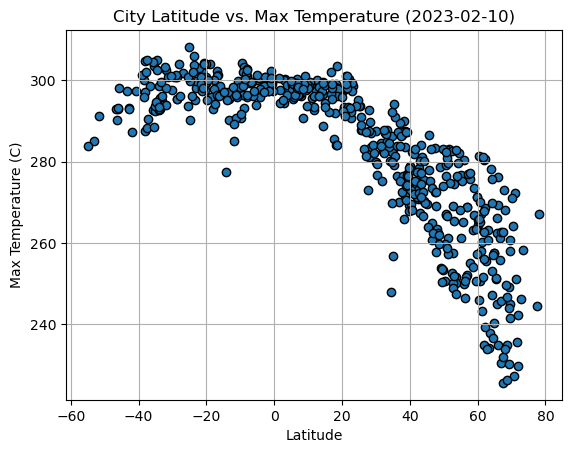

In [11]:
from datetime import datetime

# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")
# need to set parameters to show line around data points

# Incorporate the other graph properties
# YOUR CODE HERE
now = datetime.now()


plt.title("City Latitude vs. Max Temperature (" + now.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

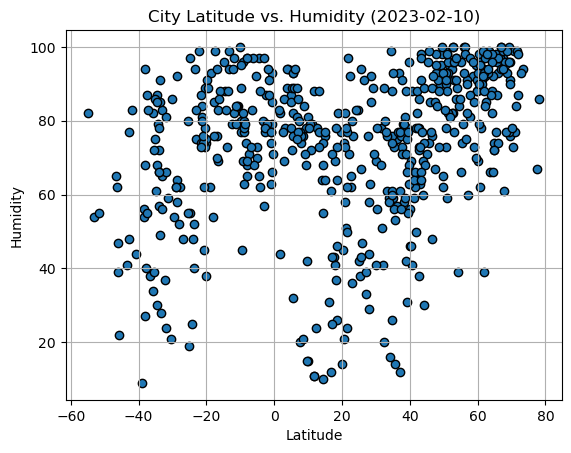

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
now = datetime.now()


plt.title("City Latitude vs. Humidity (" + now.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plotdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAjsAAAHFCAYAAAAUpjivAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOydd3gU1drAf7M9m+ymV0JCKKE3aXJROogN8erVK9eCIiiI1y5iRa+ioqJepYhwxYb1U7AgUgICgpRQQmghBAhppGeTbLbOfH/EXbKpm5BAiPN7Hh7N7Mw573nPmdmz8zZBkiQJGRkZGRkZGZk2iuJiCyAjIyMjIyMj05LImx0ZGRkZGRmZNo282ZGRkZGRkZFp08ibHRkZGRkZGZk2jbzZkZGRkZGRkWnTyJsdGRkZGRkZmTaNvNmRkZGRkZGRadPImx0ZGRkZGRmZNo282ZGRkZGRkZFp08ibHZkWIykpibvvvpu4uDh0Oh1+fn5cdtllzJ8/n8LCQvd5I0eOZOTIke6/zWYzc+fOZfPmzc0qz+bNmxEEgW+//bZZ2lu0aBErVqyocfzUqVMIguDx2fbt25k7dy7FxcXN0ndVVqxYgSAInDp1qtnbvlC4dPbmm2/W+vmbb755UcfYoUMHpkyZ0uB5rjVWde1OmTKFDh06eJw3b948Vq1a1awyuti6dStarZbTp08D4HQ6WbBgARMmTCA6Ohq9Xk/37t156qmn6lyP7733Ht26dUOr1RIXF8eLL76I3W73OOe7777jtttuo3Pnzvj4+NChQwf+9a9/cfz4cY/zTCYTr7zyCiNHjiQiIgI/Pz969+7N66+/jsVi8Xpc77zzDn//+9+Ji4tDEASPZ0Z1cnNzmTJlCiEhIej1eoYOHcrGjRu97mvbtm3ce++9DBgwAK1WW+/ay8nJYdasWXTs2BEfHx9iY2OZOnUq6enpHuc999xzXHbZZYii6LUcMs2IJCPTAixdulRSqVRSz549pYULF0qbNm2S1q1bJ82bN0+Ki4uTJk2a5D730KFD0qFDh9x/5+XlSYD0wgsvNKtMmzZtkgDpm2++aZb2evbsKY0YMaLGcYvFIu3YsUPKzc11H3vjjTckQDp58mSz9F2Vjz76qMXavlCcPHlSAqQ33nij1s9bUn/esHfvXik1NbXB81xrbNOmTe5jqamp0t69ez3O8/X1le66665mllKSRFGULrvsMumBBx5wHystLZUMBoM0ffp06ZtvvpE2bdokvfXWW1JgYKDUo0cPyWw2e7Tx8ssvS4IgSHPmzJE2bdokzZ8/X9JoNNK0adM8zhs8eLA0ceJE6X//+5+0efNm6dNPP5W6d+8u+fn5ScnJye7zDh48KIWEhEiPPPKItHr1amnjxo3S3LlzJZ1OJ40ZM0YSRdGrsXXt2lW67LLLpHvuuUcKDQ2t9d6TpMr7r1evXlJ0dLT02WefSevWrZNuuOEGSaVSSZs3b/aqr7lz50qxsbHSpEmTpJEjR9a59iwWi9SlSxcpJCTE/ZxbsmSJFB4eLrVr104ymUzuc4uLi6WAgADpf//7n1cyyDQv8mZHptnZvn27pFQqpQkTJkgWi6XG51arVVq9enWd11/qm53akDc79dPaNzveUttmpzZaarOzZs0aCZCOHj3qPuZwOKT8/Pwa537zzTcSIH366afuY/n5+ZJOp5OmT5/uce4rr7wiCYLg8aPk7NmzNdrMzMyU1Gq1NHXqVPexsrIyqaysrMa5rjndunWrV2NzOp3u/6/v3lu4cKEESNu3b3cfs9vtUo8ePaTBgwc3uq/61t769eslQFq2bJnH8ZUrV0qA9N1333kcnzVrlhQfH+/1Bk+m+ZDNWDLNzrx58xAEgaVLl6LVamt8rtFomDhxovvvqmasU6dOERoaCsCLL76IIAgIgsCUKVPYunUrgiDwxRdf1Gjzk08+QRAEdu/efd7yv/jiiwwZMoSgoCCMRiOXXXYZy5cvR6pSM7dDhw4cOnSI3377zS2jy1RR3Yw1d+5cnnjiCQD3K/iqpg5BEJg7d24NOWoznfzxxx8MGzYMnU5HVFQUc+bMqWFecPHVV18xdOhQfH198fPz46qrrmLfvn31jv3AgQMIgsDy5ctrfPbLL78gCAI//PADAHl5eUyfPp327duj1WoJDQ1l2LBhbNiwod4+mou6TEvVzaIu09LKlSuZPXs2kZGR+Pn5cf3113P27FlKS0uZPn06ISEhhISEcPfdd1NWVtZgX0ePHmXChAno9XpCQkK4//77KS0trSFPdTOWIAiUl5fz8ccfu9fCyJEjOXXqFCqVildffbVGG1u2bEEQBL755pt6dbJ48WIGDRpE165d3ceUSiXBwcE1zh08eDAAZ86ccR9bu3YtFouFu+++2+Pcu+++G0mSPExvYWFhNdqMiooiOjrao01fX198fX296r8+FArvvq6+//57unbtytChQ93HVCoVt99+O7t27SIzM7PZ+lKr1QD4+/t7HA8ICABAp9N5HL/jjjtISUlh06ZNXrUv03yoLrYAMm0Lp9NJQkICAwYMoH379o2+PjIykrVr1zJhwgSmTp3KvffeC0BoaCidOnWif//+LFy4kNtuu83juvfff59BgwYxaNCg8x7DqVOnuO+++4iJiQEqNxgPPvggmZmZPP/880DlA/Xmm2/G39+fRYsWAdS6sQO49957KSws5L333uO7774jMjISgB49ejRKrsOHDzNmzBg6dOjAihUr0Ov1LFq0iJUrV9Y4d968eTz77LPcfffdPPvss9hsNt544w2uvPJKdu3aVWffffv2pX///nz00UdMnTrV47MVK1YQFhbGNddcA1Q+uPfu3csrr7xCfHw8xcXF7N27l4KCgkaNqyqiKOJwOGo9fr48/fTTjBo1ihUrVnDq1Ckef/xxbrvtNlQqFX379uWLL75g3759PP300xgMBv773//W2dbZs2cZMWIEarWaRYsWER4ezueff86sWbMalGPHjh2MHj2aUaNG8dxzzwFgNBrp0KEDEydOZMmSJTz55JMolUr3Ne+//z5RUVHceOONdbZrs9nYsGEDDz74oFf6SEhIAKBnz57uY8nJyQD07t3b49zIyEhCQkLcn9dFWloap0+fZtKkSU3qvzlITk7myiuvrHG8T58+ABw6dIh27do1S1/Dhg1jwIABzJ07l9jYWLp3705KSgpPP/00l112GWPHjvU4f8CAAfj5+fHzzz8zevToZpFBxksu9qslmbZFTk6OBEj//Oc/vb5mxIgRHq+k6zNjuUw2+/btcx/btWuXBEgff/xxvf00xYzldDolu90uvfTSS1JwcLDH6+e6XqW7TDIfffSR+1h9r8LrGmtsbKyHqePWW2+VfHx8pJycHPcxh8MhdevWzaPt9PR0SaVSSQ8++KBHe6WlpVJERIR0yy231Dvm//73vxIgHTt2zH2ssLBQ0mq10mOPPeY+5ufnJz388MP1tuUtLp019K+q/qrrx0X19eSa9+uvv97jvIcfflgCpH//+98exydNmiQFBQV5HKve1+zZsyVBEKT9+/d7nDdu3LgaZqy77rpLio2N9TivLjOWS9bvv//efSwzM1NSqVTSiy++WOP8quzcuVMCpC+//LLe8yRJkjIyMqTw8HBp4MCBHiabadOmSVqtttZr4uPjpfHjx9fZpt1ul0aOHCkZjUYpPT293v4PHDgg+fj4SDfeeGODstZGfWYstVot3XfffTWOb9++XQKklStXNqqvhkyoJpNJuv766z3W6ciRI6WCgoJazx82bJg0ZMiQRskgc/7IZiyZS4rbbruNsLAwFi5c6D723nvvERoayq233tosfSQkJDB27Fj8/f1RKpWo1Wqef/55CgoKyM3NbZY+msKmTZsYM2YM4eHh7mNKpbLGuH/99VccDgd33nknDofD/U+n0zFixIgGo9z+9a9/odVqPaLJvvjiC6xWq4d5Y/DgwaxYsYKXX36ZP/74o05zWmN46KGH2L17d41/Dz300Hm3fd1113n83b17dwCuvfbaGscLCwtrmLKqsmnTJnr27Enfvn09jk+ePPm8ZBw5ciR9+/b1WN9LlixBEASmT59e77VZWVlA7ealqhQWFnLNNdcgSRJfffVVDZONIAh1XlvXZ5IkMXXqVLZu3conn3xS71vdU6dOcd1119G+fXuWLVvm8VnV9epwODxMx43BmzG43iK6/jmdzkb3Y7fbufXWW9m/fz8ffvghW7Zs4eOPPyYzM5Nx48ZRUlJS45qwsDCvTGkyzYu82ZFpVlyhnidPnmyR9rVaLffddx8rV66kuLiYvLw8vv76a+699946zUiNYdeuXYwfPx6ADz/8kN9//53du3fzzDPPAFBRUXHefTSVgoICIiIiahyvfuzs2bMADBo0CLVa7fHvq6++Ij8/v95+goKCmDhxIp988on7C2DFihUMHjzYw+Tw1Vdfcdddd7Fs2TKGDh1KUFAQd955Jzk5OU0eY3R0NAMHDqzxLzo6usltVh1XVTQaTb3H6wuL9nYumsK///1vNm7cyLFjx7Db7Xz44YfcfPPNDbbtWpvV/USqUlRUxLhx48jMzGT9+vV07NjR4/Pg4GAsFgtms7nGtYWFhTV0BZUbnXvvvZfPPvuMFStWcMMNN9TZ/+nTpxk1ahQqlYqNGzfWaK/6ev3444/rHXNtBAcH12pKdaW7cPV5zz33ePQ1ZsyYRve1fPlyfvnlF7777jvuvfderrzySu68807Wrl3L3r17eeedd2pco9PpLupz5K+K7LMj06wolUrGjBnDL7/8QkZGRrN8SVVnxowZvPbaa/zvf//DYrHgcDi4//77m6XtL7/8ErVazU8//eTxpdFSOVGgcgNntVprHK/+wA4ODq51I1H9WEhICADffvstsbGxTZLp7rvv5ptvvmH9+vXExMSwe/duFi9eXKOfd955h3feeYf09HR++OEHnnrqKXJzc1m7dm2T+m0MOp2uVr3l5+e7ddBSeDsXTWHy5MnMnj2bhQsXcvnll5OTk8MDDzzQ4HWuMVfNYVWVoqIixo4dy8mTJ9m4caPbh6UqLl+dgwcPMmTIEPfxnJwc8vPz6dWrl8f5ro3ORx99xPLly7n99tvrlO/06dOMHDkSSZLYvHlzrc+G6gEGcXFxdbZXF7179+bgwYM1jruOucYwd+5cDx8rg8HQ6L7279+PUqnksssu8zjesWNHgoODa/VxKiwsbPH1KVMTebMj0+zMmTOHNWvWMG3aNFavXu3+pezCbrezdu1arr/++lqvd72hqevXT2RkJP/4xz9YtGgRNpuN66+/3u1MfL4IgoBKpfJwDq2oqODTTz+tVU5vf6HVN6YOHTqQlJTkcSwhIaGGGWXUqFH88MMPnD171m3KcjqdfPXVVx7nXXXVVahUKk6cOMFNN93klXzVGT9+PO3ateOjjz4iJiYGnU5Xwym8KjExMcyaNYuNGzfy+++/N6nPxlKb3lJSUjh27FiLf5mMGjWK+fPnc+DAAQ9TVm3O4rVR39rR6XRMnz6d999/n+3bt9OvXz+GDRvWYJsus9yJEydqfOba6KSlpbF+/Xr69+9faxsTJkxAp9OxYsUKj82OK3FlVcdjSZKYNm0aH330ER988EGNCK6qpKenM3LkSJxOJ5s3b65zEz5w4MAGx9kQN954IzNnzmTnzp3uMTgcDj777DOGDBlCVFQUULl+qid7bCxRUVE4nU52797toa+UlBQKCgpq3dClpaXV2DTKtDzyZkem2Rk6dCiLFy9m5syZDBgwgBkzZtCzZ0/sdjv79u1j6dKl9OrVq87NjsFgIDY2ltWrVzNmzBiCgoIICQnxeDA99NBD7ofLRx991Cj5/vjjj1qPjxgxgmuvvZYFCxYwefJkpk+fTkFBAW+++WatJrLevXvz5Zdf8tVXX9GxY0d0Ol2NKJaq5wK8++673HXXXajVarp27YrBYOCOO+7gueee4/nnn2fEiBEcPnyY999/v0Y467PPPssPP/zA6NGjef7559Hr9SxcuJDy8nKP8zp06MBLL73EM888Q1paGhMmTCAwMJCzZ8+ya9cufH19efHFF+vVkVKp5M4772TBggUYjUb+/ve/e8hTUlLCqFGjmDx5Mt26dcNgMLB7927Wrl3L3//+d/d5L730Ei+99BIbN25kxIgR9fbZWO644w5uv/12Zs6cyU033cTp06eZP3++O3VBS/Lwww/zv//9j2uvvZaXX37ZHY119OhRr67v3bs3mzdv5scffyQyMhKDweARLj5z5kzmz59PYmJiDb+WuoiOjqZjx4788ccf/Pvf/3Yfr6iocKcdeOedd3A4HB73gCvSESpNPM8++yzPPfccQUFBjB8/nt27dzN37lzuvfdejyi+f//73yxfvpx77rmH3r17e7Sp1WrdG6rc3FxGjRpFdnY2y5cvJzc318P3LTo62qs3wHv27HFnMTaZTEiS5M6GPmjQIPcG6p577mHhwoX84x//4LXXXiMsLIxFixZx7Ngxr9Mi5OXl8dtvvwHn3gj98ssvhIaGEhoa6l7Ld999N2+//TY33XQTzz77LF27diUtLY158+bh6+tb441zQUEBx48f9zpiTqYZuXi+0TJtnf3790t33XWXFBMTI2k0GsnX11fq37+/9Pzzz3tkF64ePSNJkrRhwwapf//+klarlYBaI1c6dOggde/e3Wt5XJEudf1zRdD873//k7p27SpptVqpY8eO0quvviotX768RkTGqVOnpPHjx0sGg0EC3BE3tUVjSZIkzZkzR4qKipIUCoVHf1arVXryySel9u3bSz4+PtKIESOk/fv31xpt9Pvvv0uXX365pNVqpYiICOmJJ56Qli5dWmu0yKpVq6RRo0ZJRqNR0mq1UmxsrHTzzTdLGzZs8EpfKSkpbt2sX7/e4zOLxSLdf//9Up8+fSSj0Sj5+PhIXbt2lV544QWpvLzcfd4LL7zgVZK9piQVFEVRmj9/vtSxY0dJp9NJAwcOlBISEuqMxqoeheeK7Nu9e7fHcZfMeXl57mO1zcXhw4elcePGSTqdTgoKCpKmTp0qrV692qtorP3790vDhg2T9Hq9BNQaWTRy5EgpKCioRobj+njuueekwMBAj2SeDUW61XZvvfvuu1J8fLyk0WikmJgY6YUXXpBsNpvHObGxsXW2WXW8Dd133iYPveuuu+pso/q9lpOTI915551SUFCQpNPppMsvv7zGGq6P+mSuPlfHjx+X7rjjDqlDhw6SVquVYmJipFtvvdUjAaOL5cuXS2q12iOiUubCIEhSE93dZWQuIklJSe6olZkzZ15scWRkmpXc3FxiY2N58MEHmT9/vtfXZWVlERcXxyeffNJs0YkyzceVV15JTEwMn3/++cUW5S+HvNmRuaQ4ceIEp0+f5umnnyY9PZ3U1FT0ev3FFktGplnIyMggLS2NN954g4SEBFJSUhqdAG/27Nn88ssv7N+/3+tMwDItz5YtWxg/fjyHDx+uEQUn0/LId4LMJcV//vMfxo0bR1lZGd9884280ZFpUyxbtoyRI0dy6NAhPv/88yZl+n322We56aab5FwurYyCggI++eQTeaNzkZDf7MjIyMjIyMi0aeQ3OzIyMjIyMjJtGnmzIyMjIyMjI9OmkTc7MjIyMjIyMm0aOakglQXhsrKyMBgM9RaQk5GRkZGRkWk9SJJEaWkpUVFR9UYfypsdKnNT1FelV0ZGRkZGRqb1cubMmXozccubHc4VgDtz5gxGoxGorN+0bt06xo8fj1qtvpjitQpkfZxD1oUnsj48kfXhiawPT2R9nKM5dGEymWjfvn2DhVzlzQ64TVdGo9Fjs6PX6zEajX/5BQmyPqoi68ITWR+eyPrwRNaHJ7I+ztGcumjIBUV2UJaRkZGRkZFp08ibHRkZGRkZGZk2jbzZkZGRkZGRkWnTyJsdGRkZGRkZmTaNvNmRkZGRkZGRadPImx0ZGRkZGRmZNo282ZGRkZGRkZFp08ibHRkZGRkZGZk2jbzZkZGRkZGRkWnTyBmUZWTqQRRF9u3bR25uLgUFBQQHBxMSEnKxxaoVl6z5+fmEhITQv3//egvjXWhau3xtncbovyXmav/+/RQWFrb5uW+pdV613aCgIACv9FnfM+yvMB8uLupmZ8uWLbzxxhskJiaSnZ3N999/z6RJk9yfS5LEiy++yNKlSykqKmLIkCEsXLiQnj17us+xWq08/vjjfPHFF1RUVDBmzBgWLVpUb0EwGRlvSEhI4PU3F3Ag+TAlxcWIghKlWkN4SBDvvP4yW7ZsYcyYMRdbTOCcrCkn07E7RdRKBfFxMcx+/FFGjx59scVr9fK1dRqj/+aeqy1btgBwx7SZlJkr2vTct9Q6r9puWamJ8lITgkqDr58RX72uwbms+gxTKFUgORFEB74GI34GY5udj6pc1K1ceXk5ffv25f3336/18/nz57NgwQLef/99du/eTUREBOPGjaO0tNR9zsMPP8z333/Pl19+ybZt2ygrK+O6667D6XReqGHItEESEhKY8dCjHMwuo9Qu4NN9BBE3P0vIzXNRXHYzAI/MfpqEhISLLOk5WVMtvsRMeow+971DzKTHSLX4MeOhRy+6jK1dvrZOY/Tf3HOVkJDAI7OfBqD9dbPa9Ny31Dqv2q6h39VY0KCNvwL/8Q/iM/bfBI+7v965rPoMC534BAHXP4lx3Cw0XYZhQYOh39Vtcj6qI0iSJF1sIaCyiFfVNzuSJBEVFcXDDz/M7Nmzgcq3OOHh4bz++uvcd999lJSUEBoayqeffsqtt94KQFZWFu3bt2fNmjVcddVVXvVtMpnw9/enpKTEoxDomjVruOaaa/7yxdrgr6UPURS5+rqJHK/QU5abicMQTtjYexEEBRISUmke80f5M2fx17RXlPDLTz9ctFfALllTLb50v+EBhCpySKLIkdWL6Kwra1EZ61sbrUG+C01rulcao3+gWefK1fcZ0Z9XZ9zCx2cCsUuKJrfXmmmMnp1Op9fro2q73a6fwe7lz+Dwq3weIQhYivPQCk46d+rI0dWLa8xl1WdY6NipmPOzQalCoQ9AkERM2z5FVZbLoKmvcPTHJRd8PprjXqnt+7s2Wq3PzsmTJ8nJyWH8+PHuY1qtlhEjRrB9+3buu+8+EhMTsdvtHudERUXRq1cvtm/fXudmx2q1YrVa3X+bTCagUvF2u939/1X/+1fnr6SP/fv3czrrLGGDJlJ65ihhI+9ApxSAyt8FKkPlDRXZZzin1y0jMTGRfv36XVRZO143C40SQDz3oRI6Dp3A6Z8XtqiMda0NURT55ptvOHY8lYiR/0ItSAiCiARYKszYHQ6i+o/k9IaLq8PmpjXdK41ZH0CzriV33xP/AYBakM61eYHW5oWiMXp2uWHUdr8kJSW5/Wr69OlDUlISpzJzCB18Azm7fsJhyid0+L/+fB6B2mjEVpKLaKtw97F7926OHz/OseOp+Pceg+n0YUKG3YqiwoQGOyrfIFApwCkR2n8shes/wHI27aLMR3PcK95e22rf7Gzfvp1hw4aRmZlJVFSU+7zp06dz+vRpfv31V1auXMndd9/tsXEBGD9+PHFxcXzwwQe19jV37lxefPHFGsdXrlyJXq9vvkHJyMjIyMjItBhms5nJkydfum92XAiC4PG3JEk1jlWnoXPmzJnDo48+6v7bZDLRvn17xo8f72HGWr9+PePGjbvor6JbA38lfezfv587ps0kYNBETmz6huCrZqILiXV/rhKtPDdQ4L+/55C5bhmffrjoor7ZuWPaTNpfNwtDRFyNz0uz0zjz88IWlbH62tiyZQuPzH4aR0hngnsN52ypHQER06GtVJxJxn/IjRi7DEahVGPJSeXsT+8SHujLov++w/Dhw1tExgtJa7pXGrM+gGZdS66+O06cxX0DAliZEYBdOvdcvhBr80LRGD337Nmzzvul3cDx6IOiMBdmcWLDSgrTktDE9CNwwNUojeGUnTmMJf0g9pzjhA6/A227eGwluXSMjSE/6TeO//oxYb2HE95/FNklVmwleVSk7sKWd4qA4XeiieiMZDMj2q0offxxlOZStH4J3W6YgcFgvODz0Rz3issy0xCtdrMTEREBQE5ODpGRke7jubm5hIeHu8+x2WwUFRURGBjocc7f/va3OtvWarVotdoax9VqdQ2F13bsr8xfQR8DBgwgNiqc46nJCFoDuYnrqvnsmAB/spO2EBsVzoABAy6az4FL1tTtv9D9hpk1fAXSdqyl8wWSUa1Wo1Qqmf/W25QbO9D96vtAIZB7PBWrpEB7+W2UW1ZQsH8jPvFXgAh5Sb+hCYzEHhbN/LfeZtSoUZe8/4aL1nCvNGZ9AM26llx9n9q1Hgb8A7skePjsXMi12dLUpmdJFCnJOI6ttIiMPb/SXq8lPz+fgwcPApVRasHBwbz+5gL3/SIoFIiANjSOstIyxKi+aPpeg1VtRKc1IgW0RxMUi3X3D2Rt/z+Cx89Ap1AjqLQc/vUz1FE9CR/xLxyiE0tRBgTHoQ6IpmLnd+TuXE3IDbMRtAGIjmLEshLKD2zCrvAh16Yma8sPdIsMuyjzcT73irfXtdoVFhcXR0REBOvXr3cfs9ls/Pbbb+6NzIABA1Cr1R7nZGdnk5ycXO9mR0amPhQKBbMffxR1/jFUGg3W0wfIXf8h5syjmPMycOSmAaDOT2X2449e1Ae1S1ZV3lGOrF6EKTMVp82CKTOVI6sXoc47ekFl3LdvHykn04kecg2CQoGAQEREONgqcJQX49tjBI7SAkyHtpK7YRn2zMN0Gn0L7YdcTcrJdPbt23dB5Pyr0Jj10dxryd1e/nGg8u3GxVybLUl13Z3e/gM7P5hN4mevsHfl6+Qkb+fAkRQmT53JtX+vDKaZNushJv3zDrZt34FveAePzWVJxnHMJfkEDrgahVKNZKvAUpKH2scP7DZ0HQdgK8rBduYwfphJ/PglrOZydB0HkXbqFKfTzyBKEoLGF6XOgE+ngdjzz2A+ug3RZsFuysO0/SvMqbvQdRxI7tavydm3icLCAjZv3nyRtNiyXNQ3O2VlZaSmprr/PnnyJPv37ycoKIiYmBgefvhh5s2bR5cuXejSpQvz5s1Dr9czefJkAPz9/Zk6dSqPPfYYwcHBBAUF8fjjj9O7d2/Gjh17sYYl0wYYPXo0i99dUJmjokCi5MhvlB/d5s6zw639WfD6vFaRl6KqrCmrF3jm93h3wQWVMT8/H7tTxDeknfuY0WAkNCSErOxsUKpxmksp3PopxohYuk6aQUj8AJw2C3anSH5+/gWT9a9CY9ZHc6+l0aNH8/br8ygrK+PMzws98+xc4LXZ0rh09+Scpzn48zq0sZfhEz8M8eg2fOMvR9dxIILOD51oAcCKhoA+oyhNPcTJrd/jGxJFSHzlGzZbeTGSJKENaY+1OI+wkGBMpaVYK0oQEFFo9Ui2Cip2fE5Wki8ludkIal8EYzgKnQFUapxmEwqNDiQJTXhnQKJk+5eUJf6IJEk4SnKRRDul+35CspppP2g8RQoFMx56lMVtbG7gIm929uzZw6hRo9x/u/xo7rrrLlasWMGTTz5JRUUFM2fOdCcVXLduHQaDwX3N22+/jUql4pZbbnEnFVyxYgVKpfKCj0embTF69GhGjhxZa/bRrKysVuVfUlXWi5mhOCQkBLVSQXl+JsaoTu7jRqOBvPwCHBUmVDofuo2/g3YDx7l/zZbnZaBWKlptdupLncasj+ZeS8OHD2fNmjV8+uGiNp+xd+TIkQQFBRPedxQxY+/kyJevoo/rR+jYezHnZyMJCrT+ldmPVVE9KDi6i4Ar76B036+c2PQ1wZ37IygUaHwDEAQBa/4ZBLUOo9FAeEQ4FebKKEZLbjqK4EBmP/wAX3z1DUJQDPmpSUgWE6qIzkh2KyImJNGBoNTgNJeg0OgxDp6EyjcAp7mU4l3/hyawHU5TLgqdL9GDrsI/ugtHVi/i9TcXMHLkyDY1Rxd1szNy5EjqCwYTBIG5c+cyd+7cOs/R6XS89957vPfeey0gocxfHYVC4fZncGG328nKyrpIEtVNbbJWRRRFEhMT2blzJwBDhgxpdvt8//79iY+LIXWnp9+Hj16PRqOicOdGDCHtPDY6kiiSsWst8XEx9O/fv1H9ySUovKeh9dHUc72lX79+F92HqaXZt28fx0+dIW7SY4hl+VhLiwgdfhei3Y7odKAyhv75nSdg7DWKjB/exs+Ui0/nwZi2fEJJxnECYrriH90FvX8IRYm/EHHlP/DR6xEQ0Ot9K++XDZuJiQxDkiRST57C0GM4ot1SaZbq0A9BrQWlCrGiFIVvIOZDm1H4GPCNH4qg1lGYsBy1MRT/of8gb9Wr+ASF4R/dBQD/mG4c2PgxK1euZPLkyW3mfmq1DsoyMjLNR0JCAk/OeZrDR1NwoERQKFEpoEfnjrz+6svN9sra5bsw46FHObJ6EdGDJ+AbGk15XgYV+37ClrYLv059Kc1Ocx/P2LW20n/j3QWNerDKJShkWhtVzbgFJw4gSRKawEicTgcACpUGqPx/TWAEkiRh9FFhUgRgt5gpPn0YQ0Qs5XkZqDQabCd2UeHnQ6nvDe775fivH2M6mYTJ18BTL76G3WalaPuPiA4n5mPbQZIw9JuAQh+AJfMIFSd2Y8tOwa//tVjPpmFO2YH1zCECht9euSmSRCJ6DqUgdR8nNn2NuSgPm7mCJ559kU9Xftlm7id5syMj08ZJSEjgrqnTyC0uRx9/BeH9J6A0BGPOSiXl0CamTJvBig8XN9sDrS6/jx5xMYx/4RnWbdx03v4grlT4jtCuxEx6DN+QdpTnZ5K685c263Mg0/qpasZ1maJsRdmoAiojikWHrTKhH2ArykEQBAJCotBYLeTjoGD3DxTt/xW1UkHvuBjG3+55vzgsZsrKyvDrOhRlzAB8gtphLy/BfHQbFaf2otAZKD+6DUv6QRQqDaLditNShqBSU/rHtyg0WhT6QPz6X43KGIajKBu11geVjx/JqxajbteD4CG3IKEg0qgm9cDmNnM/yZsdGZk2jCiKvPbGWxSW2/DtOpSwsdMQhMqHrbHzZaiD21H6+0pee+OtZrXR1+f38cgjj5yX6UkURV5/cwGO0K4eqfmNUZ3ofsPMNutzINP6qWrG7Xb9/egDQig5sJ7QsVNRKFU4zSUIf/rsmJI3oQ8IwRjViawflzBs8ABeeWluDb8m1/2Sm5vLS6+8Sq46EmWv8dhQoQsIw2oJQxvRCTZL2AvOoO82HEfeSYKH/QOnU0LwNVLy+9eorSX0+sfDqIPak56RgV0SqEg/gF9IO3KSt6Nu14PQsVOxlhSgE5yEduxMaIcebeZ+kjc7bQzZh+GvTfX5F0WR5KMpSEoN/n3Huzc6AAICWr8A7J2HcGjvN+zbt8/DT+N811Jdfh/n6w/iCm+PmfSYR7gugKBQED14AimrF9QYj8ylzYV8tjW2r6rn3zjxOha8v5ijPy4hovcwTm5dRe6vH6CNuwxBZ8BqyoahvXBkHSZ84AQOrJyHkJfK3596slYfOtf9kpiYSE5BMWETJnO2woEmIBgBAbVajc1mw7fnaAp+eRefzpdjO5OEw2ZDqVDgPLwRZ84x/Dv1wWZ3YjEVozQXkJe4HmvGIWIGX0V28g6CL78Va0k+2CowhoRQYTbjo9e3mftJ3uy0IWQfhr82tc1/sEFPeakJQeOPJjCyxjUKlQalMQyrw+kR9t2a11Jt4e1V8Q2NlsPY2xgXcj02tq/azg8x+iGVn6Jg/2F02ChP2YYtbRcanQ92JLjlXQSriRO/LEdQafD1M/L6u4v4/oef6uzHte5VxlAkc/6f/j+gVCrRaDRIgZGVlQMkJ05LOUXrFxMUHEzf7vHETb6FL775P/YufwYUShCd4LCh1Sgp2PsrNgc4JQGhogxBUJCbX0BeQQFajYbQIP82cT/Jm502guzD8Nemrvk/te0HzBWHUQoabEXZ6MI8U9mLDhtOUy5qldId9t3a11Jd4e0u5DD2tsWFXI+N7auu8zN2/oIq9yizH5pJXFwcQUGVpqvCwkICAgLIycnB6GdE22EgHa64Hr+Q6AbH5Fr3DlMegiAgOmwo1TqgcsMjmAtQKZWEBwWgCjDy7OMPMWzYMIqKirh72n1UOBX4xHTHN7YP6uB2OBwOzId/Q5F3DJ1ow2nKQxvRGY2ff6W/j8OGtdzEyUP7Ee22S/5+kjc7bYDG+jDIpq62RX3z3+vmf2MqNVGaspOS/evQjjvnsyMhYS0rxpK6k4Hxnejfv3+tbUmiiOhwEBI/kMzSwjr9e/bv39/seVRqW6t1hbfD+YWxy5w/tc1XXedUzV0VFhZW65rx9tk2fPhwDhw4cF7PNG/6eu2NtzAYDO5Ny9PPvUC5sQPx46ag9/NDQMAY1Ylu19/PgZXz+HD5RyxZ9L6HecpqtbJ27VrUsX3o+meJCFc/3W6YQfK3/+XJp55m8cL3PK5zr/sDm9D0HI+t3IQuQIuAgCg6KNzxDWq1GlPaPvr17MasWbMAmHDt9RSW2/Dr9jcPnz0JCU1Ie0q3rcSash3p+E6M3S5HIVTmqFOoNEjmIooS16A1FdG7d+9G6bO1IW922gCN8WEoKSlpteYJmaZR3/wrFEo6Dp/EwdRdlB39HUl04t/vKlTGEMxZxyk/tBn/8jM89dZiFAoFiYmJHm3lpyRWhqMW5yNJEpLoYFtKMUuXLuX+++8HKmv8QGURSY8Muee5puozJ9QV3t7UMHaZ86eu+XrysUdqnHMg+TAlxcWIghKlWoO/wZc+3eNrrBlvnm1JX83jyhGjyCksOa9nWkN9BfS6kt8//w833DIZhyhQZirBWlGG/5C/k3Y6Ha1GQ0REOLbs45zY9DVlBdnkWcxM+ucd9Ora2S1PUlISAO0Gjvfox1RqIifnLPaIHiSt28INt0ymd/eu7uuqpnUw77MhRvZGtFuxntpP0e7ViDYLCrUGS0keRcoubN68GX9//wZ99qydBlN6IhFH5mHyNizHv884HKV5FGz/P+ymXBBFHJLEiNFjeeWluZfs94S82WkDeOvDsGHDBv732Ret1jwh0zQamv/w2K6cCQ4nQKckI2UbWSk7PPPsvHMu7LxqW/kpie5w1NBht6MJjMRWmEXBjv/jlfkLiI+PB+CR2U/zn+eepv11s1AHNs+a8sac0FpKZMjUP1+u9bFlyxZmPvwYpaoASu0CPt1HYOg1Ekmtx1mQweHspBprpqG17dQZKSw2gTGS+PN8ptXXl6nURH65hAMVvn2uwhbSDUVpAWWHf8Oc8gf6qC4Q0oFjOzZQuvcntO17Ef63f+FwOgnTK0g9tNUtj81mA0AfFIVYpf309AwktRZ9TC/UfoEED55Ial6GxziqpnVI2vMl+YWFOOw2fOIG4NdtGIawaPzVIoXJW5jx0KPcc/tt2Gx2BEFTj89eKIJCScyQCRSdPkLO9/Owm8vQxV1G8OAb0Ud1oSLrGGeyas7PpYT806cNUNWHoTbK8zJQKQRW/fiz+xWtMaoTSo3O/YrWEdqN199cgCiKtbYh03rxZv599To+/+wTftvwKwteeYG3/vMsm9f+yM4d2zweXK62yvLOcGLT16jb9SBs7L3owuJQqHWog6II/NvNKNr15rU33uK1N97CEdIZAENEXLOsqermhLrW6siRI/nlpx/49rOPWP7eW3z72Uf88tMPl+SD+FKmwfkKqczMu+Dd97CHxOOw2dHG9iVs3DT0UV3Rh0ajjuiET//rcIR29Vgz9a1tCYmMlGQQFHQed/t5P9Pq6ktCqnzjYi5GrdNj8wlG0BswxPXBePnNaNp1ozhxDRpjIKZDm1FFdiN07FTUQVEo1RoCojt7yBMYGAiAuTDLo31JrUUXEIaztLAy/05M91rHMXr0aH756Qd++PpzenXtRHjfUfS/9VF6Dr6Srj16Etmlj/u6VT/+jFqtQpKc2Iqya86do9JXB0nEN6w9g6a+go9/CH7dhxFxzQMEdBuCyscXbXA74q+775L+npA3O20Aly03Y+cvSNUWocuHITI4gJz8Inc16qq4TV0tVHXaVabg119/JTEx8ZK8UeriYo9NFEVEUSTIz4cTGz5HdDg8Pq/qwzJgwAAGDRrErFmzmDVrFgMGDGDfvn0esrvWUtrGLzAX5eHfd5yHjd9WbkKn1RE77HoOpZwg+WgK7QaOryHX+ayp6pXT62vXFZZ71VVXNXvpCxnvaGi+2g2oLMp8JCWVgA49MZfke6wrAQGNrxGb3UFIn5Eea6a+Z5u5rIzC5C34Bkfg375rzX4HTyD5WCqLFi3y6t6sq68KsxmL1UJF6i60xiDwj0Dj649So0Op0uDTaTCO0gLKDm3BWWHCt+doJAls5Sa0Gk1lqYcq69ZF5p71SKJIhdmM1WZD4+sPkkRJ0nr0/iFIkkjesd34x3TjWNppj/vIVaW+sLSCLiP/TkBgIHq9LwKCe/zRgyeQk19EbFQEgtNOyYF1iKIDS/Zxyk4kUpGdgqW0ENuJXRj1GopPHcaUeRybxUzggGtRa/XAuXHo/fxa9HuipZHNWG2A+lL0u3wYJt1+G+8t//SCh+u25hDm82XLli3Mf+vtiza2qrotN1swlaSx+dU76TTmn0QPHF+vD0tD/jB33nMvdosNpV8QkiQiOmzYyk0IdgsRMdH4ajXYHU5Ehx19UBRgriFfU9eUHFp+adHQfOmD2wFmbHY7SrXGXUKhKgqVBkkClX+Yx9zW92w7sXUVlpN76f+vOTU2WaZSE9klFvILi5n76psYjMYG7826+irOOE7R9u+Ris4QN34KJShQqDQICOgMgTitZpxWMxUZx0AChV8Q1uI8FE4bETHR7g2Ia90WFRUBoMo/zpHViwjoeQVOu4StIBPTwY1YTu5F4+PH/i/fRJIkBMBZms+GDRs88tx4dZ+IEjfecD2ZS5aSk/wbZSm7EFQaUCiRnHYku5VAvZrZTzzG0hWfkro+B9HpQB0QjtNu8bjnBYRL+t6Tfwa1EVy23M66MtJXLyDpg4dJX13596J3FzB27NgGTR3NHa7rsuOnWnyJmfQYfe57h5hJj5Fq8WPGQ4+SkJDQbH1dDB6Z/fRFG1t13Q789yJ63fki2nbdOPbzMna/fa/H/NcWLluX7ADPPvUkKhyY0w9RkXcGW/FZtIKTmJhojAZj5XpRKdFo1O7X8dVp6pryxiwnh5a3HhqaL3NB5XGNWo3TbnOXUKiK6LAhCOAoya0xt3U929oLhQQFBqALDPNoy+X/Ul6cj1LnS9dbnvT63qytr5w17+NI30fclTcS2nUAgvBn2QdApfNFJdkRnHbMJ3bjLC/GmnkUDQ73veLCtW6Dg4MBePv1eXTWlZGz5n1yv3uF3J8WIOUeRxKdKCLiCb32YaLvmE/whAdQd7iMxctWeMju7X0yduxYHp41E7VKQBMZj/FvtxF01QMEXPEvfGN7ofPR079/fxa/u4AOfiJOs4nStP017vmqbV6K9578ZqcNUV+KflEUL2i4bltO6e96He4I6Uz3aqGjF2JstYaHI+HfrhM9b3yQtF+WEeHMYcnC92uYdrydl59/WMV3q3/kWM4hYvoMQuN6HY/gXi894ytz3GTsWQ+D/uEh4/msqaaElsvpFC4eDc1XZuIGGPwPunXpxIGD21Cp1BTv/YWwq+5DISjd5lGNWkV24s+EGfQ4HA52797tTmUwcuTIGs+2vn37cu3ESR79uvxfRJUay8lE/IIjCOzQC0GhoPsNMzn0/fs89Mhj3PqPm+jQoQP//Oc/UanOfQ2Kooi/vz8PP/iAOyw+JCSEp597gZSMVPy7X4FKqcRiKkSjN4JCQdnRbQREd6HLVbeT+NFcbGm7CO8US3HqPgoUGvQRcfjqfcnY9QvxcTH06dOHrKwshg8fzqhRo0hMTOT+mbPIkYzYzOX4hHUhbOy9CELleAR9IBEjbsN5aF2N0PfwIH9ObPme+Ovuc4e+u/SesesXIoIrc/p8+/1qIvuPJWbcFIpLShBFEd+4OLSDruT4zx/wzPNz+S1hA+8seJO7p06j6Mw+4voPxddQvc1LN62DvNlpY9SXov9Chuu25ZT+dYWOwoUZW3XdukJWrTYbkgRSdB+OJuwkMTGRQYMG1XttXbIfOHCAp554jBkPPUrWps+JHjwBUeW5Xp56dwEADz85B4DS7DTUQee/phq7VtuyqfRSoKH58jOdBKCkuISC1EM4RZDyMnBYzfj3GYfCLwh73imKU3dScXIvJVo1o8Zf7c4s7KvX1Tmf1fsVfAMpzU6j4tQBHDkpdJ00w73O0zZ/RebejYiixEtvvocgiTzy+JM89cRjPPbYY3Wuo/FjRlFUVEjOkRQKi4rx6TIYpV8wFVnHqUjdiTX9AO0HjiVn/28YtEpMJ3axM/0ggloHCAhqLQqND0JxBjOfm+NxPygUCgYNGsQbr7/K3dPvJ7+wjIihtwJ4mJEiY6Ipyo9l25plTPrnHdgdIuVlJhyWckRBiam0jKBew4mO74XSYiJt22qKDv9OuZ8fd8/4NyUlJsImjOZMRgYOUcTplMgvLAJJxBHek8QNHxAe2Q6trwGnKGJK/50DVitxV95AeGzXNpHWQd7s/IWoqxp1S4TrtmW/i4KCAsAzdLQqLT22qrqtGrKqCQhHodKg9gugABUvvzaf+Ph4j3ltzLxcddVVXq2Xt1+fR1lZGWd+XuiZZ+c81pS3a7W1Z3v+q1DffF11XeWXd5FvO3rdeQsldgWFh3/HdGA9FWl7UarVSE4nap0P7QaOJy9lL9oO3fDpPAS13p9gXwWpf4ZSV5/P6v2WmysoLi7Gv11nuk2aQUh85Y+NEwlfkLJ+JT6dBuPbeyy+EXE4ijIpSvyFZ158hePHj7Pp9z9qrKPDW1fx24uvENSpD7Fj7iBj7yaKt61EcjqQ7BYUOj/UwTFk7llPbLvK+08TNxBd58GojOE4ygqoSNlOxal9qA0hvLtoKf369atVfzOnTeXFN/6LhIKKvDMIApW5e2KisWUf5+TWVahiLiPg8qspE7WozMVUpO7CcmovFKaTvXYJ2b+IGPQ6LOWlGON602XC3ZgLskj+4UOchnDMVhtaQyAKpQ5BdCJay1EYRVDrsPqHY6soptcND1BRks+JjV9w6JN9nPEPPLfhvITvJ3mz8xejPlNXc9KWU/oHBweTlZWFuTALXfiFH5s7PDw/g7Plkjtk1fW62VlaiFqnh9AONcxpjZ0Xb9bL8OHDWbNmDZ9+uKhZMyg31HdbNpVeitQ2X3379mXSTf+gU6dOdL1mOg5BSQQSFR3isI6+mdRV72A+lYQh/jL63jaHPR89hzq6F2Fj7wVBwFKcRylOut0wg6OrF9c6n1X73bFjB/PeepfOE6fj364y5F10ODix6Rt8Og0m+KqZIIqotBo0UV3RRXYm68f/8tEnnxM95BqPdWSI6ohP/+vQlJmx20ohug+h7fohWEpxlpdQkpyAym6mx21Pk77+YwpT/8AZ0QvDgIkotH6ofAxogqPRd+hH8dbPsOefptQQwoJ332P61Ltr6G/s2LEs+egzwoxqtCHRqFUqfPR6ECV2bfoaVWQ3jP2vxqZWIyjUGKM6Yex0GbkblqEszaHPLY+RunEl1ozDhPUfQ49JsxAUCkSHvfKNr8OGytcfm7kMlb8epUaLUqvHXnAG0W4lZOTtlB3eysltqxg87VXaD76aAyvnEU5JjSzQlyKXruQyteJNKPSFCNft27cvEcEBpP72HTnH9pJ7ZCfF6ceQRNHDnpybm3vJhaP36dMHOBc6WpULYdd2+Uic3vYjFqsFja//Obu6JFaGrgaG0nH0P2uEiXqTpqC67N6ul379+jX7mqqv78aEqMtcGKrP14EDB0g9nQGAoPgzLBoBvd6XwKBgYkfcglVUEN77CkpzTmIuPheW7gpJt9psWCyWeufT1e/MmTPp3b0rmbt+da/vrL0bcYoihn4TQAJBENzrRSEo8YvthVOhxq/b3zzWUYXZjM3uIPCyqzEX5VGadQKtXyA+kfH4dR5E8NBbsJUVI5TlE9K5DyazDW3HQQiCEpXeiKDRodDpUWh98OszFmdFKYqg9hw4fBSgxjOvf//+xHeMJf/AZgx6X2z5GeQd2UXmnvWUF+bi03kIGrUau8PpvucFQYF/n3FUlBQgKFVE9R+F2QGh/Ua7x6IOaofCx4D50CYUOj8k0QliZYoKSRIxp+5EctpQ/NmWuTifkozjKFQqOo2ZTGFZhTvU/VJGfrPThmgtvgsuOY6lHKekxETu4T9QaHxQKlXo/Awotb5UZKVQ7ufHtIeeuOR8LFw3vSt09EKXK3D5SNx17/2UFBcTdPnf0Qa3w1aYTUnSeuyZh+k6aQZ+YTE1zGkX2nerJWnLptK2Qn5+Pg5n3T9kVP5hSH+WjLCVF9cIS3eFpNsdDvy8mM/a1nd5fgaCoEQZEAmSiFqjcf84AFDo9KBQofQL9mjL7nAgSaANjUECnBVl7krjAJqgSCRJwlZejFKjBYUShSEEEBBU6mrjjECSRCSFitKyCgBuuuWfPPrQg+5nnvu+njqNza9uR1KqEAQVTnsF9rJi/IpzCOjYldz8gnrlkBRKVMZQ9+cOUcTQazQliT9TtOUztO17otT54SjOoSxpA9bMoyi0fjgrytDH9HS3BW3rHpI3O22E1uK74JKjVBWAVanH0HsAurgBCPoAHKY8LMf/wJS2B/+oOLr+49FL2sfi7dfnVebZuQjlCkaPHs0zTz7Ko7OfJjf/FIJCiSAI6ANC6Pqnr4IpM7VWc9qF9N1qSdqyqbStEBISgkpZ98bZUZKLIDlx2m3o/MPcYem6sDjgXEi6WqXyej6rr+/iokIkpx1nYQY+7bujVCo9zhctZhAdOMsKgA7u42qVCkEAa146AqD08fOoNG4rzEYQBDS+AZTnnQHRiViajzIoGslhR1Br/+xAxFZwBgBBrUOl9wMgzepb6zNPUKjQtuuErvPlKI2h2EvOUnb0d0r3/oQjOhpBGVCvHILoxGHKg5Bw9zh8oruhNgRSuP1bzEe3ofQxIChVqPyCMPQZT9nBdaj0Ro+2oG3dQ/Jmpw3QWnwXXHLYQ+Jx5GZWpoT/0/butFmw6o1oAiMQVGqU9jIMEXEICsUl62PhCh29WCHP06dP57vVP3I43067AePRGALxj+7irlRenzntQvlutSRy9fPWT//+/ekcGw2AJEpUeaGCJIrkJ23G6KOm+NRhIvuMQB8QQsmB9Wj/fG64svfqdDqONmI+q67vnJwcbr/rHsoOrscQ293jPFFyUnY6GaVop+zYdqRu/d3ryEevR6NWkfPHWvSBoRiiOrkrjbszHQeEYIzqROaedRj1Gqxpu/EJjMRZYUKlCgUBnA4b5Yc2ofQLxp57koA/8wJ1vWYaSavO+SEBvP7mAtSx/Rh6w0wsFgt2hwOVMp6MyDhytn5DxvbVBI6eWr8cPmryD2witEMPBIUCH70erUaDFByDNqIjksOKYcB16MNi0YTHcfbXD1H6GFGHdyB/40foA0Lwj+7S5u6hS+fJJlMnzem70NjyB1XPX7lyJcfSTtdICS8goNL4oDEEIqHA2Gcs5pJKu7C3cl7ssgx1cTHLFSgUCp564jF8Lbnkp+xBoVQiOmyYMlM5snpRpUnq8UfrlKku2ZtD1xdivlyv/VV5RzmyehGmzFScNovX4/eW1rr2LgUUCgWP/HsWAMfWfFjLHB3jqSceQ51/jKM/LiGi9zDsGcmc/XUJptREJLMJP8wcXb243vmsbY5c6/vaa6/l2TlPYkvbTfZP/6X0zGHsljLMmUfJ/uk97Cd3c/ed/0KVd8xjHZVmnqBi30/Y0nah1mgxCBYkswlTaiJnf12CPSOZiN7DOPrjEjT5x5jzxGMYSk9Ttus7LFkpWAsysGQepWjzCiynkxCUapw5x4i78kYATFkn0Ie04+CRYyQmJno8xxUKJXq9L/5Gf3x9fYmMjMTQZTCm7FNImYdwlhdRkrKrVjmeeuIxj7GINit+mCne8hnmlD9oP/gqfELjsJWbyFv3IY6sI+jb9yTn54VYTx8g7opJlGanNes91BqQ3+y0AZrLd6E+n58rr7yywfOdNivFhQVoc8/UmhJeUKoBAU1gpIdduCE5W4svUmukuU1SzaHrCzlfLW2Sk9fe+eOK1uuoLedQHXPUv3//Sj3vX4sOG+Up27Cl7cLXz0hhA2HP3sxR//79iWkXTtrRbZhTd4NCBaIDX62SV154xjPPThUZe8TFMP6FZ1i3cRMp6z+gwmyhvMyE5LDhazBSun9tjXHMnvMsyZuX4XBKSKIT0W5DqTegUzjp+vcH3HInffsOZrMFe3kxMx54kH/cdGOdz3GjwUhEx67krXNw6tflCGodosMODiu+Br9a5ahxTxj9kOI7UHB0MxXmtR7jUKXvRKgoQ6nRkZnw8SVp1m4IebPTBmgO34WGfH4WvfNWg+cXZKRSvvFb0neuRVCqPGzvAJLTDkjYijztwvXJ2Vp8kVozzWWSag5dX4z5aimTnLz2mpf/+/pLkpOTa52j6nMYFBQE0GAqA2/mCGDGQ4/ijOzD0ImPYzpznJLMVMx5GfgLZreJpr519Mgjj3gl2+jRo9m5YxuJiYns2LGDPXv28NO6BGKvvpd2/UZTkLqPIz8vh1EvEXzVTPx1gZjTD5GXc4hFHy7H6aTW57ip1ERO2jEEpYqOw2/EENkBh91KwfEkpKxkZj80k+nTp9epT5ecQJ3j6Nu3LwcOHLhkzdoNIUiSJF1sIS42JpMJf39/SkpKMBora4DY7XbWrFnDNddcg1qtbqCFi4soilx93URSLX61+i4cWb2IzroyfvnphzpfAVde7+vh81P1+u4GK9PumcI111yDUqms9XwJiZSUFLK3fI3t1D58uw8jbOw0d9pzS3EuDrMJU+JP6OxlDJ7+6rlra5HTG7nqG1dLcSmtDW8RRZEJ117P0TIdseOn1CgPUZ+uXfqYMGECE2+8qdXNV1M4n7XXXOujrZTAqKoPpVLZbGOqbY4kJMzlZsrKSjmz4WNilUX4+Rk4Wuig3YCravi1NdearGuuqj6bu15/H3988BQqvT8fvvAAT/6SToXSF6HgNOEBfmTuWYc14xD+Pa48Nx5RpCQjhbRjhyg++gd6lcCQ+14799mZY6Su/4wOfiJbf9vkUfriUqA57pXavr9r49LSjEytnG84sTclBFLXLmzwfAGByMhIyuOHkJu2h4q0RHLXg6HnCCSNL86CMzjT92JL241fp76UZqfVK2dbLjnR2li6dCm/70rEf/R00jOyzmVvjQjHaDB6peukpKQ2M18Xe+21RfPZli1bKqMXm2lMtZVNyczIpMJiQULAEdmbPeuXIFrNqA1BFGWddkcsdhp1CyHxA5plHhuaq9mPP8qUaTPYvGAm1vxM/EIqzfvZP/0Xc3EBSq0P+TpfJNGBs7QUVeoujqwW8A2PIfvAVsoKc3BYrUgOG5rQSApSK30aT2z6GnNxPqLTwd5TJq4cOZpXXpp7ya6Plkbe7LQRzsd3wRufn6q5Muo732gwEtezH0WbdOgkGxVHfqP86DaUag3+Bl/6do8/ZwNvQE45j8qFISEhgZdfm48DFfqYnqh8DIgOG9byylIUMTHRXum6oKCgzczXxVx7bdV89sjspyk3dmi2MVUvm3Lq1GnsThGFzoBab0RlDKXEx4AqtANieRFBw2+vPHZgPcmrFtNr0gwCO/Q8r3n01oxWUV6K1VSGT8cBBA6ZCID/sNsQj/6BPft4pWyGEAp2/B/O/GOosg9ybM86tLGX4X/FvxD0gagEKD/2O/u/fBNBoUQXdxmhw25HHRBOadp+zmQlXdLro6WRNzttiKb6Lnjj81M1V0ZD5ystJsJDgvjPs7MJDg52Vw8OCwur1QZel5xyHpWWx5UugNBOqO2ncZYVotb7o1Tr0AVosRTnkZNzlnC90KCug4OD28x8Xay111rSSDQnrug1R0hnul99X7ONqXrZFIcoodT5ojJUhnzb806DQon/326l4th2ihJ/JvqWFwgbey+5G5ZxYtPXdLt2apPn0Zu5eu2Nt5AkCbOoxNBjJPq+V6ENqsx/ow3rSFDsAIo3fURR4s9E3jibwL/djHRoPQWpfxDedySx4+/G6RTJys5BExiOProrJ4/vQhvZhdCxU1EISpx2C9rgdnS8bCin1398ya2PC4W82Wlj1FX1vD68yVfS/c9cGa7zu3Roz+ENn9ed36VjLJMnT24w7Pl85WqJHBCXsq9EY2V3mQI63vAIR39a5s5xUjVdv6Uom9P7NtCtAV336dPHY74ASjKOYysvRqM3kpm4od75csmem5tLXl4excXFKBQKhgwZ0uSw/qbOZV1rz8NPIsifvn37NqsMF9t81hRqGx+cc4TNy8vDYDDQbuD4BsfUv39/r3XlmqOj235E7DYaUKD0MYIAktNBWXICKr9gtBGdUai0FK5biDXnBLrILvj3GUfez2+TlvAlPb18hlQfpyiKDc7VoW9ew1ZRjqTUEDhgAg5Bg6O8CAhDUOsqy1X0Gk3B2vcoS0vCLywav059OHtwK50GjicgIBAJiYLCQqzlJqgoRlCq8elyOaLdjqBRuHMR6f383LpMTExEoVBcks+wlkLe7Mh45fPzyDNvUVZWBsDmzZspKiwi//hx8tIOo9Ro8A0MJ7LvlZSfTW+2kgMXo7TBpewr0RTZXaYAv9D2dBp1C8mrFpO7YRn+fcahCYrEVpBJ0R/f4V9+htnLltSr66rztXfFC1jKirGZyxFFJ05rBWrRygPPPV1nVM3rby7gQPJhCvPzcIpi5ZeBUoVaKdCjc0def/XlRs3B+cxlbWvPUpzH8Y0rKS84C5IIAUaunTip3vYaK8OlZrqtbXwhRj8kRApMZuxOEZXk4N03X8epMdTahmtMGzZs4OnnXvBaV1XLphQXFeET/zdU/qHYc09SmrQB65lkgsZMRaHSoPQPr8xkbMpHG9EJpSEIu8WMkJfK7NeXNfgMqW2cwQY9ZaWm+ufK4cRqtSFofVD4BCCZS5H+rEvlNBdjF0sR9AFIoojNlIs1IJzygkIkQeEu+SAgEBERTnp6BubcM6BQojSG4rRVYDebEOwWImKiERAqn49mC/fPnEVhWcUl9wxrSeTNjgzQsM/PlVdeyZo1a9iyZQszH34MR2hXet15OyV2BeX5WZQd/Z1jPy+jd/d45jejzfhClja4lH0lmip7VXNNSPwAek2awYlNX5O35h0kSap8MJuLeeb1eV6NffTo0UyfcgcvvPI6iug+GPpdj9oYiqKiGGf6Xpau+JT+/ft7tFW1xEhxmQVJo8e302B8e41B6ReMs+AUKYd/Y8q0Gaz4cLFXcjTHXFZdewdWvkRhUTG6uMuInPB3ouN7orSW1tte1XvFWxkuJdNtbTrOPZ1CyubvsJxJpuuEu4geOI7CozsAOH30ING9BmE0eEbMlOdl4LTbWPThclQx/Rs1X66yKQ8/8RQVp5NQ6o0ICiVK30CMg25A164HggDOkmxAQnTaqcg7g70wAxUOnnnq2SanUzi17QdMphQy9qwn9m/X17iuPC8DtUqJpNVQaq+g7MwRNBGdUOsra3CpDCHYykuxZh9DctjQh8WiC46kKD0J0WGnNOcMQX+WfDAajMTERHOqOBPJYcNRlINDrcZHpyMiJtqt07Onj2EqKeJsWCydJs28pJ5hLY0ces6lH3renNT1yt2ljw//t4IjpRqPUM8KsxmbzUb6uhV09bOw9ucfm/2VaUublhoTaux0OlvV2jifMOna0hZUhrsex1ZaRGbiOnqEqOud0+qhxS5ZYsdNwSGKlbV59HoQpTrTCxyv0FN6NoOSs+n4dBxI4JiplSkLHA4EJMSKIkp//4KBEfXLcr76qA2Hw8GVI0dzRgoi/rr70Pv5nasyX0t7dd0r3shwvmkkLhR1hX0fP56KRYTSPT+gKstl8LRXUQsSU2KLmTZvGQGDJxEfH19NfwsxHd6KofsV9Jg0q0mpM6665jq27dyLKrwjwcNuRRvZGXN+NihVCD5GSjavQGspoNe/nsXucHj9rKpvLYmikx0rXsGaeZSRcz5BUSXs2yV3J20poiiyeevv+HQZSvCEWejUAq8PcvLEdgmLKFC4bhGWk3vp9OBHCIKCs+uXUnowAWP85Qy9+xkUinO1vJwOO5vn3YEmqhv9b30MX8O5tXhOniOMnPNprfK0hrVTlQsZet46RizTamio/EHq6QyPshQCAnq9LwEBgXQYdj3HT51pVLkHb1Px1yZXU9L4V7/G4XCQmJjIokWLOHjkGO0GT/C65Mb+/fv59ddf2b17N7t3775o5QQaKhfSbvAEko+lsmjRohry1VZyQXTYUCiV5Kfswc+Sy1NPPFbjC7kuvVeVxdfPgL/RH73eFwHBQ4+JiYkeeveP7U5ZfiaCSo1fn8oyIwCCUoEkSaj1/ug6D+FQyokGy540Z/kUgAMHDpCdX0RYfH/KzxymJD0F6c8x19de9XtFEkWK04+Rd2w3/jHdOJZ2usY1F6oExvlSm44rzGasNhtav0D8+4zHXFxZEkZQ/PllnHuCnN++IO9EsseYnGeSUGp0tL/82ibNl0KhYM6TjxMS4IvtbBolSRuxnj2FUqXGkpVC4brF2M8cJO6KSThLzpK16XN8ik/UWNfejvNcv0rirrwBp62CAyvn1TpXTz3xGDffeAMKhYA16yhFCcux554GwJZ3kuJNy7FlHUNQqTEd2sLZ9UtxZB0l5vKrKU/bQ/K3//Vo99iPHxDsp8VYdob0DR9TmnnC/Vnyt/+l/MQeOo2Z7LHR8VaPbR3ZjCXTKBxN8Ceoy29h/JhRlSHoTfCpaIo/RvVrHBYzTpsFlY8fDlGipLgY+w9L6Tzmn4TEezp/Vh3bli1bALhj2kwK8vMoLzUhqDT4+hnxdaW2v4D28fr8PEylJrJLLOQXFjP31TcxGI015GuMqbA2vfeM78S0e6Y0KAtQw6egzFxBSXEx5Qlf47RZEXz8UAVGVLlCgURlqRGlMQyrw9mgv0pz+71s2LCBs1mZ5K/7vFKWarla6mqv6r2Sn5LozosiSRIC4CzNZ8OGDTUcjS+FqvS16djucCBJoFBp0ATVLAnT/dqp7PnkFdJXnSZTo3WPafS9U3hv+afnNV+jR4/m4+Uf8uScpzl8dBtZKTsQFEoUiGgUEn6+hiaVQWhoLYXHduWMfyDhlJBex1zZ7XYCgsNR972GoqRNFPz6Plz7GkUbPsAu6PC77FpMf3xL/uZPUAeEEzxwIlF9L6c0ZSeh1sya7S7/EKDG+gg16DEbjUQPHNdkPbZl5M2OTKNQNdKfoC579+Gtq/jtxVcI6tSHLo30qWiKP0b1ayxFuSSvXoIyog+aLkPo0Lk7mamHqTi1352Do+qGxzW2kydPsmjZR/znuacx9B5H5qZv0cZfgU/nIaj1/gT7KkhN3nJB7eN1+XmYSivz5FhL8lHqfOl6y2OodL616smbtAV16T1t33qg0kelIZ+T6j4Fgj6AlKRESg9txlmQjVKjw1GUgyasw59XiAhUlhpxmnJRq5QN+qs0p99LQkICi5etQN3hMgIHXY8uNBZbUbZHrhaNr3+t7bnuFVtZMcmrFqNu14PQYbejCYzEkneaot0/snjZCgYNGlRjnbT2qvS16VitUiEIIDps2AtrloTR+QcTHtWOl5+dTWhoqHtM+/btY8mKz897vkaPHs2uHdtJTExk586dAAwZMoT+/fs3uQyCN2vJV69jyaL364x+CgkJwVevo33PfqiGXoU5q7IAcuDlN+OM7Im9IAOFRkvw327Br9vfsJvLOHloPyq1hsUL36uz3errQxRFbrlz6iXh73UxkH12kH12vMHTD0HrlT+BqwTB4XybR6p2CYmk39eT9/v/oXJa6Td5NgGx3b1K4d4Uf4zq1wDs+nAODr9wQsdOxVpSgFZwAmARBUr3rHb7G1SVqZO2FIAMKYBXZ9zCgy+9Q5k6kLCx94IgYCnOQys46dypI0dXL75g9vHqfh4AJRkpnEw5glPrh+X0AdTleTXG0xj56tO7SnIyJbaYD/+3glX/9w3XTpxUq8+JKDrZ8dErVGQeZsCshWh1Onx89BxPTaXCKZH9xXNIohPfLpcTOGYqANbMFKQKE4ICLCnbGRSpaYSfxfn5vVQds7LneGyo0QWEVpbQkERyNyxDVXoWv7BouviU1+qzc9ikoSw3A4chnLA/Q/pdpVNUTiuWA2toLxSydXOC16n+m9N/ralt1err5fbZ8byHNEq4q30RcxZ/Q3tF8SXlp1SXbBIS5rIyUn76oMH5cz0Hj5XpiBk/BT+dmvvjrTz+SyZmNJQl/oSzJIfoW54HQcBhNXN27RJUWQc4m5WBRqNpUEZXyoaXXnmVXE1k5XNOIVBhNmN3OFApFJxev4LOunLZZ0dGxhse+fcsr/0Jli5dyrbtOyjMSCP5x6Xs+2I+v7/7AJteuYOsn97DYcrFYi5l57Jn+f3dB8hPSWzQttwUf4zq15RkHMdcnI9/33EoBCUaXyNWm43AgAAUDhu6uAGUFWRTdCrZY2x/v6HSJ6ndwPEAVJQU4N93nEdOGqvNhsViuaD28ap+HntXvMD29x8i8fPXyN3+LfnrllJ66DdCuvQ752fVBPt9/Xqv9MlIPZ3BgQMH6vQ52fvFm5hSdqLvMYozWTmcOHmK46mp+BsNKJ0OjP2uQrKUUZ6yndzv5pGz8mkK1i2i8LePyV+3BMuJ3Vw1dnSDD+rm8nupOubIyEgEuwVLcR5OuwUAQ4/hlGSfRDyzr9b2Hvn3LJxn9lGSfRJDzxEAOO0WKgrPYjeXYrM7cUb2Zu/BI1w5YhQJCQkNzkNCQgJXXzeRm2+/m6kPPsbNt9/N1ddN9Ora5myrVl8vmxU/zBRv+YzyYzuI6D0M0WGjNDsNAHX+8Vr11Jr9lGqTraggl+Qdm9jzxVvkJm3hZHoG106cVKfeNm/eTGFhATkHNnHg63c4tq8yOs1WlE3JtpWYj+/Ar8vl2MuKKTq6k5w1i6g4sZuyCisjRo+tdz6qzuG0h57gZHoGZ/dvYs/K+STv2MTxlBSO7/uDPV+8xdn9mxg/ZlSr2ehcaGQzlkyjGD58uFf+BAkJCbwyfwGqmMsIHvp3NEFRVOSkUbjnJ6w56WiiexAwbDIKvT+O/NOUH9rMga/fpu8tj9Sbwr0p/hjVr7GVFyNJEprAyho1CpUGSQKNVkNMTDRZZ0QKLGaOfT3/nI/Luwuw2+3YnSL6oCjA7NFG1XbsDgd+F9g+Xj3k29jnWgTfIKSKEiwn93Jmz0b8o+PdprnG2u8b0jtU+qjk5+dz1VVX1VgjTruN4ryzCCoNgQOv8yhJkZdfSGhIECphMKZdqxArSrCeScan40B8LhuKyj8UlaUEMg/UGrpelz7O1++l6piVGh0xMdHk5JzFWnwWSQJJUKJUCMyYNrXW9oYPH87MaVN58Y3/IqGgIu8MkiThdDhQan3Q+QejCwqn5Hcjp8oULWK+rYvmDs330LHRDym+AwX715KUuAY/vQ8MfpYF9aQvaM1+SlVlS/pqHoXFJhAU+AZH0P9fc9AFhtWpt6p67nrtCLIPbKFkxzdw62UUJiwHlQ7fgFBMe1ZR8PsXIChQ+4cRcf0jOJ3OektA1Oki8OOH5O3fhPLYblQ+figUSjR6P3SxPb2+f9oi8mZHptE05E/gSqMutOtNYI+xqAMjEdRaJJ0Rw+C/g1KNWF6EOiQGJBF1h36og9tRsm0lJxK+ptt1dadwb4o/RvVrNL4BCIKArSgbXVgcosOGIFT6HOj1vkj+OsxBAcx5ZBZDhw51jy0xMRG1UoG5MAs6ebYBeLRzoe3joiiybuMmwvuNInbcFMrNFWSfPYsuqiMBXYe40+MHd+6PoFA0Wr6G9A6VPiqu9qqukdzcXF56eR7pwTGUZKfXWpKixFRKpFFHeVgo/vp2lBg6Ej3mdgRBia+vL3pfPYijG1Va4Hz9XqqP2WgwYjAY3KYBa146ypAgxo4dW2cbY8eOZclHnxFmVKMNjiY7Oxu7xgddYBgCApazJ1EoVXQedztZezfWObbmLCPRnG3VpWM4l0E5KCiIrKwshg8f3qS2WsObiNGjRzN8+HCuHDEKjJF0Hnc7/u27unVXm95q03PM5ddSkZ0KgDa8I05LOUNnvMWORY+gDGxH8LBb0EV2QXTYsBWfrbMERF1zaIjqSOCou7Eo9ahKzxI//g63+wBwSZYbaS7+WqOVaTbqC1F3vf7vcMX16LQ6bOUmnDZL5WZAocSv71U4y4qw56SCJGLLTcOeexJVcCyl+VmkJXxZZ1kBV4r4jJ2/uMN/XdRVQqL6Nf7RXdAHhFByYD2i5HSnW/fx0VNeVkra1lXERIZx//33e4zN1U7mnkqHXB//YEoOrEeSRCQkdzs6na7FSlnUhiiKrFy5kqTDxwjpOwq9nx+hYaH46Cp1jyDg32ecOxS4KaU26td7pdtf59hoj/ZcayQsLIycwhI6jf0X+sBQt86AcyUprBZOb/+R2MgwLA7oMvLvhIdHEhYWhq9vzdB1b81vDaVScOmvtlD62sbsSrVg9DOQn/Qb8R1j69Vh3759iQgOID3hCypyTmBz2NH4+bv9fkqS1qMPCMG/fddmN9/WRXO1JYoiu3fvZtGiRezYsYOgoCD35qSq3vv169egTC68ma8LjWucTz/9NCmpJ4joP9JjowO16602PQsKBf7RnQEIvmwC5sKzZO9PwG61EDLidnyiuoIg1CwB0YBp3kWF2YzN7iBowDXYbRY0hkACYv6UVSEQ0mcESYePsXLlygueIuNic/FXkkybw12CICSaiIhwBLsFq6kQly+8OjgGkKg4tZ/8Va9TsPZ9ird9SfmhjdhK8rCmH6zTRt8U+371a0qz04i7YhLW0wfI/uk97Dmp+PloSP6jfju8u538ymiK8B6XY89I5uyvSzClJiKZTfhh5ujqxRfMz8Bls398znMUlJSSbbJz/HgqpaWlbt1bivNQGoKQJIni04eb5AdRn96PrakMhX3k37Nqba96SQp75mFyNyzDcvYkot1SWZJi+7eImQeZNPE67KJ0wcol1Oe3cr6+JFu2bOHaiZM4lXWWwvRjHPj8Vc7+9C7mUwewnD1J7oZl2DMP02nULQgKRb1ja85w+uZoKyEhgcFD/8aIsVfx6DMv8thzLzNywvUMGXpFk/yHWisJCQkMGXoFIydczztLP6ak3MLBb95l29szyU9J9Di3ut4a0nO7zj1AEjn9+2pEpwN1QDjOP+9XwW6pvH//LAHRkGnehSv8Xxsa4xH6byo1cfx4KtmlDgqKS3l8znNN9vW6VJHNWDLNTvXX/zEx0WRlZuGQREDAnn8ayWmn/MhmfOIGEDDiDpT+EdhzT1K2/xeUpafqbb8p9v3arjGoJZw5SVjzjpK8weKVHX706NG8/fo8ysrKKD24AR02ylO2YUvbha+fkUJXnp0L4GdQ1WYfNXYKZes+R0DEKilJT88gJiba7WdSmp6MvayIgt0/0Lt71ybJV5fee8ZXmrXqMlM0piTFoEGDmiUM2Ru89Vtpqi/JI7OfptzYgfh/PoNTayD9aBKFB38j58e3UesNGMJj6FolxUF9Y2vOcPrzbSshIYG7pk4jt7gcffwVhPefgNIQjDkrlZRDmxpV1qM1k5CQwJRpMyjxbY//+FnoIjpTUZBN+aEEyk/sYv+Xb9Lvn4/XOX8N6VlpNREUYCTEoCKlwERp2n60we3QajQeJSC8Mc27cIX/W/PS3aH/rhQUklqLIDnR+BqJGvsvUk8f+UuVkJBDz5FDz72hMfqoNSxVkjh67BjmCgumxB+xnNyLvuvfCBpzLwIKRKcdZ1khepWE89A6r0IkmxI2W/2a3r17M2LUGE6VKWrY4esKe3XpIioqisLCQoKCggAoLCy8YH4G3obTd+nSGUkUSf72v4RaM1m88L3zNg9U12GvXr1Yu3ZtnWujMSUpgAsShtzYFAaNWWtWq5W1a9cyZ/HXdLz6vnPrSZI4evQIZ7d9g7o8j6Gz3nFnum1KWY+m6uV82nKFUf+emIS240DCxk5zZ7uWkKgoOkvp7ys9ynpcis9S1zj35NgxDLsNnz8TXVotVkRJovi3j6lI24N/RAxDpr8GUGcplOp6VguiRyj+j6u+Y8TosV6XI3HJV1dIfEpKCjlbv0FnL2XQ9HmknkjDKinQ+oeQt2E5qrKzDJ72aq0yX2jk0HOZS5paw1LtVvyVVsp2f0dFyg4k0Ylfj5EgSjitZpxlhSidNiIjI4kefLVXPgNNse9Xv+bgwYPkFJYQf8097lw/LhryX+jXrx9XXXUVgwYNYtCgQRfUz8Bls283eAIlGcfJO7ab8J5DsWceJm/DcqTyQirKy8g7kczR1YvxKT7B/Ncq35w0RzX6xui9MSUpLlQYcmP9Vhrj+7Ns2TIAogaM9VxPgkC76GiMXYdSXpRL9oHNXo+tOfXibVtADV+mffv2kXw0BUmpwb/vePdGByr9mbR+AV6X9WgumlI2piH27dvHoZQT6DpfjtYvsNJnDAG1Wo0A+PYchaBUUZabQda+hFrnoC49Vw/F12g0/Gfu8yjPHubIl6+RlbgRh8XcCNP8QnJPHKQw/yx5J5Kp2PcTtrRdqDQa8k8epqK8DKm8iLwNyz3Mpn+1EhKyGUumRajr9X9Xox9ZIf7kllgqbcoFZxAAH62Wdh1iMBqMOLWaCxa23dylBS4U+fn5lJWaOPLDUir+9IcSBAGVSo2Ue5yCM8nYyk3YAwz06dE0s1Vz0hhz0IUIQ27uea9aRsMhirw//xWOrVlB9BV/98jEbTQYievZj6JNAlkbPyZ3+7dej6059dJQW1D5hq16OZbRI67EZrMjCBqPtAsuFCqN12U9moOmlI3xhvz8fGwOJzpjKArVuaR+SqUSjUaDFBABKLCbS8ja+DF9e/esdQ5q03P1UPyEhATeWPAONieUZKZSeOowR777L/4BAfTt1aNe0/z0KXfw2htvkZGYgCQoESQnRh81Uybfwsn0DJJWLaCguBSNrxF9YKiH2RRa7/OtJZA3OzItRl2hpImJiUy69XaCfAT0YZHu0GLXq9sLGbbdnL4QF5KTJ09iMpnQR/Yh9Mo70QRGussY2DIOEdnrckoPb+WNl19g8uTJrSKqpTGhxS0dhtzcJSWq+v5o/QIAcOhDai09orSYCA8J4j/VyiZ4M7bm1EtdbW3evLlOX6Zjy1YgOe1IgtIj7YIL0WHzuqzH+dKceYeqExISgkalxGnKQwxtj1Ktc3+mVCoRzAUoFBIGox9vvvqfeu+x6nquGopfdQzx/3wGfUgUhRknyNy1FlXuMZ549OF68y4tXfEphu5X0L5DT5RqTWU+q1OH2fT7Hyx8+01ycnJ4fM5zRI39F1H9RtV4i9lan28tgbzZkWk26vJrqF7ocMCAAfTq1oXU4zuJ7TGghs/AhQzbdoUXp+78pVb/hQspi7eIosh3q3/Et9NADEP+jjawMmpDFxaHduy95G74kKx9mxk2oHer2eg0hdrWTnPRXPNeW74TlSACRRgHXo/VKbrzG6EQMJeVcWLrKtqHBPLPf/7T6xIRVWlOvVRvq+p4ul0/A1PWCQpOHEDjG0C36+/n6I+LEQ5vBYeNkgPr0Fbz2bGWFmFO+YNOwf6Iothi4c3V9Q5U+oCVFxN12RgyE6VG55Op+vwKCgqiZ3xH9qT+gTq8Iz5/3mMAkiRiSlqPQnRy2YA+Xt1jVfVstVrJyspi/fr1/OeVV7GHxNP9T10XnkhC4xtA35sf5uiPS3hjwTuMHl0za7goirz2xltUBHQidvQdaDQafPSVPxij+o3iyOpFvLHgHX7+YRWfrvyS1NNHiOo3yqON1vp8aynkzY5Ms9CY18kue/OMhx7lyOpFRA+eUFkNOy+DjF1rK23U7y64IF/SrUkWb9m3bx/HT52h47j7KbDZsBTnofE1olBpEP8sd2E+uo2/33B9q5K7pUwOTaG55t3l+xMz6bFzuVT+/Exw2tHFDaB48//IOLST4rIKCpO3YDm5F0dgANdOnHRRxl4frvEY+l3N7uXPnKvS/mel94jewzCf3IfBaqb42A7OOp3497sKlTGEsjNHKDv0G7bT+0kP8OeWO6cSHxfDk4890mJyxkx6jILUfZ4V5QUBjY+eA9YS9u3b59XGsLa1GWzUo87LoXjLZ9h7jkQf1QWHKZ+S/b9iTt1FWICv29fMWxISEljw7ntMu2cKMx59ipzsbLSGs/z+7iwcDnsNXafsX1vrGJYuXcrvuxLxHz2d9IwsBIHKKK6IcIwGY6UvzuoF7vItl9LzraWQNzsy501TXie3pvTwrUkWb3D5m4TFxuNrtXmUMBAE8A0IweEfSFxcXMONXSBa0uTQVJq7pER12kdHccrpJL+inEMr56HQ+HhVYuBi4vIFy9/6PeroXu4q7S4T6cmtq9Bh4/GHHuSb777n8NFtZKXsAEGB6LCj1unpdv10ogeOc8/vI7Of5j/PPd3sctqdIpaiXA7/vNyjorytKJuS/esoPPwbGzZsaHCzU9fazNj5Cxp1HgGOHDLWvU+BCJLoRIWT3t3imf9q3eUv6utH2a4nAB1vewFr0l7Kjv1BRUYywVfchn+vkTV0Xd2fJiEhgZdfm48DFfqYnh6lV1wpJ6r64tRWvqU1P99aCnmzI3NenE/q+daUHr41ydIQ1f1NqpYwUKtU2Iuyceh1rcYO35zlCZqb5i4pURWDn4FIo45MAfSRcXS/YUaDJQYuNkFBQZSXmtDGX+Gu0g64TaRnf11Ceco2Ro8ezRNPPEFiYiI7duxg8QcfUqqPoO/kZ9zh9K75TftlKUCzmrRCQkJQKQSOb/wCdbseNWRVjbwDR0Upq378mSeeeKJO3XqzNmO1pXzy0XJ2794NwJAhQxoddVm1nx7XTAeK0fr4ovSPwP/Kf1G25wfKUv4goN/4Grp2pbao2g6hnVDbT9daeiUn5yzhesHDF+dSer61FPJmR6bJVC1TEHPjY6AQ3J+58qjoQ9pxcPcPJCYmMmjQIPd1zXHTNVc7LprLF6K55arebm5uLhHBAWTsXON+QOv1vkCl3k+dhx3eG9lry7NTX1s7duwg+VgqnW55qu4w79ULGjQ5NCRbU/V+PvNe1fen2w0zsFgsCKLdLc/p7T+CaKfHTQ/i366L12NvqTXkDYJKg0/nIZWvCT0+EPDpPBhb2i6gUm+uVAZvL15Gp7G3uzc67ksUCtoNqKwdlpSU5H4GnC/9+/cnMjiA7CMniBp9r0cIvISE3VxGUK/h5Oz9pt51VZsZsqrs0YMncHz1AlQqFbNmzWqyvJ79VNGroECpM+DXZywFa97FmnMCXWSXGrqu3k7HGx7h6E/LKDmwHu2fGz136ZWibE7v20C3as+AlvSBuxSQNzsyTcJl4z5w8BCFZRWoTXaKj6cSERGOLfv4ORu6KGEvL2bGAw8y/7V5AM3it9Ga/D8uhFzV23VYzJSVHcVms9HxihuaxQ7vjey1ndMzvhPT7plSZ1ulJhOlZgv6YguCweTODOvC2/IE9cl2sdaDy/dnyrQZ7FjxCrrOQ/ANCoce7dm18g0cGcn4Goz4hbav9fraxn4x13ZhYSG+fkbUev8avmC2chNqfUBlpvDCQvc1DYXx64PbAWYKCgqaTU6FQsGkidex9/DbOAU1TrvFQ07BbqFdfC9O7fm63nV1oVJP1NaPw+lAoVAiKJQoDWFISDjKi3HaLQ3q2lV6JXnVYnI3LMO/zzg0QZGVpVf++A7/8jPMXrbkL/XmpiHkzY5Mo6mvTMGxHRso3fsT2vaV9n6lXxDm9EPk5RxiyrQZSKIDTdzA8/LbaI3+Hy0pV13tHl+7gqLkLaRkHkKp1pyXHd4b2YFaz0nbV1kYdcuWLYwZM6ZGWw5LOfu+fIvy4gLSJQUxVVLhg3flCeqTbfqUO1i64tOLuh4k0YE18wiWnBPY9Hq45mVsWcdRShIKpdLrEPeLvbZDQkLw1esI9lVQitPDF0yr0eDnK1BYzUTaUBi/uSATOgUSHBzcrLKOHTuWd5YsR2HKwYboIWdETDSYchsMq75QqSeq9qNrV+lLp1apUCoFVAqoKMgCUcRhrcBWfNYrXTdUeuWv4ovjLXK5CORyEd7g0seECROYeONNtZYpCBlzNxlfvIA6KJqICfchCAosxXloBSedO3Zkx8evYM08wsg5n3q87m5MuvvGpvlvSV1UXRstJVdD7R5etZBwWxbPP/s0YWFhTTJ3eCN7J20pACesfjXOUUlOpsQW8+H/VrDq/77h2omTPNqSRPHPNRKGYeAN6BQSXbp0rqz87XWZhLrHX3pkK8YeV16U9VBVPleoNpYSHh/biY9OGjn4wxJMh7di6H4lPSbVLx9w0dd21TIELrOcyxdMp9NxdPVir0sXuORO+2Upr874BxMmTECr1baArL7EjpuCQxRRq1T46PUgSl7pqznLcHgnqx99Js1gSmwxK84EcjjlBBZRoHTPaoSSbHpMfgaNRtMoXddVeuVSeKsjl4uQabUkJSV5pNkXFAp3JeucHxZU1rfqMQqnzepRvdditaDrPARJqcGUeZzi9GPkHtlJcfoxAK/Tljc2zf+FoqXkaqjd9kOuJqewhLCwMLfTZGPT53sje/LRFA6lnCB6yDUAFKcf5cz+38g4kkhFRTkAqacz+PLLL2u0dW6NHMG08ztKs9MoKy70qtRBbbJJSJjN5ZSYShA0ekrMVvy6/s3DZ6yq7C25HqrKp1CpCIjpSmjXgQAoVEqiB1+NyscP55l9DZZ5aOm17c26qFqG4OjqxTiKsvHTaXEUZXN09WIvShfUMsb84+7z6pOjsev2XL/HOL3+Y4TSPLQqJaWZJ7wuodHUMhzVZXU4HPXKXrWfY2s+BMBprUCRe5T8n9+l9NAWovpeiUHv47WuD69aSGbiBs4e+p3yvDPkHdvtUXpFxhPZjCXTKAoKCmrYnl2vU4/8+AGitQIAW/FZfHQ6d/XeElMJSmMYkihy8Nu3cTicHjkl4q6Y5JVtvLWWd2gpuRrbblP8Pbzpw2azI6jAUpTLwe8XYS7Kw/VKOD0ghBnzn8FcYeH06dO1tuVaI6kbvyR/3RIcuwLw1fs0aHarLpup1EROzlmKTyZRejABW/FZQEl+hYTlT5+xqiayll4P3uhOqdYwc+odJPy2td7Q35Zc241ZF00Jya/vmiefmUdZWVm9cowfM4p1Gzc12k+pOdIHNLaN6mNw2m04KspQanSodPo6ZXf1s+Dd9wDY9vrdlFvtKJQqVColJ35ZTs62b/AzGBvUtatMRObeBCSFEkGsLBPx1BOPyearOpA3OzKNIjg4uFYbd0j8AHrf/Ah7PvkPUnkB0R0HERQc5M46WhkSnYPdXIo6rAOhf7vFI39H8uolGNRSg7bx1lreoaXkaky7TfX38KYPjUaNzWrh4PeLULXvTdDlk1EHt8NRfBbH0c0AlBTmUlZWVmdbIfEDUOsNpH79Kk8/9hBDhw5t0OxWVTYMoaSnZ2A+e4KSPT+hje6JvudoTLu/x+mwY3EK7jwjrg1PS68Hb+dn7NixPPHEE/VGWLXUGmpqHqzGhirXdY3T6WTNmjVs2bKFmQ8/VkOOw1tX8duLrxDUqQ9dmuCn1Bxh1d62UV2XTq2Bk4cOYD3+B86zqfS65q56cyiNHj0ap9OJ2WwmqOcwuvQbQ1B0J8rzMzm97UfEzIPMfmgm06dPr1N+V5kIY48r6dh3FCpjKA5THvkHNrF0xaf0799f3vDUguyzQ8v47FzM0NGWoKbPTk0bt+hwsPnVO9G268bQKc+gUCjPfeZ0smXZXCyZR4mbuRSl4pxORclJ9k/voc1JIjP9FAcPHqw3vLgpNvbq89G3b18OHDjQpPmpz2fneIUv7QaMxWY2ofENwD+6Mtz4/H126rfRr/lxdQ1fGW/04q1OO2pM7Nu/H2t4LwLH3Y9Sfc73QiM4mT9E4vYp99K5YyxarY5cbbsGfVTqqhxefZ5c41L2HI9VUlCwbgnKgEgCR03FbjpL/uo30YR3JHDEHSgcNrQKkS5dOtfqt9Hc92VtulMLIne1L2LF6QCSVi2mk7aUV16aS2FhYb19toT/SGvycfvwfys4UqrxkENCIiUlhZytX6OzlzF4+qvnPrtA8tVH9RISTz/3AkcK7LQbcBVqPyPpZ85grahAF9oeU/Jm1GW5xF89BXtZSa3+M6IoMvHGm5h2zxRWnA7AIZx7Rnp7f1zs+Wws9d1zF9JnR36z0wK01rDo5qChNPtBvmoE02mOrl7s8dmp33/Eemo//gOux2YqqhHSaugymIqcZEaMHktOQXGdemtKmv+mvnZurF7GjxnF7/+ZR+aBrSi1PigUSjR6X3R+ARgdRU0KB68+Xt/wGLIPbKW86CxOmw3BaaVI0YVly5Y1mC+krlw23uj0pgfuZ3/yUXRxAxDNJhR6I4JKjeSw47QUASGg1pCccpIAf38qyo5gKc6ly1V3eR0WX5+J49iSZeTlF+DboS+O0gKMQ/9J+dGtlO3/FdFiwpyyA8luwbfrMBzGEPJOJJOf9JtHfy1xX9amu4CwSjPUsTUfYju5m6KwcG65c+pFKaPiTR4Zb3IcNQeppzOIvnqWhxwVZjM2u4PAy66mYN1iSjKOExDT9aLIV53q68VqNlOUfxal3p/8k0dwVJSBUo1C54tCqUZQayktyCDxk5dRqLVIooNtKcUsXbqU+++/H6icj9TTGX+OT4Aqrxq8GW9rmk9vaE3fhfJmp5m52KGjF4J6bdzLK53vqn8WatBjDvCn66hJ5BWW1Axp1SvJKzdzRgqi06Sp9eqtMTb2833t7C2uV8uBvYajjLkM0ScAuymP8mPbMZ1O4rFnZjd53l3jfXLO0xz8eR3a2MsIuOJ2fEOi8FeLFCZv4ZX5C7DYbE3292hIp3a7HZRKNIHhCKIde0lu5YWiiEJZ+cRW+hgJ6H8DMfE9yd23gaLDv3Ns5UueG8o69FvffXNqxaeMG3kFn331fxRlHsHpcGA5e4KyfWvwielD0NjpOEx5lOz8PwoTliE5HVT4+TKwXy93fy15X1bXXaZKDS8/T0B5OmUKFYW+7YkZfc1FKaPSmnzcHLXIYXc4kCTQhsYgSRK28uKLJl9VantunEjehy7lD6zpBxGUKvTdrsSn82AUPv5IThvlh3/Dln8Gn7jLCB11F7bCLAp2/B+vzF9AfHw8o0ePJj8/H4ezbsfrhsbbmuazIby556688soLJo+82WlGWnNa/OamIRt39c9EUeSWO6eitJbSpUtnj/IGOp2OHe//F13cZcRfdx++fgagfr15Y2OvURlZIXD8eCrqiI5Edh1M3oblnNy2isHTXj2v+anaT98/+6kcX0dUlw3l9PoVrNu4iUceeaTJ8z5y5EiCgoIJ7zuK2PFTPKocR3TqxcFv36U8aRNleWdqZOoF7/w96tNpYmIiGpUSqawQn/AOSBJITgdWUyFKnaayAYUClV8AAdGdiezcmyOrNYTZsnn+mTn1hsV7c98kHzlGWGQUPvHDOLVzLRVHfsMntg+Bo6ciCAo0oTHoYnrjzE2lcNuXRPnDzz+sQqVSXZD7sqru8vLysFqtBAYGcVYdeVHLqLQmHzdVLXKoVSoEAax56ZUFPH0DLpp8Lup6bmgiOhMY05ucFY+iiYgnaOw0JEnAWVaA5LDhf+W/kKxmLDknEFQa1EFRBP7tZji8wT3XISEhqJR1z2ND421N81kf3t5zw4YNu2AyXdrfuK2M1hoW3VK40o9fddVVNWrFVP9swIABxMfFkLFzDeayMvdGx0evx3QmhfKCswT1GoHez8+jj/r0Vlv/VUNCV65cSUraafd8VJjNWG02NL7+KAQl/n3GYS7OpyTjeLOGhwsI6PW++Bv98fUzED346vOed1el87grJhIQEIhe7+t2/hYUCmKHXY+g0pC28QukamGvkiiS4WUJibrmtH///vSM74Ql9Q+sZcUoNVoEpQpRElHoKudMqTNgiOpUuQlTKIgefDU5BcUeYfH16a/dkKupsFRQYirBbC5HQnLPS05+EVEhgdjKivHxC8Bhysev9zh3mQDJKaJQKFEFRBA29EbKLA4OHDhQY36AJqc9aAiX7saMGQPAifTMWp8FAP4x3Thw8BArV66sMwS8rnurMbjKWWTs/OW81gU0PjS8Op1jo2vI4aPXo1GrKNq7Fr1/iNvHrSnyNRfV12Nebh4VFitqvRFHXjqCSoW+y+XgsCMIoPAxIIlOJEsZ+m5XINoqsOSkYis3odPqiB12vXt99e/fn86x0X+O75wNS0KivKyUE1tXEREcQN++fWuVrTnnsyrnO7fV8fa7MCkp6bz6aQyt+s2Ow+Fg7ty5fP755+Tk5BAZGcmUKVN49tln3Te/JEm8+OKLLF26lKKiIoYMGcLChQvp2bPnBZf3UnrFeKFx+7S88nql70X8UNT+YSgqiig/sBYkkej4nu4v8Kp4q7caJRUqyjFV2GinrXxT5HplrlBVvonQBEV6vDq/UOHhTaGhPvxCo/H1M0JearP5e1RFoVDw1BOPMWXaDIq3fIa950g0wdHYCzIoOrQBht2BofuVREZGuufQ23Hn5+dTbraQXWzBXnTKMxNuRHhlO6LEpInX8b/PvqhMpyOKoFAh2iwgKJAcNgR7BQqnrUaZgKoVso/8uLSyjEkT0h40ltrMNvkpiZWlVIrysJkreOLZF/l05Zct5sPQXH5AzeF78ci/ZzHz4cdqyFGx7ydsabvw69SX0uy0Zl23TaH6enQ4HIiiBA4nTnMJKFQojaGITgdKtRZBoQJJRLJb0UZ2QUKiIvcM+qjK1Bu+Wo17fSkUCh759yzKyso4tuZDQvuNxakzkpGSTGHyFiwn9+IIDODaiZMumF9XS/jVePtMbM4SIg3Rqjc7r7/+OkuWLOHjjz+mZ8+e7Nmzh7vvvht/f38eeughAObPn8+CBQtYsWIF8fHxvPzyy4wbN45jx45hMBguqLyXyivGi4E7XDK2B5ayQkp3fIUoOisTa9nLMRgDUVpLgbAa13qjt9rswznJv1O0+gNOHjqAsv8Q9ytz0WFDqdZhK8z2eHV+IcLDm4o3ffjqdcx+aCbf//BTs/h7VGf06NGs+HAxs+c8y+F172N3SogOO4bwyrpPXQaPROfrfRkIFydPnsRUUoSqOB+/2F5ux3VruYn09AyCNHZ3+PagQYN45rkXSMzLxJ53CslpRxAElEolOp2WiHY1ywSEhITgsJhJXr0EbWxfQofd3qS0B42lutkmPyWR5FWLUbfrQfCQW5BQEGlUk3pgc4v6852vH1Bz+TsNHz68Vjl6xMUw/oVnKvPstMC6bSxV16M+ugeizYZYVgiSiFLvD6IDhykPlX84osOO5LBV+q7p/HCY8kAU0en17hQIpsxUj/U4fPhw1qxZQ0dtOYlfzaOw2ASCAt/gCPr/a06DPoTN6dfVUr5s3j4Tg4ODycrKanT7TaFVh55fd911hIeHs3z5cvexm266Cb1ez6effookSURFRfHwww8ze/ZsAKxWK+Hh4bz++uvcd999XvXTXKHnFyr1+MXgfEIEq4dLApWh0+XFaPRGMvasp+zotian/K8rHFMSRXYtnYNFbSDiyn8Q3yWe46mpWCUlWv9g8jYsR1V2lsHTXgW8Dw+vrosLMe+N6QNo0bQHrlfeO3bsYPEHH+IM78EbD03m4zOB2KXGhQ2LosiEa6/n98QktB0HEjZ22jnTFBIVRWcp/X0lAyPOhfA6HA6uHDmaM1IQ7cfehVqtQa2uu0yAw+EgMjoGa0QfIq97EEWVcN+qaQ+yM9JRqc7/959nqLWW7jfMBM6VVQkdOxVrSQFawVlniHxL0JSw++YIda7tfqlNjtaQrqP6ejRecQeSoMBhykNQqhF8/Mj56CG07boTNH4GCkGBZClBtJQjaHwo3fMDitIcLr//dRQKZa06culj/PjxjB47nlNlCjqPux3/9l0bFXZ/vvpqyTB2b59XP3z/f6xdu1YOPb/iiitYsmQJKSkpxMfHc+DAAbZt28Y777wDVO7Ac3JyGD9+vPsarVbLiBEj2L59e52bHavVitVqdf9tMpmAypvSbre7/7/qf73lycce4ZHZT5P2y1LaDRiLPrgd5oJMMhM34Gc6yZPPzMPpdOJ0OhvV7sWmqfoA2L9/P6ezztLxullo/vyeCY2ttM1LooS9OBvriV1ImQdJ++UD2g0Y1yi91Wz/T3uzErqPu5VDq5dQ/Me3lGhuoF1IGKePJlG06xsUuSfoeu1UrLlpXs+PKIrs378fgL1799KvXz8UCkWT510URZKSkigoKCA4OJg+ffp45OSo+tnjjzzEY3OebbAPgD59+rj7aOx6q08mF672rVYrn375LQCWs2moAxu33vfv3096di49rrqD03/8jGnLxxh7jUITGIGtKAfbgfWImcncdP8LHu28/OILPDL7aUp2/l+lLvTtMOecqLXf/fv34xcQjLHHUCgrQOVrRKFUIzrt2MpNhPa4HNGSyb59++jXr1+j9ZSXl0dhYSFBQUGEhobSo0cPAB5+8AEefeoZ0n5ZijE6HqnCROiwW6GsAJ1kpX27KDSCBEroOHQCp39eSGJiYqNkaCz1rYva5j0pKan2ews85N69ezcKhaLWNVPbs6MuOc5n3TYHVdfjqe0/Yt7+OYZeI9HoA7Fmp1BxMhGtSoGy6DSW7Z/jE9cfrSEAg9pOxu6fkDKO0HHsbSidVorS08jeuxFV3nEef/sN93hcekhKSqKo3EKv62dhiIj7U4Jzz66OQydw+qf3WblyJSEhIbXei+ejrzqfm1X7P4816e0zEZr2veLC22tb9ZsdSZJ4+umnef3111EqlTidTl555RXmzJkDwPbt2xk2bBiZmZlERUW5r5s+fTqnT5/m119/rbXduXPn8uKLL9Y4vnLlSvR6fcsMRkZGRkZGRqZZMZvNTJ48+dJ+s/PVV1/x2WefsXLlSnr27Mn+/ft5+OGHiYqK4q677nKfJwieTq0u58O6mDNnDo8++qj7b5PJRPv27Rk/fryHGWv9+vWMGzeuyRmUG/p1fClxPvrYv38/d0ybSfvrzv2CKUjdz5Gfl6OK7Iah+zAkFIQb1OQf3IKYkcS9U+5k5MiRXumttvarUpqdRvpP7/PcEw+7fyH16tWL5ORkr+dny5YtPDL7aRwhnekweDz3DQjgg8RiTu1ajyr/OG+/Po/hw4d7Pe9V22s3cDz6oCjMhVlk7lmP/dReBIUKVUzvGp+p8o/z1qsvExAQ0Oxrqz6ZXGMEapxjL87ivgEBPPfif7jjtlu9njeoOXeSKGHKOlFp4vQNQFAIZKxZxKcfLqr116U3+q7ah19EHJaKKmkPfPSUZadx5ueFdfZRl54qjLGIET1RBkUh2CsoPbwNW0Yyoe078tpj0/D19WXEiBGIosg333zDc/95jejrHySkQ/cabviljZShOalv3p1nDmBzQuebH6/13so+kczRL14luFNv4kbdWuuaGTp06Hk9Sy8kVdeKyj+ctFOnkKxmJJsVpd6ABOSteY+4Ydej1hs4u+1rHv/3TAYPHkyfPn3YsmULsx5+FJtvBOF9hxPWbTAVRTm16iMiIoK77ptV63OrtKyUtKTdFGz+hG7X3k1498tr6HX48OHNNta6npvNsSbru0fP93sWzllmGqJVv9lp3749Tz31FA888ID72Msvv8xnn33G0aNHSUtLo1OnTuzdu9cj1O6GG24gICCAjz/+2Kt+WqJcRFujeXx2/FrEf6GlfWZcdvyjZTpix0/BT6fm/ngrH58JxOqUSP72v4RaM1m88L0aYcK12dWBOm3lVUtuXH7nHEqz0txf/MaoThz9cUmL+HZ4Y7/vpC0F4ITVz+McV3mEOYu/ob2iuInlDJpn7urXd/19/PzDqgZLiFTVk7LneGyo0AWEISAgSSK5G5bhZyvivRce5sP/reCH7//P7Y/SGv35Gpr3w6sWUnpka63+dKLTye8fvYwlPYmB97xEQEx3D5+Tw6sWEm7L4rln5mC325kwYQJarbaGDFVluRA+O/X1U3Weut0wg9QTaVglJbqAUJAkcjcsQ1V2lkFTX/G4FwESExO5f+YszmKk7+RnUFTx/6rNT6Wu0jsXqoRGa1iTF7JcRKt+1WA2m2soWalUunMAxMXFERERwfr1692f22w2fvvtN/72t79dUFll6sYVLqnKO8qR1YvI2peAuSgPQ88RWEsKEOwWIiLCERCalO+mevumzFScNgumzMowbHXeUWY//miTb9ilS5fy+65EHBE9Sc/IIu10OgC5ubmknkjDHtGDpGMnuOGWyVx93UQSEhKAykiHq6+byM23383UBx/j5tvv5urrJrJ06dI6c1CYsk4gKVUIxnB2Lp3Dvi/mk7z6A/Z9MZ/dy5/BNzymRXI1eZMXI/loCodSTtSZO6bdgLGNlq05564ufW/evLnBPsaPGcW1EyfVuNY1l9X1FNJ3FDa7A42v/7l8R4IC/z7jqDBVhtOmns5w66Kl12hTaWje2w+5GqVGh/NMkofcWccP8PuKlyk9vhNJULL/qwXs+nAO+SmJABSk7qM4I4W9yUeZ8ehTANx0yz9r6NNFXXNX1/lNpaF+qs7T0dWL8cOMZDZhSk3k7K9LsGckE9F7GEd/XOKes82bN3P1dROZ9M87SE49TWFGGruXP+PWhUuX1XPL1LUm8k4kk/PbFzjPptJp9C0e89Kc+dpa65psKVq1Gev666/nlVdeISYmhp49e7Jv3z4WLFjAPffcA1Sarx5++GHmzZtHly5d6NKlC/PmzUOv1zN58uSLLL1MVaqGSx7Y+DE2cwUSCnSCk4gqVaqhaXlpmjvNvouEhARefm0+DlToY3qi8jGglmwAZOfkYFf6oI/phdovkODBE0nNy2DGQ48yfcodLF3xaa0hnS+/Nh+bpKo1B4WtvBjRZqP0yDZ8O/QldPhdHmHSJ7euQoet2XPCeJMXw2azI6io8xx9cLsm5atpjrnzJoS2rj7G1zNX1cNvXXpSGUORzPnunE0uXLmboDLPTlVdtNQaPR+8mXeVTs+MqXeQ8NtWUlYvoNxswVRShKDS4j/oBkIuvxF78dnKMP5Vi2k/cAxn9mxEHdWdoH7X07FXZYK8NKtvreHMF6rEjrf9eMzT+g+oMFsoLzMhOWz4GoyU7l/rnjPA3WbENQ+iMIuolEpKkjaQvGoxvSbNICR+gFuX1XPL1LYmnDYr9sIC+kye4762+pw0V16o1rgmW4pWvdl57733eO6555g5cya5ublERUVx33338fzzz7vPefLJJ6moqGDmzJnupILr1q274Dl2ZBrGlQZ/5cqVPPHsi0Qa1YR27FwjkWBT89I0Z5p9OJfynNBOqO2ncZYVotb7o1BqADuCxhfJ4cRRWoAgCATEdCf2bxM5snohr73xFobuV9CjllTp+z8rpDwtibL8DPyjOnv0qdYbcVhK8el6BaFjp6JUVr7a1YXFoR17L2d/XUJ5yjaCgoKaNKa68CYvhkajRlAo6zzHXJDZ5HxC5zN33qam/+WnH2r04aqq7m0pCZeeHKY8BEFw52xy4crdBJV5dqrrornX6PnibT6UsWPH8sQTT5wz1YTF0mXSw5w8kwGC4tz6XP8hJzZ9g2+3YQSPuAN7SR46vS9gpes100hatdhDnxeqxE5j+6k+T677rWrleqg0j7rarLBUUHDyFOqAcMLG3kvuhmWc2PQ1wf/P3pmHR1Wdj/9zZ88kmewLAQJhlx0RcWUHRRGpVn6WWqW1qFCtCyquVVvFohVtVXCttlrKt4uKC4tgZLEiYAyEHRJCQvY9k8xk9vv7I84wSSbJTDKTmUnu53l8ZJZ773vOec+Zk/NuwyYhyGTt5pZp/azKykqeeHYNmri2Ocfcx8RfeaFCTScDRUi3Jjo6mldeeYWCggKamprIy8vj2WefRaU6/9eUIAg8/fTTlJaWYjKZ2LVrF2PHjg2i1MHD3ym/A4FMJmPJkiWMHz2SqkM7wdHSZay7KeL9lWYfzh/xD5m9BG1cEvWHtuMQ7djMpuZnqTTYbRbqs7eijW1OdS/IZCSOn4G+yUrs4DEeTQNDZt2MaLNQ8M1nrpTvIiJGo4HGBj3IFEQOm4pM3upvEUEgYtjFCK1OE/yBN2nox44awZgRQz1+B6A4a0eH49ZaP202W4vXgM9j53A42LBhA4cOHyVm0Og2n7c+9m+tH4cOHfKpxIuzn6oOfY1KqcBi0CP+WLpaFB3U52wnQpcANJdHaN0X/vJL8Waue/MdX8oPyGQyZDIZNY1NDJ1zC5E6HWqVytUHgiBDkzYCu92OdtglWBrqUKtUaDTNEa4NhgYSx0/n1JkCsrOzXWOXc+wkiRNm0pwau+P+7ypdKeXjritTpkxhypQpLXSz9T0jtFpXfyAILcrRuPele7i4p2ctWbKEkUMG+b0kREf4c90MVUL6ZEfCewKR8jtQBCLleSBwHvFHJQ1k6MzFHPrXy5R8qifugkvh0otoKj6G/sgebGWnGLVklWsRVcQkIwpy5ErPm5Ko5HQio3U4ig9zfNM6Ysdeid7afGJSd+AzEGQImiiaaspRR8e6MgpbDHqU2lgio3TU1NT4ta3ejMkjbsf27t8x1RTBwDiUVadZ9cLzHsetTSkPkxG7xYQiIgq5UtUlfXXeM+fYSWoam2j88h8UHfiSoTMXtzj+7+jY39dSH+79ZMy24Og3DofVjGAx0HB0F+bCHGIHNZ/W3f/bu1v0hb/mqDf38fZZvs5F9/4SEEhNTaGwsAhTXSW2qrPU7vsYBBl2uQrRZMSiUnLq1ClIT+JcUQlNJhtVVTW8+eabFBSVcOjwUWoam1DqrdSdziU1NaXbJm1PBKKkS+t7tu4PRXQ8oihSV3CMkqztXq9r4bI+hhvSZqcX0FM2b38SDrZi9yN+ANFhx1x8An1dESy5CP23/8LUUI+i1V+ktvoKBNGO3WrxeF9DZRFR0TpW3buCd9/7O4f//jSiXI1cpUat0eJQaxBNDdgUKkSrCUEQXLWioiIFarSagJQc8XZMWn8nShsBFz/B2jWrPY5ba/001VZwZNMbyFPHoxo+lcFjJiA3N/ikry3u+ZOVKPVWBBw0HN3Vxleio2P/rpT6cO+nnO83UttgwG61IBPtxMTGMjql+STDPTTYX3PUm/sAPj3Ll7nYur900TrS0wdw5sBOKr/9D/K4NASLCQFQx6diMehpsjSfhGoS+mMqOo3N7uD9f2wkccSFpM1ZSuOX/0DAgVmUU1hY5Cqz0NnY+UIgSrp4uqezP8rKymkoPIK1sZbqA58y7oKRrr70JgleOKyP4UZIh573FOEceh7IlN/uBKo/QiFFfHs4+/Z0UySNFUXYolNImv0rqM7nhfnp3LMxG3t0Kk0521A0VriVnXgd/bE9RF9wJaMXtT8mX3z6Cddcdz3Hqiz0n3wVqug4dGlDOfDu49iikomevBAVdvr164dSqUCj0XBi0/qQKCvg/p34+HhKSko86oanUiHdTTvQ5p4ygdOnu1YGpDvht84+qKiocOUQSU5OZuzYsS1S4PtrjnYnPYAv7fEu9P58f4kOB/vffhRrZBJRFy6gZutrqFMyXKUWVOY6/jQ7jiez5BR9+S7mirPIopOIsBmY8uvnftT3wJbRCESYdUf3dDjs7aak8GUtDeX10R9IoecSXuO0G/efOp8mUxP1+nqMRkOzDd2PNu9A0dO2Yl/8mmQyGQ89cB9NufupKzlD5AVXIggyVAnNhS+V0YnI5UqiR0/HWFtJSXbmjyGbJ3nkoZUoq052GNJ56NAhTp89x9A5t5A85hJi05tr46SMuRRTfjb13/0HQ3kBMtGGrbaUE5vW90g4qDdj4v4dZ8KxgwcPtunX1n4N9UWnMdZVETNhLjJBjipSh9lioclo7FRfnWO3bt06jpzMpf/U+Qgymct8IFhNmOuriR49rdV4tN9n3Qm/dfbB/PnzueWWW5g/f77H/uqKv4gnvLnP0VN5HDlxqkvP8nbcW/dX7dkjNFaXEjFkCgrRwdBZ/w/LuaPU7HwfW3UhgqI5t07lV+9hKTpK1JgZxE++BmN9FfqSPIbOXIy1+BiVO95FNNTQZGikMu+IX8OfW8tdX5xLQ101JacOcvg/f0ZRcf453q4RHenOiU3riajL44U/rmbKlCldll8mkzFp0iTi4+PZu3cvr732Gn//+9/ZsmVLyPplhiqSGSvMqaqqwmA0UVpnwlp7FlHEZfJITU3xa5hiuOOrz0RmZiYvrn0Fk6kJ0W7HZhdpKM0nUq0AUumXmkplXQNNFjkWg56Sr/7GhHFjXMfMkyZN6vAYetu2bS1s/lWnssj7+l8Y66pw2G00nvgfjSf30vStjtgYXcgeYe/evRuAXyxbQaOxqUW/Wq3WFm20GOoQRRFVXD8AZAoVoghWmw1o33fCfewa9HoajCa0dSaEaD26aF0L80GT4Hk82iPQJgN/+Yt4dR+bHYfN6lfflNa07q8GvR67yURkbAJpAwegix4Nokhu5v9RveVVDBoVTF+NWH2WIfOWUq9MQB2bhCiKWAx1JF8wlbGLlpP39b+o3rYOi0GPNTaa8aNH+lXfnXKvevQJst5+BJuj2TStwM7oUSMA39eIQOtOZmYmqx59gmO5Z7DaxR+rrJtRqCOIj49n/AUjQtIvMxSRNjthTn5+Pvr6WhR1VUQNGutyZjUb9BQWFhGvsvo1TDFc8dVnwv37GQuWc/LLD1HgQFBpEGj+YU5OTiY2KYXKvCNYY6N58dmnWLJkieuvuM5COt1t/pbGOo58sh5l/9EkXX4Lqrh+NFXkU73nn6gMpay6dwV33HFHyB1hZ2Zmcv+qx/jDk48xcMHdKONa9uv9v7mrhV+DKjIWQRCw1JaiSc7AYbMgCKD8MdusJ9+J1mNnMxnI3vgShrpqCkWZy8dDF60jOjq63fHoiECG3/rLX8Sr+yjkiDL86pviCff+2rt3L8+//Br9YjUuX5ukkZOpV8Yhmo3Ias4BMPr65QjxA9Hnn8VcWYggCKgiY5vbNmIyCcMmUZKdSclXf/Np7Hyl3mAgbsg44oZMQJc2BLk6guL927jt9mUIMgXKQRN98qsKlO5kZmaydNly6iMHEj17OYI2FrFJjzF3P6aio1jTL+GYviFk/TJDjdBaOSV8wuFw8NGmz5CrNJjys5ApVAiCDLlSgyY2CYdCRf6eTQwfPNCvYYrdkTcYofGtc2zo0oYiV2lcOTZsSaNY86e1Lnncvz9o7lIih1yIRpeA4dT/UEXHIsqabcuiCDhEqnJ2MX70SFciS2/DqZ1hv+e+20xe5r9Q9h9N8pxfo0nOQFCqkUUm0P/qO4kadRkff/p5QPunK+Pi6qfE5uij6NSMNv360abPGD54oCuMNmbAcLSxia4wfotBj1qlIkKr9RhWa7PZePx3T2PQDWbQ3KVEpw0hbvBYohJSaTpzALtMQUlxiSuRX+vx8OUHJ1AmVfdxris4TsXxfdQVnkR0OHwKJfYmTHzMiKGMHTXCr2HL7emHs79WrFjB2JHDKN631fXMCK0WjVqDEJWApa45p0xM/+FEaLWolApqf9iKNqY5XYM79YUnmDBuTEA2Ok59tSePYuItTzL4ikXEDxlPTP/hjLruLmoMVhp1gxh1/QrXGhGdNoRBc2/DoBvM4797GtuPJ5Ct8bfuOBwO/vjiSzTqBhF75c9RxvdHERlDRMaFxM+9g4hB4zEWHkE5di61slh+c8+97Nu3LyBrajikNPEGabMTxmRnZzf7fMxegrX4OBU73sFUno/DasJcfhb9vo8w5H3PDddfF/QTgZ5KB+8JX30msrOzyTl+CnvqWM4UFFJYVIIjdgD6I7so27wOU2U+AEe/28mhf7/cJm28t2102vzt57KpL80nesx0AOxWE6a6SgSriX79+jHg4vkB87vqzri4/MUumtfmM2e/nj57jhuuv87l19BQeoaMKxZhLjhE6eevYi3LJSk+hobivDY+GpmZmVw5fSY/HD6OPW08ZwoKOX06l4rKCtTDL8d4Nofa7/5LXXEex4/kUHL6UEimuZfJZMybPZOK7B3s/+tTHP54Hdkb1vDta/fyw/tPeS2vN/5Fjzy0kkceWum3EgDe6IcnuRwWM1EYqdv9IcbT+wFw2Cw0FOfRlP05ljP7UahUNJSe6bESBR2tA84yLZphl2AyNUeP6Rv0nD6dy5mCQuz9xvHD4eNcOX1mj61ZR0/loRl2CQpNJA67DXmEDoTmsiRRY2Zh1VdStOll6orPcPpcGTOvXsjUS6/wq3zBXLf9jWTGCmOcNvwBF80lMjGNvK//ReXmV1xV3yN08eh0OjIy2la07UmCHRrvq8/Ejh07qKnTk6JLQRObTFPRcZrOHkKVNgqbvgL9vo9gyUWUZ76HvUnPfU8+BvgW7utk1qxZrFh2O8+8+BdEZDRVnjvvc/WjecauVgXE76q74+LsV218GmBs87mzXzMyMtr4NUQrRexlOTjqz3D20Edt/BycsullMci1OqKHTARBhqmhjsaSUuSpI0matZTaA59R+9Xb1CuUFIs2xo0czpoQO9LPzMzkrfc/IG7sNOTpF+KIiMWqr8Rw8lv0BTmsfHyV1/J2NT1AV/xIfNGPduXSRaEclg7A0fcewW6zMjojnXlPPc6XX33do2HVHa0DFkMdgqBArkvCarOhb2h2AxCValSxKahikqj/n46zjbIeW7MsNjsaXZIrI7eg+DFayeEAjQ7RZkEZP4DYK5c0nxIa6zh1Yg9Lly3n/bfX+8VfKNxSmnSEtNkJY9xt+E6bd33RaVeVbEEmcO7TV4Lqr9NT6eA7whefCYfDwSeffg6CDLloQ6ZQUbt/E+qBY4ibdTuizYas4jQAYxc/QGnON2zbkcm2HZldbuOcOXN4470PSdYpUScOQKlQEKHVuspo+Ds9PPhnXJz9aqwpgaGxbT53l3vy5MkeSzV4qjLuLtuwC+eQvfFPWOvKUScPRqaNRXA4EEUHUcOmoIhKoHzTCwyd9hPqCo4RF69kxowZfuun7uLelgk/hsk3GY1YbUNQXHgpBdvf58uvvub+++/3Wv+98RHprh9JV/SjvWdarVa2bt3Kay8+R1JSkkuO+++/v0fDqjtaB1SRsYiiDbu+EoV8BMUlJYhKtauivak8H5lcwbC5t1Dyw1c9smapFHLs+krE2BQARJsVQanGYbdhrTjTXHj20p+iiu+Ptb4CbcZ41MmDaPjfBv744kvdki8U1m1/Ex5SSniktQ1fkMmITR9J8gVTiRkwnOIDX/o9rbivdGZC6j9lHoePn2TdunUBswd74+swfPBAbDYbjzzyCCdz81BFRlN3cDum0tPYGqqJGjcXQZAhkzf/9QeQPHwCA6fOb1MN3Fn6oV5fT5Opif6dhBZPmjSJEUMGUXVoJ7qoaLTaSNdGJ1Dp4X0x7bVns3f2a/H329vc35Pcrf0aFAqFRz8Hd9liBo487+NjtyGKInJtDA6bFbO+hvqD24hOGsDgK29g6OwlnD57rk0/e+tzYLPZ+PDDD3nuuef48MMP2/XP8LmfzxSQOGEm+sYGmoxGIrRaYnQxREZFd9lE6W2Y+KRJk0hMTKSqqso1ll7L3Uo/RIeDusKTVJ48QEz6KE7+WPahM7mcss2ePbuFrM7vzp07F4Dt27f7vAa0N7ae3u9oHdClDUWw2zDlfofocGC2WFwV7Z1lQLSxicQMHOlVeoTu+rdMmjSJMSOGYsr9DpvJgEyuwN6kR3Q4sFubMJ78BnlMEqrUYdib9M3rkkqDOioWzbCpHD2V1y2ztz/SJYSar490shPGhENa8Y6OjqtOZZH71Ubqa+p45sU/E6V9KyAlLjrrJ0v+AQo0GmbOm49VlCEiIDTVIFZ/hankdHN4amwKotWM3ahHsBmAeATaVgPXN+gpKyvHbLG40gAoBRGD0dSuGSoY4+itaW/Hjh089uRT7YbirnrwAe57+FEAGkrPoIzvvtwtShLIZAyduZgjn6yncse7aC6YhjymH5aqc9R/9x2ms9lEJfanOjebuMFj2pj7vA0lfumll/jjiy+hb7IiyuQIDjv3P/gwjzy0kpUrV3ahh5vZsWMH5VU12PVWBGNRi7QQumhdQFNDdKc8RWv9cE+LIIoiAmBvqGLHjh1Mnty2MndPyNjetfNmz2w2kXm4Z0fzLD5SiaAv4PQXb2LvNw5VTBKm8nzqc7ZjLT7GyEXLEWQyr9IjdLdkj0wm45GHVrJ02XLq9vyDiFFXIGjjsFQVYjjxLU35PxA/7zfYG2vBaiIiNgkBAZlChVyXjNlm75ZOdTddQiiWL5I2O2FOqKcVb+/ouOpUFkc+WY8idQSJ8+YyYvxkRGNdwOzB7fVTgk5LodlCRZ0B7YgrSJowD7tah7WqAMPRr2nK+x5BoaTp7CGU8f2RyWQo3Ap0ulcDryg4RbVF4bLzO9MANBYcQV9fS35+vs/yBWocvTHt2UxG1r/zPvKB4zu02b+8ZjWNjY2c++L1lnl2uih3a9kSR0xm7KLlHN/2IdVbXgVRxGFqQBXXj8QZt2GpKuTIJ+vJuGJhC3Oftz4HL730Eo8/8xyqIReTOnk+6sSBmKvOUZu1hcefeQ6gSxue3bt3s+7td7E7RAQcRCQNbJEWIj19AOgrApIaorv+Fp2lRTBVFlB74DPWv/M+U6ZM6dI4d0fG9q49tucTdj3zHPFDxzO8nXu2O8/efRuAx3/3ND9sf4P6/+mQyRVoYxMZ2Un5kUD4t8yaNYv3317fnGfnqzd+zLNjwWExI8gVzWVkHDY0sUkoNJFAsxO4XV+BUiHvlk51J11CqPr6SOUiCO9yEU4CnVa8q/3RUXp5W1Qy0Rddj0YmMnz4sOYjYz+WuGhPHvcyB489+RTf/nAY9ZCLSJ6zDAQBs8mMA7Abaqjb8w8sZw+iHXkpibN+ic3YiE7p4A8z4nm/IJacT9b/mKJf5PsyG9GX/4yIuNTzZijRQcWOtzGfyeLyyePY+sVnnZYE6Ak/hs7S5x/75HUaju9BN/rKTssO2O12Nm/eTFpaGjU1Nd2W26POIHLq1CnqSs7SmLMd0dxI+i/+iEym8NjHgFclGj775CP6pw/GnDqefgvuQSbIz8sh2in9/FXUZTmUFhWiUHj3t6Fzrrz91/c5plfSWFGMLTqF5Dm/RhCa22Kqq0SFFfvRLxmmMfhV1/1RnsJTqZSuyu9p7eiOjO1d69SRsj3/QmNt5OI7nm9hgnO/J9DuPLPZbFw5fSZnG2UMm3sLMQNHtnsfp4+ZL23xdS11moP27duH3W7nrXf/St65MiKGTSX5qjtdOisi0lRbTsP/NnBRqrLTtaazZ3alvEag+8ITUrmIPoa7rXzSpElkZ2eHhK3UWXLBVvgDWX99kuKsHdScOUxjdSmajIuQ2SzNqf5/3BwEusSFez/JZDKOnjyNKFcRM2EegtBcekCpVCKIIjJ1NNrhl4BCgensQcq3vYnhxB7EijwAjn6yDkVFc7jvDdcvxJD3Pfp9H2MuP4vDasJUnk/FjnewFh9n6OybPfqTeJKvtZ+FzWbr1Pbtq328szBmx7lsFBFRPtnsJ06c2K4Pibt8Bw4c4MCBA+3K6km2xroaGsvOYik4iF1fgW7yAkS7DVF04LBZ0GRMxmY2MnnieLZv386GDRs4eaagU/nXrFmDvslK3OT5LTY6ADJBTtyFV6NvsrJx48YO+9MTuQVFDLzkWobOai6H4EwNIVrNiIYaynb9E/u5nG6HWrce+6ysLK/8LbKysjhw4ACvvfYar732GgcOHGiRQyeQaRG64xPS3rVNRiMWq424C+djrK+ivuj0+YtkAonjp5Nz7CQbNmwA8OjP5HA4OHToEIsWLkBlKKU4a4fH8PiHHrjPtcZ6q2tdXc9kMhlTpkzh7rvv5t577+XVV14mKTYKY+5+Kra9SVNZHlZjPfrcLOp2f0iUvoBHHlrZLZ3qahkVf5VGCQSSGauXEWq2UmfJBYsd6otzqTl7DNFqApXWLb18y914T5W4qKqqava3EVSu8gUAcrkclUqFxSIij0rAYXdgM1Rh0e+mKU+LSRsFi6dQmv0V/VKbnZUzMjKa/6owVLYI/3cegccNHkNO1uZO29R6/OxWC7amRuQqDQqN1uN4dnXMOzKdzVp2O6+++4Ffyg64y2cwmjA06hFtFiKjdURF6zzK2lo2g7GJuro6YvoPI33BMsyRqZjryl1+UYKhCuw23v/nf/jgv59ht5ipq6kmpbbC4zG8U/68vDxEmRx14kCPsquT0hEFOQUFBZ22szW2H30edGlDXeUQXLpBs8/Lch/Czj3haezjoyIwGE0djp3BaGLJLb+guKwCG3IEmRyFDEYPG8Ka559l1qxZAU2L0B2fkPautdpsiOKPY/ZjKQrA5UfXZLBRXdfAg48+ySuvvoaAjCp9o6vfEnVRiDio1hub554dbMf3cDLvQIu5N2/pL3hx7Svn56iXuuav9WzWrFn87d23efjRxzh24htKTu1tOX6vdD/s3PkcX03r/iqNEgikzU4vItRspe7yjLj5cbSJadQU5ZGfuZH6s0eIUTjabHQgMKHWnkhMTESlUmI02V3lC9xx2KzY9FUIOFBGxqLsPxrtBVcSndz8wxg1ejoFx/7Hbbcv4/FVDxEVrWPgwjsQ7Q5X+H/MgOEIMhn64txO29R6/OzqaPKPHsJ8+jvs5bmMveY2NHHJLcYTupbfx0l74cLZ2dm88f4/ul12wL1NCXPvwmFwoDDW0ZS7H1PpCfpNnE9ueYFHWVuXJFj90p8ZtvAOYvoPbz6yNxqx2mw0nD3CqQOfoR5yEemzf0rCgGFUF+Vi+Oo/HNn0BuOVKpe/RWv5hw4diuCwY646hzZtZBv5zZWFCKKdQYMGddhOTyha+R25p4awGhuo+e6/zJkzx+f7Omlvvuft+Af6+jNUFJyi3/Dxba4rLzhJXW0NtaJI1KgrSJl0NfLoBIwluZw6+nWLPC2BSovQHZ+Q9q5VKhQIAi1KUbjnyxFEO6pIHdFjLuXwvm1oBo5l+NxbSB40goqCU5za+RGmc0cYefVtDLhoLoaqYor2bcZ+Loflt/+COXPmUFtby2/uf7BFn3ura/5cz2bNmsX+vd+6zFsAU6dO9XsxZV9TGPirNEogkMxYvQRfSyL4+9mtTSie5FGoIkgeMpYpS59GodZy5ptPcDjsLe7VUai1v0MZJ02axNhRIxDsVuoPfYkoNt9PRMRqtWI3NdCUtw+ZIEM1cByx024hcujFKKKbT3OSZv+SyJGXUmOw8t9PPmX44IEU799GzIDhJF8w1VXFvHWbvOmv6LQhVNbUo0wdQr8Fv0U9aAL533xCdGqGazz/+GJzBFF3x9xTuLA34fqdhcO7t2nU9StoIAJBG41u2GRSrroL5YCxlB3+hlHX3dWurO4lCcZdMJLi/dua0ywgoNVGoouKpvjbT5GnDCd1+s9IGjIGuUpD0pAxpE7/GfKU4eRl/qtFG9zTDcyZMweNHGq//6KNLjpEO7U/bEUXoeTmm2/uVJ+c4/rVV18BMDS9P0X7NmNobHClIYhJH0HSyCnUF55g5JBBXqcTaK0zNput3fk+YcljyFURnNnTdn45HHbyd2/CYbMQNfpKUq66C03KEJTaGHTDLiR22i006gbxxxdfOh+u7WNaBG/maXf0q71rW5ei0A0YRllZOaJSjTomkYZju4mITaTu3Gm0wy5Gd9liaqwKGppM1NtVxF75cyJHXkrZ4W+QKVQ/zqPfIB84gcxde5gwYQIvrn2lTZ97o2uBSAHibt66++67u1VdvbPneFsKwx/rRqCQNju9hGDZSttLJ/7WW2+1K49MoWDo7Jsx5H3Pkf/8xSt7cCDSljvDO+MjlRhO7qV82xs0leVhaazDWHCI+m82YCs+hqDSEDH8EhTa2OZ07fLmxR4RYsbPQ5QrOHrydIuyCO21qb2SEq37q8lodOX6kAlyYsbPxVjX7IfgHM+jp/I4cuJUQMa8qzZ7d9x10mQytchdIggyV5v0JXmdytqePCXZmc0+JcOn0q9fv/O+Xwj069eP6OEXU1+aT0l2Zgv5LfkHqK2pZcmv7kRQqjGc/o7iTS/RkH8Iu8WIsfgEpZ+/iuXM/ubyC504J7vr590PPQ5AYeFZSn/4iu//+RKns7/j9KlTHNn7dYsSI978OHnS/StnzOLQkWM+z68j//kLjbkHkGuiiJ14FYJw/loBoU2eFl/1wJOsNy5uu1Hsjn61d23rUhRV+cdoMjQiGmqp3PEu1uJjRCX3p74oF+WAcdjNZkxmM2fyCzA0mXDYrESNusI1z6DlPNq4caPHNa0zXQu18iWBxB/rRqCQzFi9hGDYSjsymz37xxewiIp25Rlw0TxK9/yLJHMxhZ3YgwNpnvNk/0aQNS98iWkMvOJ6zu7bhlyXdD5dOzLAjgio4vshyBRYLBaPZRHc2wTtm5xa95fT/0CmUMGPz3H3Q4hMGoDVZsdhswZszLsbDu+uk40mc4v2tG5TwtAJncrqSR5bkwG5TCBjzIQ2JlFdtI6MMROp/Vqg5Ku/UfHtf1zpBipkCmoiB5I+6xouSOxP7jefcXbnvyg7exCZXIGAiC5CyVNPPd5p2Hlr/YxNai6fca68DiE+HaGxkoa9/4fDYcdubkLpMHPfk495pbPtmqp2f0xN7RFM7fiJtDe/kqK11GlU2FRRLfzUnHjK0+KtHrQn65ns5qSTu3fvZvbs2R2Op7f61d617qUocj5ZS3VdA6pIHdq4JFIvmk3+N58iyuTIY5KRRUQj00QhyOQ4rGZEaxN2QYndanHNMzg/jwoKCtpdY9vTtVBJAdKThGo6FGmz00voaVtpZ+nED35Yg+FMDo1VRcSkDfMoT1S0jvWvv4pMJmvXHtwTactb278LCwv54F8fMfzmlYh2BwX7v2xO254wAEGpBpqPZwXAUlOK6LCh0ijbLYvgPLKdv2Ch1/3l9D9w2CzIlRosNaUuPwRn/ykVckQZAR3z7pQdcNdJZWxqi/bwY9852+StrK3lqays5Mln1yA3NwDJbb4vN+lJSYznD0+sIikpifj4eB7/3dPURg5qMQ4jZ93EsGmLyP77H4gylvDk44+xZMmSTk90POmnTLQDRrTDL0Y5/hrUgp0UjYjFUI9Kq6M4a4dXJSI60v0RC+5E39DI6a/+SdIFU9uc7rQ3vxwOB9cvXkJdu35qnvO0dKYHHcka328wUMfLf3mNmTNn+q2sRUfX3n///WzYsIEHH32StDk/p9/46Rx493EUKcOwnjuKo0mPOmUoIP5Ye0oApRprdRF2kwGV9vzG2ambgwYN6nCNba1rPVECI1TpbrmSQND3RqGX0tO20s7MZkNm3Yxos1DwzWcueZzp5suP7uXktr+hkYns3bsXh8PB3LlzPdqDe9I8J5PJGD58ODfddJPLP0SXNpSohH40nd6LzVgHIoj2H1NTCVCf8yWC3cbYUSPaLYsgk8l87q8IrRa1SoXFoMch2qnP2U5ETAKIDiqOfkfeVxsYPXwIY0eNCNiYO30vtm9v/su8vTFqD3ed1Gg0rvaIiC1S8OvShvokq3v/LlmyhBFDBnXcB0MGsWTJEle6gdNnz9H/4qupLzpNxfF91BWeRHQ4kCuUjLjqVmwyFWPGjPEqr07rcRURqThzBIDoMTNQR8VisdpQJQ5s9uMadAEDp87n5JkCNmzY0KFfS0c6o42KIn7sNAzVZdSfO+m53RnpTJ48uYUuTp482aOfGjT7qpkb6zDl7mPMiKFtxqIj3w13WQHqCk+6+tZJbkGRx/IjgNc+Ia1pTyaZTMaSJUuYMG4M9QXH0RefxlhXRdTwqYg2C8bc/efbLggIMhkOh52m3H04bBacyefc+3Lx4sWkxsdwavNfqSs47tk3x03X/O0sHG744uvTE0gnO72Eni450JnZLCo5nchoHY7iwxzftI7IlHRKD+2hsboMm9WMw9xEhc3MyseeRqVWtQh59eU5/jDPeQrfTdRFYak4wYnPIHX85eRm/h91uz8kcvR05KkZQAyVX72H4eRekmMjO81r4Wt/Dbj4apLiY8g/epCaPRuwFOag0cWT9Y/nsVssCHYzdbLh3Lz4Rt56/wO/j7k/Uhi46+SJTeuJHXslJqOIvqqQptz92EpPMODKRZz47I0uy+qr3ldVVdHYoOf4p2/RpK9pkSJg6MzFHktOdIT7uDpDnE2FucAAxIh4rDYRu13E6lZny1RXSXlJMQ898Qxylbrdvu1IZwQEBowYS+kWB7nbP2TE/F96NfZOP7Xbbl9Gxcm9lNvtxEy8CoUuEWPJaQxHdxJjOMcjL633aSycsppqKzj+2Vvny0oIAvEpaSz93X3YvCg/4k/cdSN3eykOuw2ZUolMrcVcfJzar/9K9Lg5KOL7YaspQX/oS8znjiJXazHrq9AX57r6ct7SX3Ddohs4W1JOTZ2e/X99isiEFIbPXoImNilkyvNItI+02elF9KSt1BuzWVS0jlX3ruCd997n8Bdfoho0iahLf4YiOh67qRFTfhbmouNoRk/jVFVhi5BXX57THVNNe34GRfu2IMiqiTOcpfrgMSKVAvqzWdQUHMIUGQWz/4Ildy/jRgzmhedXd9q3vvTXx59+7ho/h9WCUF+Nw2LHET2a2CmXEZmYRozSQc2R3bz1/gfcsfQXzbWA/DTm/vSRaqGT29+kqVWenYaDW7utn77ofX5+Pnq9Hm2/8SRdeSuquH5YakupP7TdY8mJznCOq3upEGfOHruhCrs2BYfdhsVsAX4sk7LpDZSDL3SFybfXt53pjNykJz5Wx+AoR6d+b637y995WhITE7GZjBzZ9AbqQRNcZSUstaWYj+8EwNhQz7q330WRPqnHUmM4dePxJ5/ih7N6zDVlyJQaoidcRdOZ76ne8meg+VRLpookdvQ06rM3U7D1HSIjI115dd56/wNXCg27OpqiU0epObKL7H88T3xcLBPGju5zvjnhhlQugt5RLsKdrpQc6Oya1v3hbTrxLz79hGuuu54TjWoUY6/CbLEhqCNR6pIQcVCb+S72ulLi595J47cb26Q572racm/7qbPU5kPVDTz3+6epqakhPj4eh8PB999/z4ABA0hNTfU63NOXdsD5VPbNPiZPcaIxgkHzlqJSqVx5Tlr386FDh7ptH+9KGv+O5opTryoqKqiuriYhIcG1kfBHaQlPz2qvD2w2G1dMn8mJRjXRly9BE5uM7EcTBqLYaVmP1vefMGEC2dnZ3Ln8N+Q2yIidswxtfBpqwcHvJ9u4/anXsEUnI9qsxKSPYuwlM/n+nScwKaNJvfImRowY0SKMu3Xfelu2oKtj716GALqWp8Vms7Fx40bOnDnDi2tfhkEXk3bdb1tko1YKNv4w2c5tv1pG3LjpjPnJPX6dx97KeeWMWRQ64jDVliHGpJE0+3Ys5fnYjPXY7HaiktJwHN1BZN1pbrrhJ2RkZLB48WKuW3SDx9IUxsZGTn3+JgOFGvbszPS5nEhnvy2e5k5ycnLQfV/8SU+Wi5BOdnohTlupt3TFZOGt+eDQoUOcPnuOflevoNTgAEGGQqtrDuFGRtS4OVRv/jMYaptDXn/4N9nZ2S75A2mec/oZpC9a2a4/0OlNzfe+6qqrXJ9deOGFbN68mQsvvNDr5/raDmf7s7KyOH22iIxFK9HFxnmU8dSm5n7uTvVpJ970yalNa1uMUXv0dDbvjvQ+MzOz+a/7w8eJmfVr7E0GjI5y5Joo5AoVMkFEkzEZ44lvuOH669qMa+u22ExG7BYTiogozFYbxro6TP/8HfGX3kR0fCJMHoep6Agmix1EO42HtlH51V+x26wkzb2rRZg8tO3b+vp61vxprVdmE4VC0aWxd+ZpmTJlis/XQqtK8YIMh01AXnmW2pyviR19hasQrsOkB2IQ5SriMsZ2W6+6gkKh4LnfP83yex9A1MRRX5BD5Y53iR4zHUGXgqz6HA0HNtF4ej9RUVG8+cH/oZTLeH39m5wtKWfEzY+3CTePjIpm6JWLKPTj/HPi1Lec46eobzBgt1qQiXZiYn88RQpi9fBwRdrs9HG6Y7Lwxnywbds2rHYHCl0SYmM5IHML4QbFj+GvotnYJuTVl+d0hZ4O1w+H9Ov+el4oZfN2ylJldCAKclRJGcgjorGbGrE1VGNDRBBFNFFx6GLiyMjI8Hi9sy2m2gqObHoDeep4VMOnMjhjBCV5xzCc3kflzvdpUCrgp+8SP+83OOLSsTVUYTj8FcaTzcnqUoeM8Jg53Nm3O3bs4K8f/jOkzSatK8XLoxJoPHcCU2EOdd/9F+w2IgZcgCCALuLHdAMyBXKlyuP9eqKMgPv8O1QtUn98F4YT3yBXqtCqlZgMDegyxjH86l+69PXU5r9SU6fHro7uMbmd+maMyUB20c9ITOiPYG2i4chOGgpzOFxqCGr18HBF2uz0YXwJ626PzkIMnX4HNn1lc4inKCLarD+GcIOtthQAQa3F5iHk1dvndIVgpDYP9fTr/nheT6QL8BanLNbEETgKToJMBg4b8sgY5NoY7GYDOOwI1iYcdUVERqhbtK11WwCOf/ZWs1/KnNsx11fTYGhCk5hO1NDJlG9ZB5W5AGgzJmJ2CCgiY1ElpYPFQFPhYarPnaHfgPQWJzvwY9/KBD759PM2fRd7aRLGcRe5zCZffPqJ12YTf2Oz2fjjiy+hGnKxq1K8zWJCmTCAiIyJ1O76O4ZjOxk5dTYqtQpdZARQiyDasVstHu/ZU2UE3Oef0zwUHx/PH557nnJVP0YvuruFvg6bewv7//oURaeOEntpkucxC1BKj4gx87CgQBObjIBARL/hVOx4B1tDOdbkkT02h3oLUi/1YfwV1t1RiKEz/Ljq0Ndo1CpAxN6kbw7hFh00Ht6BIjoeIuPaDXn15jldoavh+s4w4a+++qpLZSv8lX7d4bBz9n+fkRCtdZWc6C7e9smECRNc4cMHDx5s8T1f9aqz8gLdKRPilCV28Bgs5iaUMck0Ht7eHHYsgFwdgUypQRGpo+bIblIT41qMd+u21Bc1hzDHTJiLTJCjitRhtdmRyQTM9VVEDLsYwZk40fm7KIrIZQriL/spOGxUH96JoaERo9FAvb4eo9GAw2GnaP9WUhPjKK2u85il12k2Kauu49ChQ173QXt01K8dfbZx48Y2leLlKjUyuQJ7kx51v5FYasuoPrqHCE0EOJrdQqMjlNSdPRb0MgLO+Td//nyWLFlCVVUVp/LykCnU1J072UK+mIEjiUxIoebILoyNjQGX26lviRNmNqcs+DHjOHA+63h9FbGDLgha9fBwRTrZ6cP0hInE3VfFmG3BkTIaR1QilqpzNOXux1x8nKjR06jfs6FLIa/doSv+QJmZmaz986ss+9VS7n7ocew2a8D9UDzJWF5wkvw9mzDkfY9Rp2Pxrbf7RQ5v+mTe0l9w7cJFLv+VKG0Ea555wpUh1xe96syvp7t+P05ZnOaThEtvpHLXh9RmvkvUuDkoYvthqSqk6fguTPk/sOiJVS3Gu3VbLIY6RFF0ZR922GxYrRZkMjl2h4g8OgHR9uPphehAtIkgOlCqVAgJA1BERNOU9z3Z//cS2hGXItclY9dXYMrdR5S+gEV3/Mpv1eY7oqN+BTrs84KCgjaV4gUEHLVF1Hz3MfamBkTRwZnMjZT9sJ3YhGR4dAX3//Zu3nzv7z2SGsPbPlj16BMcOZWL1S5S/90Wzn77GVFJA7jgumUkjpiMIJMxfPYSsv/xPKc+f5OhVy7qkZQeCl0SorGqRcZxOJ91XK5SB616eLgibXb6MD1lInG3lef88G/q6huwWsyINjMyhRrToc1dDnntLr740Tht6fL+YwAY88s/UldZEnA/lNYyGowm9PW1yFUaRl67zFWh2V9ydNQn7mG4Tl8ca20xAPeveoxXXnjea73Kz8/n5dffaNev5w4Pz/K1nU5Z7FYLgiCg0CWRPOtX1Oz/hOrNf0ZEBIeDiMho4uNi21Qhb90WVWQsgiBgqS1FoUumqa4SQR2JOjoOZHIazp1wXduUn4Os/1iUKhVyuRxTVSEIAqLDirnkBJaKfASZHNFhR7BbiYxUEhMTE/A52ZE/1W23L0OQKVAOmthunw8aNKhNpXhD/kGq92xA3X80ESMvb06w2FiDMXcfDYXHAbjnnnuYOHFiSJQRyMzMZOmy5dRHDiT26t8ij0/HYayj8fB2DLn7ObjxT0y8+UESR0xGE5tEfFwsA4Uan0L8u0Jrs797xnE4n3XcbjEHrXp4uCKFntP7Qs+9xZdwaLvd3u3+cA+lrKyspK6uDplM1qWQV3/TWdiye0j2+EUrWDqojr+di8MqynokdNYpQ1ZWFnetuJtydExY8jgyN78Nf8vhKdT62oWL2oThKgUHtw2s5dH1/2agrI4vPv3kx++1r1dD1Q0A5Jmj2glxfx39sT1EX3BFCz8KX9vpHLfTTZE0VhRhi04hec6vATCV5dJUcQ51hAZFxUmGRxjb3K/1HAHY//aj2KKS0U6YDzIFyqh41Bo1ouigbOubyBrKef+Fx7j98T+RsOgRZIIcUXRQsf1t9Ie/InrEVC697TEaSs5gMdShioxFlzaUE5+94dYv0X5PtdCyPW1TCzhsNnY+fyvq/qO4dOnjyGTnw8fdn/3ZJx/RP30w5tTx9FtwDwICRf/6PfLYVOJm3o5NXwkWI0MyMlDIZZTt+pDnly/m6quvRq1Wdyk1hj9xOBxcfe11fF9mJfrynxERl4rZZEZEALmM2q/epenM98SkpnPxr1dz4rM3/JreobNUDc7xkY+ZhwUlmthmXyFRdFCx4x0UDeVEJQ9geIQhoOtNT9CToefh20sSfuEnCxdgPrOfgx8+S33RqYBWqHW3ld9666389re/5e677/Y6V40v+Orn0Z4fjfM+69at4/CJ06gGT+bkD3sAqC86hehwBLSqfGsZZTIZNY1NDJ1zS4uNDrTvZ+VNX3j6jnufTJo0iY0bN3Lo8FFiBo32KF//yXM4lV/IoUOHOq18fMP113H67Ll2/XoSx89A32QldvCYbvuTrXrwAZRVJ1GoVJgLDlGx/W2aSk7hUESgUEcgFh9BVXXKo663ruLcUHqGjCsW0XQmi7r//RObvho5dszlZ6nc8S620hPoLrgCAGt9BcazOTSV5VG+7Q0aT3yDTCYwdNpPkCuUxKaPbC4hkT4SmULRnOrg7DluuP46r6pGd8WXqSN/Kn1JHqJcgWbYJZhMpnb7/PDhwzzy0EosZ/ZT+vmr1Od8hVVfhXbUNGz6SkSzgbR+qcTExBAZFU3/yXMByMnJcfVp67nma1tsNhsffvghzz33HB9++CE2twzVHeFwONiwYQNZB3OQJwxy+cQoFHLMZadpys1C1W84yBQ0lBdwaMNqV587Q/wDWf7gvL6dpCn7c6xluRgrizAWn6Bi+9uYCw6hUKlQVZ3029rcHZ+4cEIyY/VR3G32FlGB4UwO35/6nshoHVHRuqBXqO0O/srv4n6f0sIzWB1yarb/HbVgg5+s4fsNf0JURjLmmlt9LjPQVXz1s/KmL7z1m8k5dpKaxiYav/wHRQe+ZOjMxSSOOJ9bRJvQ3/Xsq666qkPzoNVq7bAdiphkREHul1DljkKOY6IjGXvBCFb93rcUCxGiBX3e9ziqz9Egk7lKToy84TdE9R8G2BAtTZR98gKCXIECO4NTU6gz2UkeNKLDNmVkZHRqWu2qjnekPxZDHYKgQK5LalHewlOfOyvB//HFl6g6vRdR3hxdKVibSEvrR0pKqus6bUJ/wEh1dbVHmXxtS4v8PjI5gsPO/Q8+zCMPreywQr27Hjc0WSBnB02FOWjTx2MsPIy1obo5WlQUsRtqsYt2UqjnxR5eB1uY/b/fSG2rPDvj+kWy6sEn/SJTT+fCCibSZqcP4slm31hVRME3n+EoPsyqe1dwxx13hOXxqL/yu7jfx6RJwGw5hUwpR5k8mPjJ8wGIm7uC6oPbOfjvvzB85o09YkP3xc/Km74AOvxOC7+Zn6xEqbci4KDh6C6OfLKesYuW029kcySKsbq4RR90FGaflZXVYTts9RV+DVX2FHLsS0ZaT9XWn/jDH4m/7CaUEVGoImOJGTAcQSZDKTiAWpLiY7nxtptJT09n6tSpACy+9Xavxm7y5Mnt9l13dLwj/VFFxiKKNuz6SpSKthuy1n2+cuVK7r33Xp5//nleWf8OyZFyBl4w/scq4ucxVhfD0DgSEhLa3NPXtrTO76NOHIi56hy1WVt4/JnnXHJ1+JyfrEReb8FmMdNw4BOq9/6HyFGXk3jlL1DEpWKtLESf9Rnmsz9w+y9vC8qPfnf11RtCKRdWTyD57NC3fHa6Ug4AfE9xHgx7fFfb1tF9RsxfxrYnrkcWoUMzcAwxVywhKi6JF6Y6eHifDKPZSt3O93AUHuTyi8Z7LDMQmDZ2XqbDk3+N+/eGqvXo6/UUGOQeyxEc++R1Go43+830nzwXi1FPWY0eEjPQxCZRueNdFI3lXH7HapYOqnP57HjjR9B5O5w+O1cyelHXxzJQdCS/QrSzdFAdb//1fT79+L8eSp9EMmjuUmwOBwqZDGtNMZaGOoqzvmR0orJDHequjnckt7c+O619V877cnkeyzNb3uL55Te5fHaceFsOw718Rr8B6S5fIfeSFA7RTunnr6Iuy6G0qLBFDqLWfYZM4PTpXAwWO9Xb30QeFY9u6g2o4wc0y9VQ2Vy7L+tTLurX8Xh0hZ74bfHFB7E7a2V3kXx2JAKGv3LreCIzM5P5Cxby01t+ye33rOSnt/yS+QsWkpmZ6S/xO8RfbXO/z5mvN4JMjkypJmrifESrBXvDj8fxooggOogYMhmLyeixzIC/ae1D0p5Px6FDhzrsi9ixV/LNd1lk5RylvqKI7I1/Yv/bj1J1Kuv8dwZdQF2DgZrCk2Rv/BNHNr1J5e4NVH7+CnVH9xA9ehrG2kpKc3YBoKw67bUfQeftOMkjD61EWXWyU9+VYNCR/Cc3vw3A/b+9u4V8MpmMebNnUn7wa77/50sc2fZP9r6xiv3v/4Hsf79M1elsamtq2blzZ7vP7a6OdyT3ic/eID5SSZS+gBOb1nvs83mzZ3LtwkUt5vi1Cxcxb/bM9sey6rTr2U4yMzO5csYsfjhyol39a90WT/l9XO0S5MRdeDX6JisbN27ssM8EBFJTU7CX52FvrCZqwjxwOLCbGrDqK7GbDCjlcjKmXc/ps+fCLpeNN+twIH8HQhXJjNXHCFRunVA4EvVX29zvY6guRhBkIFegSh4MDgeipR4Aa20JNpuITBOFUq1uU2YgUPhSpsNTX+gb9FQZRGwyBdGT5pB42Y1Y68pdlb/HLlpO4ojJGCqLmvPBJWSQNOkqVxXruuxt1H/7L8QLr8Vi0FO2awNcN4G1azqv/u5rOyZNmhQSocq+yD9mRLN5aNq0aS2+n5mZyVvvf4Bu0GgaKgrQ52WhybiQqAsXoIhOJEEjUpN7oMP54g8d77Df323eqHmbdsA5x8++/wF3LP0FX371dZvrHn58NY1uCfmca4VBN5j4ecuJHjLRo/61boun/D7uqJPSEQU5BQUFnfaZLlpHYqyWGgQUMf1wGGqw1VciCKDVaOg/oD+RahXlYZbLxtt1uKfL0IQC0manjxGI3DqhUh7AX21zv09kQv/mbLt2G7a6MlRJg1FEaAAHiqh45BY71soCNCplj+a88LZMR+u+EBEpKyvHaqxDqdaiTh4EggxNcgbqOb+mYsc75H39L+KHTKDs8P+IyLiQhOm/QKWJBECTnEHKvDuo2PE2lpO7iY+J4tmnngDa/rj7ox2BKBPiTzzJN3bsWLZu3drie+5zZNJ1yznwzuMo0i4gfvotyORKrAY9VpmDUdcv58Sm9e3OF3/peGf92vozp6mqozn+5VdfewzPdqataN0PI+Yu5UxBoUf9Sxg2qU1bPOX3ccdcWYgg2hk0aJBXfRabmIZSqUBoLEeu0JAYH0dcXBzaSC0CAvri3LDKZePLOhyMUjnBJjRWDIkeo6slEjrC2yPRrKysLoVA93Tb3O8zZObN4LDjsJppzPmxzICzbaoI7BYDTbnfMXn8mB5Jde+ON2U6WvdFk9GIyWyiKXc/kfHJRKcNxWLQIyKeT0dfV0XJDzswNdYTNfJS7KbG5uR7znYLMnTj59JUV0nGgH7cdNNNAWuHN58HG2/kc58j+pK85pT/F85HFaFDoYpAFRWD2WLBZDJ1aELw5/ztSO7Wn3VmFnXK7Kz+3V5fuPeDNioKtUrlUf/qz51s05abb74ZXYSS2qwtOER7i/s6RDu1P2xFF6Hk5ptv9qrPYgYMRxuTSH32NiI0qubTnMjI5pw2PVzCwh/4YpoKxO9AqBNaq4ZEwPHW58OXHxRvjkQNRhN3rbi7Qztyd31+/NU29/uc2vIOKaOn4DDWYzz5LTU73sRScRaAprMHqd/zIcqqUzz68IMh9SPcXl/UFZ2m9tv/YCs9wdCZi+nXrx+C1YSprhK71YQyLgWH3UbB/zaB6KD/8DEIVrPrc1F0YLeacMiUIDpYtHBBSLU7VHGfI61LTgDIFCpEEaw2W4cmhEDMX1/l90RXTMRO3xlP+pe7/cM2bVEoFC3y+xiLT2C3GDEWn6D081exnNnPIw+tbFMgtb0+ayg9g0KlwnJmP03Zn9NQnBdSfmG+4ssYBUuPgolkxuqD+FIiwRs6OxItLziJvr6W8uRBDF20oksh0N76/PirbS3uY6ohIkKN0VCH4cjXiIU/wHXrqf1yHfFREfztnx8G3X/EE576QrTbsFVVMOyaZa4cOenpAygrK8dcV465qgi7UU//ZB1Voo4omY0ot89FEQQBZPpy4mN1bcorSHjGfY64l5zQJDf7eTlsFgQBlApFpyYEf89fX+X3l4lYlzYUXbTOo/4NjnLw3B/atsU9v0/Zf7MQBTmCaEcXoeSppx5vN89Oe302LiOdebc87tHXKBT8wnzB1zEKhh4FEyn0nL4Veu6OL2Hi3qU49xDO6rCz9/3nMBcfZ8ajH3gsb9B56QDfwyD9FQLvfh+dTsfWrVs5fPgwt912G0lJSVxyySUh/9ePexvi4+N5/HdPtylHICJibGzk1OdvMlCoYVfmDq5bdMP5MgkygSajEavNhkImo2D7+wzTGPxWSqQ34WmuuM+RUdfdxYF3H8cW9WPpCkHAVFeJWrAzbOgQTmxa73WKhJ7yZfKltExrGdz7Qy6Xe7xPa/3bszOzzQmNOzabjY0bN1JQUMCgQYO4+eabO/y+ezs89VlP9mWgflu6OkbBTBfSk6Hn0slOH8Zpl/fHfdqrlH32f59hyPuekdcua7e8wdF//xHRYWf4zU+0b2vetJbs7Gyv5fWmba03AQA1NTUtJrzzPs7vTp06FZWqOavvmTNnuPjii71aGIK5oLTui0ceWtluVfMo/Vme+/NaVCqVxzG11ZZSsH8rysqTrmrPdru9g6f3TnwdT/c5cuKzN0gddzn5ez6hfNsbRAy7GKU2lqhIgROb1ntdSdtf89cbOprjvlT/7vg+W1BUnGTRr5e6/JVaz0cnCoWCW265pUvtcJ/P27dvd92/p/qyPbq7RnR1jHpSj4JJlzY7VquVsrIyjEYjSUlJrh8Kib5Le0eiSdFajDodAy6a6/G6yKQBWG12HDZrj4ZBuqdJNxhNGBr1iDZLy3IZrcolZB06gr7RiFql4MN31rPivpU+pakPlZTs3h5f97Vjbm/p6ni26M+DW9FgwXDqGyxn9hMZpaNGqwnpvg2IifjH+9itFmxNjchVGv706nqeWb0GQaEiMkpHpLNf/DRfQm0++lMmac62j9ebncbGRv7xj3/wz3/+k/3792M2m12fDRgwgHnz5nHHHXcwZcqUgAgqEfp4Cmd1OBydp8hXyBFl9FgYpHsuioS5d+EwOFAY62jK3Y+p9AT9Js4nt7ygRbmEeu0AZFN+RmJiOmpHc5FEmTYWg1LnfZr6EErJ7m1Id6iHfvc03oznlVde2e71rfuzvRPFUMVf+uB+nx07drDu7XeJuOAKolIzyN/zMeoRVxAxbCpKbQwJkTJyj+z2y3wJxfnob5mkOesZr3x2Xn75ZZ577jkGDx7MwoULufjii+nfvz8RERHU1NRw5MgR9uzZw8cff8wll1zCq6++yvDhw3tCfr/QV312fKGr/eGNHfm8z060z/4AvuKeJn3kdXdx5LtMGsvOooyIQpM2Av3R3SgNFUy5/TmOf7r+x3IJV2IZcgWoIlHGpKBWiKyZYueOFz/EUFGIEBGLpvwwpUWFyGQyD/4x/vNFCkX8NVeCaerzBm9T7H/68X/ZunVrr1k7ujsu7fkwOes+/f6556lQ9WPUdcv94svUUTtCrUTCeR+m4MoULELOZ+fbb7/l66+/Zty4cR4/v/jii/nVr37FG2+8wbvvvsuuXbvCarMjETi8sSM/4haN1R1/AG9w5qKInjifb165G2NtBQgycNgRHTYUUQnIHBb0JXnEDrqA4h8ySR46BZNDQKmNAbcah1FjZlCf9wpxo66g5uwPPPnkk/xw6LDrKNphNVOvb+CCn//Ob75IvZVQNC20xqk76YtWdjieOTk5QZLQ/wRiXFqYkA0G6uv19Lt2LqW5hzDWVZF0+S3NWcsBVaQOc135+fxD3Zgv3o5fT87HUJSpt+LVZuff//63VzdTq9WsWLGiWwJJ9D68tSP3hK25qqqKxgY95ZkbkSUNI+GSm1GmDMPeWEXjoS9pyt2PzWyg6uQBolIHIcrkiNpYMJiRKVQt7qWITQVAptEiCjLe/ut7xIyZ7jqKPrd/K9U7NlJpcBDZoEcX3fKvjt6Ykr0rhKJpwRPe5jGprq7uYckCQyDGpfU9jdUlHP3sHRy6VErOHsHhcLSbfyiqm/MlFEskhKJMvZVuRWNZrVZOnTqF3W5n5MiRLSraSki4440duSdszfHx8Rga9MjTL0R3xRIU0UkIMgGFVodqzh3UCnKMud9RdvQ7BselIDjsCMY6EDU4bBZkKo3rXra6MgAcJiMOmxVZ2vAWR9Gx6Reg1GixGuspKysnOjoawe1oqDemZPeVUCk14g3e5jFJSEigpKQkCBL6j0CMi6d7Omw2ZHIFctGKEBWPw27HUluCJnlI8zU+5B/qjFAskRCKMvVWurx67Nmzh8GDBzNz5kxmzJjBwIED29SDkegdOBwODh48CMDBgwd9KuHgjjdp9XukNIBMiWbYxSgjYxGEZtu46LAjiBA5dgYyhQqTvoaKo9+ii1BiyjuATBCxG+txq5pA49GdKKLjaSw4DDYzI6+7o8VRdMyA4WjjkmjK3ddcosFodH3WW1Oy+0o4VV/2NsX++PHjgyRhSzoqvdJZWZZAjEtOTk6be8YMGI42NpH6QzuIHDQGWUQ0dQe/RBQdiIhYDHrUKhUajabb86W98RMdDuoKjnNqy3ukxscwYcKELt3fnzI55eqszd0pr9PX8PqXpLUf83333cc//vEPKioqqKmp4dlnn2X58uV+F1AiuDhLOPxiWbN58hfLVvhUwiHUqKmpQR2hRaFLQhRBtNtc/znsVuS6FAS5ApvJiKwqrzn9fNVJbEe2YSk9hbmqEHPJKQDMhTk47A7MeQeIjI4iOrllAUJBJmPozMXYSk9Q++1/qCs63etTsvtKOB3jh1OK/Y5Kr3hTliUQ41JdXd3mns45Yi0+Rs2uf6BJH4fl3BHKt72BPjcL0agnCuP5/EPd6F9P41dxdC/fvnYv+//6FDWFJzlbUs61Cxf12PrWHZ3qbnmdvobXWnPxxRfzww8/uF5bLBbS09Ndr9PT0zGZTP6VTiKoOO3ruaZIBi64G4CBC+4m1xTF8nsfCMtJlZiYiDZCjdhYhcNuBQQEuQJBrkSQK7DXl+Ow25Bh5/FHHmblypWs//NaJiSA48BGqv79FFWf/QkAh7GOSEMxK359G/GJKRiqits+b8RkMq5chK0wm7LNr5Hz5n0UblrLME0j60LEFyWYuB/jeyLUjvGd/mfDNI0UblobkuPpPm/TF61k/J2vkL5oJbmmKJYuW85tty/z+Jn7nA7EuCQkJHi8Z+KIyYxdtBxqzmI4tA2Vw4z51DfUf/kaTTv+Qs32N/3Wv+7jd3LD78n+x/PYIhLod/Vypty7jhE3P97j61tXdKqjMQ7XtTnQeF0uYt++fSxfvpzp06fz7LPPsmXLFpYtW8bIkSOxWq2cOHGCV199lV/96leBltnvSKHnbWkdpqmSw20Da/nbuTgsdsI2JNLhcHD1tQvYe64J3RU/RxWbijPEShQd1GS+S1PuPnQqKC8+50pB7wyVLS8vJzs7m7Fjx9LQ0MDNN9+MTCbzKrz+ud8/HTb5VHyhO3OlO2UIgklH4djBXDs6Cq/2pnSLs68Bv42Lsz+uvvpqFv7kxnbveeyT10mxlPC7Jx5zbaICNV9sNhtXzpjFOTGeEQvuRBsV5fKnC7Tetacf3ob4h0oIvT/oydBzr3ti6tSp7N+/n6SkJCZPnoxKpeLkyZM8/vjjPPnkk5w+fTosNzo9TbjYWMPJl8IXZDIZN1y/EPPZbOq/2YAxPxt7kx5LRR41X71F0+m9yAUBpTqCQ4cOtbhu8uTJXHPNNTz88MMA/L//9/9QKBReHUU/8tBKpkyZ0qEvUld0oyf0qfUzbDab354ZTqYhd3rEt6wLdDRvTSYTmmFTEeUq9CV5LT5rPae7Mi6d6WJn91RVneS5PzzD/PnzmTJlSqfzpbv9VFhaQcqFc0NmffNWp3rr2hxofIrGUigUPPbYYyxevJjly5fzt7/9jVdffZW0tLRAyderCIdcIk7CyZfCVzIyMoiJjcXaWEHt1lcRERAddnA0h7eOvPo2ijP/5lPbupumvSu60RP61PoZNpMRu8WEIiIKuVKFUi5jzIihLPvV0i4/Q0px7z86mrdWmw25LhlBJsdiqGvzees57cu4dKSL7hmlQ2GsMzMzeWjVo1TV1CEzOqjOP4tapSI1NcWVHiKU17fevDYHEp82O8eOHeP48eOMGzeO7du38/7773PllVeycuVKKb9OJ4RLLhEnvTkkMjExkahoHQOvvx/RZqP27DEQIHbQaGIHjqSh9EyX2tbV0Pmu6EZP6FPrZ5hqKziy6Q3kqeNRDZ/K4DETkJsbOJO9HYDdu3cze/bsLj1LSnHvHzqat0qFAru+AtFhRxUZ2+ZaT3Pam3HpTBfXvfJSi+cEc6ydsho0Scg1kSjkcpSxKZgNegoLi0hPH4AuWhfS61tvXpsDidfa9corr3DRRRfx4osvcumll/L222+zdOlS9u3bx969e7n00ks5fPhwIGUNW1rnl9ClDUWu0rhyVtiSRrHmT2tDyqTV3ZBIJ101swTSPONsW/H+bcQMHEnG9BvJmHYjcYMuAOhWiKuv5o2u6Ia/9Kmz0GT3Z0SnZpD/zSeoB02g34J7UKYOpbKmnui0IYy8ZhkAL//ltW6btAJhGgoX07E/6GjeajQaTLn7EOzWNj+SHc3pjsbFky7KVGoUsamkzfw5ptihrP3zq23k9GWs/TV+7rJOWPI4UQmp1OfsQKZQoYlNQlRqKCsrx+Gw92haCF/b56+1ua/h9WqyZs0avvjiC7777jt++OEH1q5tTvGfmJjIBx98wO9//3sWL14cMEHDmXC0sba2rzeUngGgofSM174UXQ2NDHRIZSj5iXRFN/yhT531cetn1BedxlhXRcyEucgEeXMaf4uFJqMRQdbs2JlbUBRSOgx9Lzy3I90+sWk9UfoC4iOVnPjsDb/ofWs90TfoOX06l7z8sxQWlWBNHc2+rINdbo8/x89dVplC4Qp5r9jxDubysyhUahpKz3DkP3/psTWgK+0LpfUrnPApz46z8+RyeZu8O3Pnzg25hS5UCFcbq3tI5LkvXgfg3BevexUG2tXQyJ4KqQyVEOKu6EZ39cmbPm79DIuhDlEUXan83dP4O7GFmA731fDcjnT7/bfX87d33/ab3rvrib6h2RRkFmWoYlOISBqINn0sth+9JXbv3u3Tvf09fq112hnyrmgsp3LzK5RufJKqL98gyVzcI2vA7t27u9y+UFm/wgmvfXYefPBBrrnmGiZMmMCpU6dYvXp1m+9oNBoPV0qEs43VaV/PysqipKSED95e59Wxc1dSzfd06YBQ8BPpim50R5+87eNnn3mqxTNUkbEIgoClthRNckaLNP5OFCGkw+FUhiIQdKbb/tJ7py42VhVRbhARlWo0scmuMG57Qw1KTQTQbOacOXOmV88JxPh5mjeJIyaTMGwS9UWnqSs4RvWBT1n/+qtMmTLF577wlZf/8lq32hcK61c44XWvPPjgg+zbt4/777+fb775hjvuuCOQcvUqwt3GKpPJmDhxIgATJ07sdDJ11czS1eu6Y9MPdghxV3SjO/qUlZXF4eMn0SYNpL7odIvr3fsYaPGM82n9v8RqNmCqr0YplxMRoUV0NJ/yDhs0wGcdDpQ/TSiYjoPtK9SRbvtD7x0OBw6Hg4RoLXk7P8ZkMqGKjDmfr0Z0UJ+znYjY5g2wL2bOQIzfpEmTGD54IGe/+ZS6ulqMRgMiIoJMRsyA4Ririhl3wchOq4v7a1xzC4q63b5gr1/hhE/RWGPHjmXs2LGBksUjxcXFrFq1ii1bttDU1MSIESN49913XQopiiLPPPMMb731FrW1tUydOpXXX3+dMWPG9KicHeG0sS6/9wGOb1rHgIuvJjJpAIbKIor2b222sf55ba9R1K6aWbpyXTiF83uiK7rRVX3KzMzk4Uceo6qmjvo9nyLIPkMbm8jQmYtJHNE8n5x9XFNT0+YZCRljyd35byyNdUQMvxRHXCpHvvsaZdkRuPfn3P/bu33S4UCOXSiYjm9cfDNHT+WFpV52hvvYNTboqa87iUqvJ+6iBWj7DcVSU0p9znasxcfIuLE5UtcXM2cgxm/nzp3U1FRTdvwUtXV1RI26jMjE/uiUduqO7PFqHfanztrC0LUhnPFqs/PHP/6Re+65h8jIyE6/u2/fPqqqqrj22mu7LVxtbS2XX345M2fOZMuWLSQnJ5OXl0dsbKzrOy+88AJr167l/fffZ8SIETz77LPMnTuXkydPEh0d3W0Z/EUo5JfoKbpqZvH1unAL52+PruiGr9c4+6opdiiJ8+ahTR+DvbGG+kPbOfLJesYuWk7iiMkt+njy5MmuZxza8HtqautQJg3GUVeO4bt/YUDEbm5CpxKAnzNt2jSv2xzosQum6djpm3LGrA1rvWwPT2OXv/dzcndspLTwMEptNHKlCm1sIiMXLSdh2ESg1iczp7/Hz13mkddOp/TQbuq+2UC1xYxgNzNu5HDWeOmH6C+dVYSpa0O44lW5iFtvvZXNmzdz0003sXDhQi666CKSkpKA5rTbx44d45tvvuHDDz+ktLSUv//97y0SSXWVRx55hP/973/s2bPH4+eiKJKWlsZ9993HqlWrADCbzaSkpLBmzRruvPNOr57Tk+UivE0JHmr40h9dLQHgy3VA0FKmh5JueHONe3r5UdevIDfvDGZRjiY2CUSRih3voGgsZ8rtz3Hiszfa9Fvr1PoRWi36olwshjpUWh1Vh3fyxxWLufrqq1Gr1V61M9BjF6wyFA6Hg4U/uZFlv1rK+wWx2AR5jzy3p2hv7ERETp48QcmXf0VprmfcTfcTM3AkgkyGQrSzdFAdb//1fT79+L9e++z4a/w8ySw6HNQXncbSUEtx1peMTlSy9YvP2r2XP3XWuX68/df3Od6gDqsyKf6mJ8tFeHWy8/e//52cnBxef/11fv7zn1NfX49cLketVmM0GoFme+gdd9zBbbfd5tWC5w2ffvopV111FTfddBO7du2if//+rFixgmXLmvN65OfnU1ZWxrx581zXqNVqpk+fzrffftvuZsdsNmM2m12v9Xo90NzxVqvV9W/3//uT8ePHu/5tt9ux2+1+f4a/8bU/Hl55P/eveowzW96i/+Q5aBP6Y6wupjhrB1H6fB5+fLXHtnt73cGDBykoKWfIgrtRyQHc7OZyGHLp1RR88TpZWVkufyN/EWq60dk17n2llgukpyVzrqgEsaESVaSOpElzqNr6Kif/8yJR5qo2Y3Pw4EFqG5u4YMFPiI5uPt1NGjTcdf/oCKXrexdeeGGn8vbU2HVVBz3hcDjIycmhurqahIQExo8f7/FH6ODBg5wrqwBAJQdB9G/bvJXD2+/5SkdjN3hAGo6LrqJ659+x1pUiTxuMsaKYqpyd8OufcN89v/FpvfPX+HmUWX5eh3UJiRR2Mib+1FnnunHfPb/hgUce94t+hiv+WEu9vdbrQqBORFEkJyeHs2fP0tTURGJiIhMnTgzIcZszuuuBBx7gpptuYv/+/dx33328+eab3HrrrXz77bdcfvnlFBcXtyhZcccdd1BQUMC2bds83vfpp5/mmWeeafP+hg0b0Gq1fm+HhISEhISEhP8xGo0sWbKk05Mdnzc7PYlKpeKiiy7i22+/db3329/+lgMHDrB3717XZqekpIR+/fq5vrNs2TLOnTvH1q1bPd7X08nOwIEDqaqqamHG2r59O3Pnzu2TVc9b09X+6OpfmJ1dd/DgQX6xbAUDF9xNdGpGm+sbSs9w7ovX+eDtdQE52Qkn3Wivr0TA1GSkrjiPii/fYsN7b3k8memsr03lZ7jzojhSU1O9PtnpybHrzinH7t27uX/VY9gSh9H/onlo49Mw1pRQ/P12FFWneXnN6ha+SgcPHuTXd9/H7x97mA1FsVhFwS9t81YOX+X1Fa/G7vPXeOKh+0hMTCQhIYHRo0ezY8eOLs+X7p5S+UPf/KmzrdePQJ3ChQP+WEv1ej2JiYn+MWMFi379+jF69OgW711wwQX897//BSA1NRWAsrKyFpudiooKUlJS2r2vWq32aGpTKpVtOtzTe72FrviIdKU/upqzoqPrJk+ezKC0FHK/3eLR5n1m71aGpaUENBwzXHSjo76Sq7RU5Oxh2OCBTJkyxWNfddbXZw/sgItuYuLEiV71R+v7IRNoMhqx2mwoZDIK9m7x+9h1RQcdDgcvvPQyBt1gLph/J4JMhgPQpAxlyPwMjm9axwsvvdwid8zkyZMZmJoMgMUONqH7eumtHNOnT/dZXl/xat71T2XJkiWuZzjNDN2ZL93Je+Mu86jr7kJfktfsbxYZiy5tqFdjEoj15ujRo9TU1LiCAfrKBscT3dENb68L6d69/PLLOXnyZIv3Tp06xaBBg4Dm6tWpqals377d9bnFYmHXrl1cdtllPSpruBHuafSllOne092+6vT6qtOu7/kqz6F/v8yRvV9z+tQpTmd/x/f/fInyg18zb3bXf5D9RVdyvchkMu7/7d0AnNz8dkBKMrQnx8aNGwOeWygc551TZkv+AXY+fytZHz7HkU/eJOvD59j5/K1Y8g90KrM/2+2M1vvFshVhufaGKyF9snP//fdz2WWXsXr1ahYvXsz+/ft56623eOuttwAQBIH77ruP1atXM3z4cIYPH87q1avRarUsWbIkyNKHLn05ZLuv0t2+6uj6hx9fTWNjo8/y3LH0Fzz1h9VYj+1Dro5AJpOj0kahGTSGt97/gEmTJgV1DLua62XatGls3ryZIWoDR/2gl97KUVBQ0CO5hcJ13gkyBer+Q9EMuwS5Lgm7vhJT7ncI+gKvrvdHuzMzM7l/1WP84cnHGLjgbpRx4bn2hiMhvdmZMmUKH3/8MY8++ii///3vycjI4JVXXuHnP/+56zsPP/wwTU1NrFixwpVU8MsvvwypHDuhRG9Loy+lTPee7vZVe9fb7XY2b97skywOh4Mvv/qa5Emz6T95LhajHlVkLDEDmiNkQkEPu5vr5b//2siRI0f8VpKhMzkGDRrUY7mFwmneOdc85aCJXHr9CkwmE1abDaViBJorZnNi03qvda077XatvYnDAIhOzcAqysJ27Q03fN7svP/++yxevLjHopYWLFjAggUL2v1cEASefvppnn766R6RJ9xxHomnL1rZ/lH3prVkZ2d3mjY9VHCmTO+McM1x5E+87Stfru9KaKy7Hnr6YQ4FPXSW5cjd59lPo7MyL93ta1/luPnmm/lgw8Yuy+sr/mpfV/BlLrvrmkwmR6ttmRx3wMVXc+qTl9iwYQNJSUmd3q+r7XbKMezGlW0+C9e1N5zweaV/9NFHSU1N5fbbb28RJSURHoRCGv1gEO4+Sr2NcNDDUPFP8VYOhUIREvIGGl/ncme6ZtfoKK+q4cFHnwzo2uCUQxuf5vHzUND53ozPWl9UVMSHH35IbW0tM2fOZNSoUaxZs4aysrJAyCfhZ9yPxD3RG9OUO32Uck2RpC9ayfg7XyF90UpyTVEsv/cBacMTBMJFD51+GsM0jRRuWkvOm/dRuKn59boe9K/wVo5QkTdQdGUud6Rr+gY9+UcPYneIpM1ZGtC1wSmHsabE4+ehovO9FZ/NWHK5nIULF7Jw4UIqKir48MMPef/993nyySe5+uqruf3227nuuuvC/q+H3kp3j+bDjd7mo9RbCCc9DBX/FG/lCBV5/U1X53J7uiYiUlpaSsPpfcT0yyBt4kwEWeB8aJxynPt+O0y5qcVnoabzvZFujWBycjKXX345l156KTKZjMOHD7N06VKGDh3Kzp07/SSihD8JlaP5nqIr4cN9FYfDQVZWFtu2bSMrKwuHw9H5RV2ku3rYk7I65Z08eTJXXXVVUHOiyGQyJk2aRGJiIlVVVWRnZ3tse6jI60+6Opfb07XKvCOU7fon9vJchs5a3OKegVgbXHL8mKqhofRMr157Q40uRWOVl5fzwQcf8N5773HmzBkWLVrE559/zpw5c2hqauKJJ57gtttuo6DAu5A+iZ4lXENHu0I4+IaEApmZmc36kF/YUh8efCBg+tBVPQyGrKFCX257d+ayJ12zW8xYa6oZv+RREke0dQgOxNowa9YsXl7TnKrh3Bev02hs6rVrb6jh82bnuuuuY9u2bYwYMYJly5Zx6623Eh8f7/o8IiKClStX8vLLL/tVUAn/0luPulvT3fDhvkAw8y75qoe9JUdUV+jLbYfuz+XWulZZWckTz65BE5fs8fuBWhuceZg+eHudK4Nyb1x7Qw2fNzvJycns2rWLSy+9tN3v9OvXj/z8/G4JJhF4ghk62lOEk29IMAgFnyZfUgf4Q9ZwSUHgLmd8fDx/fPGlgIxTV/ujveucJsa9e/dSVFTEwIEDSU9P75KpsXUfDB88kLwuzOXWss6dOxegR0P1W+NteRUJ/+DzZmf69Okei/1ZLBY2btzIrbfeiiAIrpIOEhLBxGknX37vAxzftI4BF19NZNIADJVFFO3f2mwn//PakPyx6wnCKe+SP2QNFzNQazlFu43aqgqGXbPMr+PU1f5o77p5s2ey8V//5cipXGwOEO02NEoZ/3j/XWbOmcuzzzztdT97ekaCTou1KtenudxRG6W1oe/g82bnl7/8JVdffTXJyS2P/hoaGvjlL3/Jrbfe6jfhJCT8QV/yUfKVcPJp6q6s4WIG8iRn+dmTNOz8iPw9HxOZmNbGx6Qr49TV/mjvumN7PuHrp59FkTgY3dy7USYPwWGowXZyJwBHTuRy2+3L+Nu7b3faz+09o2jfFsSKSuINhRR6MZe9aaO0NvQNfN7siKKIIAht3i8qKiImJsYvQklI+Ju+4qPkK+Hk09QdWUPBXOcN7ckZO2AYcZf9FP0PW8j7+l8kDJvU4oTH13Hqan+0d1102hAiJi1ApTdg11egTh+LXKmG6Dii0wYDIoJKS3WjmT+++FKH/eyNbHHqBta99ucOfV68beOWzz+V1oY+gNejOWnSJC688EIEQWD27NlceOGFrv8mTJjAlVdeyZw5cwIpq4REt+iN4bjdxenTVLRvM4bGBur19RiNBkRRxNDYQN6eT0hNiGXChAnBFtVN1i2Irfw/OvOxCHQKAvdQ+IMHD3bpHh3JGaHVolFriBh2McbaSuqLTrs+64p/SVf7o73rmoxGTGYrUePmYDc1YKs6H4krCM3fE+SKZt+ZQzmsW7eu3ZQB3sh2+uw5ZDJZh3PZlzZKa0Pvx+uTnUWLFgFw8OBBrrrqKqKiolyfqVQqBg8ezI033uh3ASUkJAKHTCZj3uyZ/O+5NVRWVRM54lLk0YlY68sxnt6H+Ww2trhYrl24KOh+Ld3xvwqkua61T0iUNoI1zzzB7t27mT17tk/3ak9OAYHU1BRMBgNWk5G6gmNEpw7qsn9JV/ujveusNhuiKKJIGICAgMPY0PamMhk2cxO1JjvPvPhnorRvefQP8tdYhZOJViLweL3ZeeqppwAYPHgw/+///T80Gk3AhJKQkOgZMjMzeev9D9ANGo2psYa6PR9gMzWBICCPjGXEDfeSkDY4ZPxauup/FShznSefEGttc1mC+1c9xisvPO9Tf3Ukpy5aR2KkQBU2qg98Su3BbV32L+lqf7R3nVKhQBAErNVFiIjItNFt7inabCDIiLvkRsZMX4BorPOoV/4aq3Ay0UoEHp/P6m677TZpoyMh0Qtw92m4cOnvuXTFWjRRMWj6DSPtxkdJ+ckjWGPSiU4bwgXXr8CWNIo1f1ob8GzFnTFr1iy2fP4p//nwPd599SX+8+F7bPn80w5/7LtjAmuP1j4hurShyFUaolMzALAlDve5vzqTs+7IHi6/eDKb/rXB67Z35Tnt9Ud71zWb2ZQYDu9ArolGkXg+GlcUm7/nsFtRJgwg7oJLiIqNd/nOtNYrf41VIMZcInzxarMTHx/vOuqLi4sjPj6+3f8kJLpLT5cC6Ku09mnQl+RhNZtInH4L2rSRqKNiMVssNBmNIVdaw1cfi0CUSenIJwSg/+Q5PveXN3I+8tBKpkyZ0i3/kq72R3vXNRTn0ZT9OeYzBwABU/5BLHXlmEvzqM18DwDRZkY7cAypKSkINAe5eNIrf41VXyuNI9ExXpmxXn75ZaKjo13/9hSNJSHhD8IlD0pvoLVPg8VQhyiKqOL6ASBTqBDFZn8MCH8fB3+nIOjMJ0Sb0L9L/dVTqRK6+pz2rkvVRRExMJXConxqtr0GMnlznh2FACxFplDTlLefExvPMnTmYlf4vCe98lcfSGknJJx4tdm57bbbXP9eunRpoGSR6OOESx6U3kJrnwZVZCyCIGCpLUWTnIHDZkEQmv0xoHf4OPgzBUFnPiHG6uIu91dPpUro6nNaX5efn8/a19Zj7zeei69/GJvZSMnJHCpO/oCsoQSAgb/4I8b6GuoPbefIJ+sZu2g5iSMmt6tX/uoDKe2EBHi52dHr9V7fUKfTdVkYib5LuORB6U20LqURM2A42thE6g9tRzXndiwGPWqVigittlf5OPirTEpHpUgAirN2hEV/dbU/nBXYs7KyeOyJ32GMSGbCdcuRKRSIiFTbtSQNuQRrzhYAbOYm1MmDSZ7zayp2vEPe1/8ifsiEDvXKX2PV+j5OU7mnUhftbYrCpcyIhGe82uzExsZ6bbqy2+3dEkiibxJOZQt6C55CuTOuWMSRTW9Q+vmrRA+/mAFjJtJQnCelz/dAe6HwppoiGBiHsuo0q154vkv9FQ7mXKeMR07mUlVTh1wTyYF3H2fozMVoB4zCbLGgjk0hYmyzvNbyPBwOGapIHbpxs6n4/CUObVhNlKmiR/Wqo1IXX371tcc+B0J+PCQ6xqvNztdff+3699mzZ3nkkUdYunSpqxjo3r17+dvf/sbzzz8fGCklej1STozg4MmnIVopYi/LwVF/hrOHPpJ8HDrAU/9FaSPg4idYu2Z1l/orHMy57jKmXnMPMqMDhVxOfc4Ojnyynoy5tyIqE5ApVKjiUgGIj9bQINgx15Vjdziwm4ykUM+LPdie9vr28Nb32fXMcySNn86QVn2+dNlyRIcNVcZFITseEp3j1WZn+vTprn///ve/Z+3atfzsZz9zvbdw4ULGjRvHW2+91cK/R0LCW6ScGMHDk0/DhAkTOHTokHRk7wWt+y8+Pp6SkhKmTZvm873CwZzbWsYmUxPV+WdRxqa4TFTFez8latptOGwWLPoyoB8xCf1I7T+MJqORuqLTOOJjeWPda0yZMiUocrtKXaRmYLNYUA25mIhJC4hOG4KAgC5tKKOuX87e95/DXHycGT+a6CC0xkPCO3wenb1793LRRRe1ef+iiy5i//79fhFKou8h5cQILu6h3JMmTZI2Oj7i3n8TJ07s8n0CXdbCH7SWMUKrRa1SYTHoQRCIGT8Xc0Mt1JdhbqxDfyQTaN4gCAhEaCKoO/oNY0cO89kk3Z20FE65+198NfVFp6k4vo+6wpPUnTuJsb6KuMnzsVhtNBmNrmtMJhOaYVMR5Sr0JXkt7hcq4yHhHT4XAh04cCBvvPEGL730Uov333zzTQYOHOg3wST6Ft0pBSDhP8LBV6Q3Ew7m3NYyOktZFBYWYaqrRBEd35zCoKmKit3/Q6jMBX6Ow2ZBX1Hc5fncXd2sqqqisUHP8U/foklf4ypqrVAqsZkMqBMHYq6rdKVagOa0C3JdMoJMjsVQ1+aeoTAeEt7h82bn5Zdf5sYbb2Tbtm1ccsklAHz33Xfk5eXx3//+1+8CSvQdpJwYwSUcfEV6O+FgzvUkoy5aR3r6AMrKymkoPIK1sRZDzpeMSE5COSwdgKPvPYLdZu3SfPaHbubn56PX69H2G0/SlbeiiuuHpbaUuh+2YKvcQ33OV0QMGu9KtQDNaRfs+gpEhx1VZGybe4bCeEh4h8+bnWuuuYZTp06xfv16Tpw4gSiKXH/99dx1113SyY5Et5FyYgSHcPAV6Qt0FM4eKubc9mTUReuIiozkSPbnjB85lPWvv8rkyZOxWq1s3bqV1158jqSkJJ/nsz900+Fw8NGmz4gcehHRU29AHdecxVmTnEHyVXdiMxup+e4jBg+dSIRW67pOo9Fgyt2HYLe22XyGynhIeIfPmx1oNmWtXr3a37JISAD+y60RCoRLbg4p9D80CAdzbmcyRtTl8cKf17ocj52yzp49G6VS2eJe3swPf+hmdnY2p8+eY8jcu6i2WDDVVaKK1DVnCbdZiRx1BU1nfkD/zQYaom5r0Z4ofQGRkUpOfPZGSI6HhHd4tdnJyclh7NixyGQycnJyOvzu+PHj/SKYhES4E07+L+HgK9JXCAdzrj9k9HZ++EM3nfdIHjSCSLOFsrJyzHXliCIIAkQnpGKOiWGA0khh6/a8vR4gpMdDonO82uxMnDiRsrIykpOTmThxIoIgIIpim+8JgiAlFZSQIPz8X8LBV6QvEQ7m3O7I6Mv88Idutr5HdHQ0TUYjVpsNpUKBtbYUmy6aN9a9hkwm89ieUB8PiY7xarOTn59PUlKS698SEr4SLuYcfxCO/i/h4CvS1wi2Odd9zsbHxwNQU1PT7fnr6/zwh25OmjSJ4YMHcvKbT0mftxTVj2VQtAiIDgdnf7xHR1Xkuzsezv6srKx0vZboObza7AwaNMjjvyUkvCGczDn+IBz9X8LBV0Si53Cfs40NegwNegSFisgoHZFaTaflFTqa177OD3/o5s6dO6mpqabs+Clq6+qIGnUZkYn90Snt1B3ZE3D9du9PuULJS8/+jhsX38wD997TK9fAUKRLDsrFxcX873//o6Kios3u9Le//a1fBJPoHYSbOccfhKv/Szj4ikgEHvc5Gz1xPlV7PkY94goihk1FqY0hIVLGsR+2s+uZ54gfOp7hPs7rrsyP7uime3tGXjud0kO7qftmA9UWM4LdzLiRw1kTQP1uvQbGJqUBRs6YI3vtGhiK+LzZee+997jrrrtQqVQkJCS0KBAqCIK02ZFwEY7mHH8Qzv4v4eArIhE43OfsqOuWc+Ddx1EOGEvynF+DIGCqq6QBOxGTFqBqNGKzNBKdmoEgk3k9r7s6P7qim57WoPRLrqW+6DSWhlqKs74kLl7JjBkzut133j5fLjgAIyOvWUbOJ+t75RoYivjcu7/73e/43e9+R319PWfPniU/P9/135kzZwIho0SYEg6p7wNBuJe+cC990JEPg6+4p/o/cOAABw4c6FLaf4nA4T5n9SV5GOuqiJkwB7vVjNXYiKBQYWwyYTJbiLtwPsb6KuqLTgPNul1fdBptYn8OHz9JVlaWx2d0Z344dXPu3LkAbN++vUP98bQGCTIZsekjSR5zCUNnL+H02XMBW4M8laioL8r9UQ6h166BoYjPJztGo5Gbb75Z2oVKdEq4mnO6i+T/0hZvfEB6qw9XOOE+Z6vzDmG3WrDYHFiqy3DF39qtgEBEwgBEUcRiqKPqVBZ5X/8LY10VokPEaqhj+W/u4YU/rubKK69s8Yzuzg9ffACDvQZ5KlGhjdDApX+gOvcgkQNH98o1MBTxebNz++238+9//5tHHnkkEPJI9CLC2ZzTXST/l/N44wOSe2S35L8QArjPWWN1KVZjA7bGWtQDRiPIVYg2C3ZjHaLZSGPRSURRxFhdytlvP0fZfzRJl9+CPCoeY+FRKsuOsvzeB1j3ykttntPV+eGrD2Cw1yBPJSqEhjIAjn/xLqkXXdVr18BQw+fNzvPPP8+CBQvYunUr48aNa5MRc+3atX4TTiK86evhzJL/i/c+IKOuX86JTZL/QrBxztnT321GX16IoFTTlJeFZtCE5vkrl6OIiseGiGH/RwhqLWVHvkXZf3SLMY3ul8GwK2ZzYtN6Xv7Layz71dI2z/J1fnTuA/g6j//uaX5nNpOcnMykSZOCuga1V6JCnTgIsKDoN5K8rzZy+eRxvXYNDCV8XlFWr17Ntm3bKC8v5/Dhw2RnZ7v+O3jwYABElAhXnMfVisoTHN+0Dn1xLnaLCX1xLsc3rWs+rn7wgV79wxYo/5dwwbMPyFwEQYaAgCpSh9liwWQySf4LIYBzzhpPf0d9ST7Rk67FVHSE2sx3MZeexm5uwlZ9joYDn9B0JgtrYz2N1aXEjJ+Dw9ZchkGwmkhNTUEmkzPg4qvJLSjq8Hnezo+OfAAbDI3YU8fww+Hj3Hbn3fz0ll8yf8FCdu7cGbQ1yFWi4spFyH7sG7vVhCg2+xdpBk3Ebmnihuuv63PrQjDw+WRn7dq1/PWvf2Xp0qUBEEeityGZc/o2rX1ARFFEFdfP9blMoUIUwWqzEdVLfbjCEbvNAqKj2Xyl1mI4+jWmLX8GBASZDGV0PHKNFoe+HCJ02Ox2xLpy1CoVqekD0EXrgGafGJvdP87n7fnf6Bv0FBYW4dClItfqGHT1r9EmpLUwbQVjDWqvRIUgF4AUtDEJ6GLiyMjICMjzJVri82ZHrVZz+eWXB0IWiV6KZM7pu7j7TKgiYxEEAUttKZrk5gXeYbMgCKBUKHq1D1e44DQVqQeORVV8FtFuJXLkZUSNugJrTRHW6nPIVFo08SlUfr4WrUaJTKkiWSsjdsBgIrRaBM6nIzFUFqGQ+2eee/K/EREpKytHVKqRmQ3I5Ao0McltwuC3fP5pj69B7ZWoEBxWwE5qjBqDViPpew/h80jfe++9vPrqq4GQRaIX09fNOeGOe9i4L6Hi7mHGurShaGMTqT+0HVF0ICJiMehRq1RoNJpe78MVDjhNRUNmLyEyPpmmE3sQ5Epk6gjU/YYTOfJy5HH90B/8EsFuY9KEcUwcM4q6o3uI0ES02Og4fWKGDRoAwMGDBzvVn470zFPIepPRiNliQamNRp+zA21sIjEDhgNt01v09BrUWl4BAa020nXqVZK1Q9L3HsTnk539+/eTmZnJ559/zpgxY9o4KH/00Ud+E05CQiL4dKfch3uY8YnP3iB13OXk7/mE8m1vEDHsYpTaWKIiBU5sWt8nQ/JDDafpJSppIENnLibno9ep3fkeUWNno0zoj62mBP2BT7AU5pCSEMOjDz8I0GEY+awFtwLwi2UraDQ2tas/nemZp5B1mzoac1UR+uytWEuOM3LR8hb+PMFMb9FeiL2ppggGxqGsOs2qF56X9L2H8HmzExsbyw033BAIWSQkJEIMb0J9W+dRaU0Lv62DW9FgwXDqGyxn9hMZpaPGmWdH8uEKOu6ml8QRkxl/w284uX0DNVv+jAiIdhv2xmpGDhvCa3/5s2u82vOJmbf0F7y/4f/4w5OPMXDB3SjjPIeKextS3toH0GgyU1dTQ2TyQMYuWk7iiJa15oJtGvXksxiljYCLn2DtmtWSvvcggiiKYudf693o9XpiYmKor69Hp2s+YrRarWzevJlrrrmmzelVX0Tqj/P0lb5wOBzMX7CQXFNki1BfaDZRHN+0jmGaRj79+L9s3bq10/4IVBXtUCOc9eP8mEe5QrWbMyOfQl9VRukPOxgSZeebXV+jUCjaXOvuEzNhwgSuXbiIc44Ynl++mL+di8MqNo+xu/588eknXLtwUad6tuXzT1064nxWRUUFv392NeWqNEYv8u7aYNBa90tKSsJSP/yNP+aKp99vT3SpEKiEhETo0PpHxl8bB2+rU+fk5Hh1P6fPRFcJVDslztOe6UUmV9BYcIR4Rx2r/7C2zUbHea37+GZlZXEqv5BhN65s8113/dm4caNPVdBbP0utVod8tnJ3ea1WKyUlJUGVpy/i82YnIyOjRfHP1kj1sSQkeo7u+NN0hrep9qurq7v1HG8IZDslWuKvdBFO/dHGN1f5bo1TfwoKCrpV0kFKbyHhDT5vdu67774Wr61WK9nZ2WzdupWHHnrIX3JJSEh0gq+p833F21T7CQkJAf1LNdDtlGiLP9JFOPXHWFMCQ2PbfO7Un0GDBnW7pIOU3kKiM3ze7Nx7770e33/99df5/vvvuy2QhER36Qvmjs5T56/rdukFb1Ptjx8/PmCbnZ5op4RnOjI7ejPHnPpz7vvtMOWmFp+568/NN9/MBxs2drukg69m0r6wTkicx28jO3/+fP773//663YSEl0iMzOT+QsW8tNbfsnt96x0pY3PzMwMtmh+paPU+a3zi3SVUCj30RPtlPANb+eYS3+qTgPQUHrGo/4oFIoe17O+sk5InMdvDsr/+c9/XBEWEhLBoC+ZO7z1p+lufhFv/CGsVmu3ntERPdVOCe/wdY7NmjWLl9esprGxkXNfvN4yz47bd3vS76YvrRMS5/F5szNp0qQWDsqiKFJWVkZlZSXr1q3zq3ASEt7S18wd3vrT+CO/SDD9IXqynRId09U5Nm3aNDZv3swHb6/rMNVAT+hZX1snJM7j82Zn0aJFLV7LZDKSkpKYMWMGo0aN8pdcEhI+4W2YtHv4ajjjrT+Nv1LRdzdsvKv0dDvDiZ72OenuHJs4cWKnuVQCrWd9bZ2QOI/Pm52nnnoqEHJISHSLvmbuaC8fSqjlF+kufaWdvhKMUPzeMMd6QxskuobXmx29Xu/V9zrKYCghESj6ormjr+QX6Svt9JZg+Zz0hjnWG9og0TW83uzExsZ2mExQFEUEQcBut/tFMAkJX+ir5o6+kl+kr7SzM4Lpc9Ib5lhvaINE1/B6s/P111+7/i2KItdccw3vvPMO/ft7Pg6UkOgOvvoj9GVzR7D8aXqavtLOjgimz4lMJuOhB+7j9rtWkPXXJ+k3aSYpYy7DWF0SNnOsL68TfR2vNzvTp09v8Voul3PJJZcwZMgQvwsl0bfpqj+CZO6Q6O0E0+ckMzOTF9e+gsUO9cW51Jw9xvGP/kJMbCwTxo4OmzkmrRN9E6kQqERI0V1/BMncIdGbCZbPifu8HHHz42gT06gpyqN4/1YUFSd56IH7wmqTIK0TfQ9psyMRMvjLH0Eyd0j0VoLhc9LevEweMpakwaM5vmkdL659hVmzZoXVZkFaJ/oW3dLMjhyWJSR8RSoNICHRMcEo4SHNS4negNcnOzfccEOL1yaTibvuuovIyMgW73/00Uf+kUyizyHlwJCQ6Jye9jmR5qVEb8DrzU5MTEyL17fccovfhZHo20g5MCQkvKMnfU6keSnRG/B6s/Pee+8FUg6JMMcfqeulHBgSvtLTJRP8gb9k7sjnxJ/9Eo7z0pf2h6MOSfhOWDkoP//88zz22GPce++9vPLKK0Bzzp9nnnmGt956i9raWqZOncrrr7/OmDFjgitsH8JfqeulHBgSvhCMkgndpSdk9vczwm1e+tL+cNQhia4RGtrpBQcOHOCtt95i/PjxLd5/4YUXWLt2La+99hoHDhwgNTWVuXPn0tDQECRJ+xbOkNRcUyTpi1Yy/s5XSF+0klxTFMvvfYDMzEyf7uf0RximaaRw01py3ryPwk3Nr9dJOTAkfsTfetcT9ITMgXpGuMxLX9ofjjok0XUEURTFYAvRGY2NjVx44YWsW7eOZ599lokTJ/LKK68giiJpaWncd999rFq1CgCz2UxKSgpr1qzhzjvv9Or+er2emJgY6uvrXbW9rFYrmzdv5pprrum0Um9fwFN/OBwO5i9YSK4pskVIKjQfbx/ftI5hmka2fP6pz3/1hfLRsqQbLenp/gik3vmDnp4rTnrqGb7Oy57SD1/aDwRNh6T14zz+6AtPv9+eCAsz1m9+8xuuvfZa5syZw7PPPut6Pz8/n7KyMubNm+d6T61WM336dL799tt2Nztmsxmz2ex67SxyarVasVqtrn+7/7+v46k/Dh48SEFJOUMW3I1KDuA4f4Echlx6NQVfvE5WVhYTJ070+Znup3h2uz1k6q5JutGSnu6PQOtddwnGXOmpZ4Dv89LZDz/88AO1tbUkJCQwfvx4v28ifvjhB3LPniN53p3YLUY0EVpcyVFatR8Img5J68d5/NEX3l4b8ic7Gzdu5LnnnuPAgQNoNBpmzJjhOtn59ttvufzyyykuLiYtLc11zR133EFBQQHbtm3zeM+nn36aZ555ps37GzZsQKvVBqwtEhISEhISEv7DaDSyZMmS8D7ZOXfuHPfeey9ffvklGo2m3e+1Tm7orMDeHo8++igPPPCA67Ver2fgwIHMmzevhRlr+/btzJ07t88fNYLn/jh48CC/WLaCgQvuJjo1o801DaVnOPfF63zw9rqg/IUdKCTdaElP90eo612w5koo9svu3bt55MmneWLVg7yZVYcyNg1jTQnF329HUXWal9esZtq0ad1+xv2rHsOoTqC25CxJ8+9BGdcPi0GPYDMzcEAa0VHRLdoPBK2vpPXjPP7oC6dlpjNCerOTlZVFRUVFi/BKu93O7t27ee211zh58iQAZWVl9OvXz/WdiooKUlJS2r2vWq1GrVa3eV+pVLbpcE/v9WXc+2Py5MkMSksh91vPIaln9m5lWFoKkydPDhl/G38i6UZLeqo/wkXvenquhFq/OBwOXnjpZQy6dAA0yRlYRRmalKEMmZ/B8U3reOGll5k5c2a3fIianzGYUdct58C7j1Pxw3aS5/waIToJU10lhSUVDBsa1aL9QND7Slo/ztOdvvD2upD+BZo9ezaHDx/m4MGDrv8uuugifv7zn3Pw4EGGDBlCamoq27dvd11jsVjYtWsXl112WRAl7xsEI3W9hEQ46l1PyBxq/eIsM9H/onltPvNXmQn3UhYyhYKhMxdjLT5GxY53MJefRaFS01B6hiP/+UuL9odaX0kEnpA+2YmOjmbs2LEt3ouMbd9WoAAAL1pJREFUjCQhIcH1/n333cfq1asZPnw4w4cPZ/Xq1Wi1WpYsWRIMkfscPZ26XkICwlPvekLmUOoXZ5kJbXwaYGzzuT/KTLQuZZE4YjJjFy0n7+t/Ubm5OWLX2ljL+JFDeaFV+0OpryQCT0hvdrzh4YcfpqmpiRUrVriSCn755ZdER0cHW7Q+Q0+mrpeQcBKOetcTModKvzjLTBhrSmBobJvP/VFmwlMpi8QRk0kYNon6otPUFRyj+sCnrH/9VaZMmdLm+lDpK4nAE3abnZ07d7Z4LQgCTz/9NE8//XRQ5JFopqPU9RISgSIc9S5QModabipnmYlz32+HKTe1+MxfZSbaK2UhyGTEDBhOSdZ2xl0wssP+DkcdkvAdafsqISEhEeZkZmYyf8FCfnrLL7n9npX89JZfMn/BwqBmAXb5xVSdBpojnHq7n5JE6BJ2JzsSEhISEudxlj2wJY0kfdFKIhP7Y6gqJnffFpbf+wDrg+h/MmvWLF5es5rGxkbOffE6jcamXu2nJBG6SJsdCQkJiTDF4XCw5k9rsSWNbFH2QJc2lAuuX8HxTetY86e1zJgxI2inG9OmTWPz5s188PY6ampqerWfkkToIm12JCQkJMIUZ+h1+qKVLXLFgFt496a1ZGdnB90vZeLEiQHNKyP53kh0hLTtlZCQkAhTWodet8Yf4d0SEr0BabMjISEhEaa4h157wh/h3RISvQHJjCUhISHRBUIh1Lu90GvoWnh3sNsU7OdL9F6kzY6EhISEj2RmZjZH/+QXtoz+efABrrzyyh6Twxl6vfzeBzi+aR0DLr6ayKQBGCqLKNq/tTn0+s9rvdowdNSmnohoCvbzJXo30mZHQkJCwgc6C/Ve98pLPSqPP0Kvgx2+HuznS/R+pM2OhISEhJd4E+r98l9eY9mvlvaoXN0JvQ52+Hqwny/RN5A0R0KiAxwOB1lZWWzbto2srCwcDkewRZIIIu5VttsL9c4tKAqKbM7Q66uuuorJkyd7vTHwpk3drU4eys+X6BtIJzsSEu3Qng/BwyvvD7ZoEkHCm1Bvmz28NsTBDl8P9vMl+gbSyY6EhAecPgS5pkjSF61k/J2vkL5oJbmmKO5f9ViwxZMIEt6Eeivk4bWsBjt8PdjPl+gbhNeslJDoAVr7EOjShiJXaVw+BLbE4a7vSfQtnKHeRfu2ILYaf2eo97BBA4IkXdfwpk3drU4eys+X6BtImx0JiVZ05kPQf/IcAHJycoIhnkQQ8abK9v2/vTvYYvpEx216Hfu5Q8yafiXZ2dk+bfCd/m5fffWV67Xvz5cql0v4B0l7JCRa0ZkPgTah+f3q6uqeFEsiRHCGeg/TNFK4aS05b95H4abm1+v+vJZp06YFW0Sf8dSmU/+3Gv2xPZjMZl599wN+essvmb9gIZmZmZ3eLzMzk/kLFvLTW37J3Q89DsCNi29u99rO+lQKO5foLpKDsoREK9x9CHRpQ9t8bqwuhqFxJCQkBEE6iVCgo1Bvq9UabPG6hHubduzYwbq33yXigisYeMm1PuW9aZ0zJzYpDTByxhzZ4bVS5XKJQCJpkYREKzrzISjO2gHA+PHjO72XFLree+lqqHcoI5PJmDRpEpm79qBIn8ToRXe39VlLGsWaP631qMue/d3UAIy8ZlmH1zqf788+leafhJPwn50SEn6mUx+CqtOu73WE+1H+7fes9MkMICERLLqT96bja4UezZkjzT8Jd6TNjoSEBzryIVi7ZnWn13cUur783gekBVciZOlO3ptQyZkjzT+J1kibHQmJdpg1axZbPv+U/3z4Hu+++hL/+fA9tnz+aacOqJ2GrndylC8hEUy6k/cmFHLmSPNPwhPSZkcirOhpG3xXfAik9PcS4YKn+dSdvDeTJk1i+OCBnP3mU+rqajEaDYiua8UeyZkjzT8JT0jRWBJhQ3vlG1Y9+EBIhaaGylG+hERHdDSfVj34AMvvfYDjm9Yx4OKriUwagKGyiKL9W5vz3vx5rceN/86dO6mpqabs+Clq6+qIGnUZ8SkDYGAqJze/3eG1/kKafxKekE52JMKCcLLBh8JRvoRER3Q2nwCf894471kbOYiR1y5DbTdS980Gij5+EYA4Q1GP5MyR5p+EJ6STHYmQp7UN3nk07bTBH9+0jjV/WsuMGTNCIvzXaQbI3beFC65f0eIoXUp/LxFsvJ1PWz7/1Ou8N57umX7JtdQXnYamegBi42KZMWNGwNsnzT8JTwT/l0FCohNC2QbvyedBSn8vEcr4Mp868llz1/0NGzZw6kxBi3sKMhmx6SNJGnURAHmFxW3mqD998Jz32r59Oz9ZuABFhTT/JM4jnexIhDyhaoPfvXs3L7z0crs+ROv/vLbZJ2LT2pafS+nvJYKIP+ZTa38fW5MBfZOF/urodq+xtbqnP33wPN0rQadFMBRSKM0/CaTNjkQY0Fn5hmDZ4O9f9RgG3WDSF61sN52+lP5eItTo7nxqXQ4iMrE/ZUf+R+2mN8k/egj5pKnoonVtrlO43dPTPbwtR+GNPIaqYor2bUFecZxV964gIyNDmn99HGnUJUKe7oTCBgLnUbstcVineTx6Y0mBcEQqG3Ce7syn9nLYpE2cSUy/DBpO76O0tBTRFXDeHHIOMGzQACZNmuTXPDid3cuefAEff/o5c+fOleZfH0caeYmQJ9R8YHJycgDof9G8kPMhkmiLVDagJd2ZT+35+wgyGUNnLcZefpqyXf+kMu+I654nN78NwP2/vRuZTOZXH7xQ9ueTCC0kM5ZEWBBKPjDV1dUAaOPT8PS3p5THI3Twp7mkN9HV+dSRv0/iiMmMvf4ucjY8T+EnBRSr1CjlMsaMaDaVOTOP+9MHL1T9+SRCD2mzIxE2hIoPTEJCAiUlJRhrStCkhI4PkURLwi1lQU/TlfnUmb+PJjaJlLT+PPvEKpKSkkhMTGTs2LFs3brV63v4Mn9C1Z9PIvToezNcIqwJBR+Y8ePHA1D8/faQ8CGS8Ixk4ugcX+eTN/4+I4cMYsmSJe3e058+eKHmzycRukibHQkJH3Eu3oqq0yHhQyThGcnE4X/84T/nTx+8UPPnkwhdJDOWhEQXeXnN6uY8O1Iej5BEMnEEBn/4z/nTBy+U/PkkQhdpsyMh0UWmTZvGzJkzg+5DJOEZqWxA4PCH/5w/ffBCxZ9PInSRNjsSEt3A6fPgzOOybt06AKZOnSrl9QgyThNHV6p3+wOnTnjz4+twOPz+Qx2Ie7rj1P1g38ObewW6LyRCH2mzIyHRTTIzM3n40cc4duIUNuQIMjkKGYweNoQ1zz8rHaMHkWCaOG5cfDNHT+V1WgrBn2UTAnnPcEXqCwmQNjsSEt0iMzOT225fRkWdAe2IK0iZdDXy6ASMJbmcOvo1S5ct5/2310uLahDpaRPH7t27AThj1naa2ycQeYCk3ELnkfpCwol0jhcCSKnswxOHw8EfX3yJGoOFyJGXknLVXWhShqDUxqAbdiExVy6hThHHgw8/woEDB6RxDSI9lbLA4XDw8l9eA2DkNXd0WArBm7IJf3zxJQ4cOOD12tCVUgw9tf709Drnz7IUEuGPdLITZKQj1vAlJyeHIydOIcpVxEyYhyCc/wE15h+iet9HWGvLOFJuZtHNv2DsyGHSuPZysrOzyS0oAkCQCbiViDqf22fTWldun1P5haQvWukxD1BkSjrfbH6HRTf/AkGu8GptcOYWau+e7s+fPHlyj64/3pr1/IWvfSHRu5FOdoKI84g11xRJ+qKVjL/zFdIXrSTXFMXyex/os7V7woXq6mosFiuCIEcV18/1viH/IBWZf0URm0bCNfeT9JPHSL3mHmlc+wBVVVXY7O2fFLjn9ukoD1DVqSzy93yCIv1CUq+5x+u1wZfcQj21/rQ26/XUOiflWZJwR9rsBAnpiDX8SUhIQKVSIop2LLWlAIiig5r9n6AeMJq4Wb9EGZ+GXKkmdsAwaVz7AImJiSjk7S+r7rl93PMAuSM6HOR9/S8U/UYRd9mNxA4Y5vXa0N49Wz8/Pj6+R9YfX8x6/sbbvpDyLPUNpM1OkAhmKnvJR8g32uuv8ePHM3bUCAS7lfpDXyKKDsxledgaqokaNxfRISKaDURo1ERotVKJgj7ApEmTGDZoAACiQ2zxWevcPu2VOqgvOo2xtpKIYVPRqDVEaLWuzzrTIW/LJwA9sv60MesF6DmekEpJSLgjbXaCRLCOWDMzM5m/YCE/veWX3H7PSn56yy+Zv2ChZFppB0/9dePim4Fmp9dHHlpJfKQSw8m9lG97A2PxCURRRIiIwd5Yg8xuITU1BYHmhV46Ou/dyGQy7v/t3QCc3Px2h+UL2it1UFdwDKvJiFIb00J3nHSkQ96WT6ipqemR9ccXs56/kUpJSLgjOSgHiWCkspfCMH2jvf46k70daPZFmD17Nn979+0f8+x8Q+NxEREBS/ExdP2G0H9wOrponeue0tF572fatGls3ryZIWoDRzvJ7eMpD5DDakaBjaRIWQvdcdKZDnmTWygrK6tH1h9fzHqBQColIeFE2uwEiUCmsveULRRoYaN3Ps9pOz++aR1r/rSWGTNmSH/p0Nanyr2/4vsNBup4+S+vMXPmTGbNmsX+vd+SlZXF3r17eeOtd2isOsHIGVchk8ld95SOzsOP7mTe/e+/NnLkyJFOr22dByg+Pp7Hf/c0eUd2kzp0bJfWhs5yC/VUKY02Zj23Q6qemg9SKQkJkDY7QSNQqezbCyX9ycIFUhimD3Qcttq8YucWFLn6SyaTMWXKFKZMmcLYsWNZfu8DnNi0vsdLFEj4j+6GZftSCqH1dx95aGW314aOnt9TpTScZr3GxkZObn6bpIlzgjIf/FmWQiI8kTY7QcTfR6wdmamee2EtJotFCsP0ks58qgBs7fSXdHQe/gTb5NsTOtRTeuqLWU9CIlBIm50g468j1o7MLhdcv4LD//kzhpyvaaw8R0z/4W2ul3xJWtKZTxWAohO/CenoPDzpbC71lMm3J3SoJ/XUW7OehEQgkDY7IYA/jlg7yxY66PLrqDr2P8589U8m3vJEwGz0vYWOfRqaQ4qHDRrQYX9JR+fhSShl3u0JHeopPe3uc6TK5RLdQdKUXkJnZpeopAFERumgMlcKw/SCjsJWT25+G4D7f3u31F+9ECnzbughpcyQ6C7SyU4vwZtQ9kithlX3ruDjTz+XfEm8oD2fhjEjmvt32rRpQZZQIhAEIy2ERPsE239KoncgbXZ6Cd6Gkt5xxx3ccccd0nGwl3jyaRg7dixbt24NtmgSAaKnwrIlOidU/Kckwh9ps9NL8DWUVPIlaR9PvgHu/WW1Wrt8H2lBDn16KixbonPa858SEWkyNRE75gqObH6NrKwspkyZEkRJJUIdabPTi5BCnrtPd3Or+Ps+EsFBmkuhgSf/KX2DnrKycswWC3arSFVNHXetuJsX1zwvjYtEu0ibnV6GFPLcdfzlGyD5GPQOpLkUfFr7T+kb9BQWFiEq1ahiU7BUFyPXRFJOjDS3JDpEmrW9EGeI51VXXeXK7ivRMa19A3RpQ5GrNC7fAFvSKNb8aW2nFeK9vY/NZpMqz4cB0lwKLu6Vyx0OO2Vl5YhKNZrYZGQKFfrDXxGVkMqEJY95PUcl+ibSzJWQ4LxvwICp17SfWyW/kOzs7G7fJ+f4Ka6cPlMKo5WQ6AT3FBBH/vMXGkrPoFBpMJefpWLHO1iLjzF05mJkCoXXc1SibyKZsSQk8F9ulc7uY9foqKnTg64fIyQTl4REpzj9px5+5DFyvtyNMioOQRDQxiYyctFyEkc0Bw9I+Y8kOkI62ZGQoKVvgCe8za3S0X1ERIpOHQFBxrC5t3TZVCYh0deYNWsW619/lcT4WIZcsZBJP3uYi5c979rogJT/SKJjpM2OhAQtfQPEVpsNX3KrdHQfY2MjNUd2E5mQSszAkS0+88VUJiHhDxwOR4/7jbk/88CBAxw4cMDr50+ePJlxF4zEWFlEzIDhUv4jCZ8I6c3O888/z5QpU4iOjiY5OZlFixZx8uTJFt8RRZGnn36atLQ0IiIimDFjBkePHg2SxBLhSkflIXwpp9HRfU59/iam/B8YPvtnbfx5QDqGl+g5glF+Yffu3a5n3nL7nUyfcxUzrr6OX9xxj1fP99ccleibhLRW7Nq1i9/85jd89913bN++HZvNxrx58zAYDK7vvPDCC6xdu5bXXnuNAwcOkJqayty5c2loaAii5BLhiNM3YJimkcJNa8l58z4KNzW/XueDL0179xko1BAfF4smLtnjddIxvERP4EyNkGuKJH3RSsbf+Qrpi1aSa4pi+b0PBGzDc/+qx8g1RRI9cT4mVKhHXEHMvHuImPNbEube5dXz/TVHJfoeIe2g3Dol/3vvvUdycjJZWVlMmzYNURR55ZVXePzxx7nhhhsA+Nvf/kZKSgobNmzgzjvvDIbYEmGMv3KreLrPhAkTuHbhIqkMgUTQCEb5Bad5ypY4jFFXLePAu4+jHDCW5Dm/BkHAVFdJA3ZGXb+cE5vWd/p8Kf+RRFcI6c1Oa+rr6wGIj48HID8/n7KyMubNm+f6jlqtZvr06Xz77bftbnbMZjNms9n1Wq/XA81lAJylAFr/v68Tqv3hcDjIycmhurqahIQExo8f75dFb/z48a5/2+127Ha767UvfeF+H1EUeXjl/dy/6jHObHmL/pPnoE3oj7G6mOKsHUTp83n48dVtnhfqhKpuBItQ7o+DBw9SUFLOkAV3o5IDuPnJyGHIpVdT8MXrZGVlMXHiRL89E2DwxfMwlZ9BNDWQPP0WFA4LosOGNkKD3VCHw9Lk0/M7mqOhTCjrR0/jj77w9lpBFEWxy0/pQURR5Prrr6e2tpY9e/YA8O2333L55ZdTXFxMWlqa67t33HEHBQUFbNu2zeO9nn76aZ555pk272/YsAGtVhuYBkhISEhISEj4FaPRyJIlS6ivr0en07X7vbA52bn77rvJycnhm2++afOZIAgtXoui2OY9dx599FEeeOAB12u9Xs/AgQOZN2+eq7OsVivbt29n7ty5KJVKP7UifAm1/ti9ezf3r3oMW+Iw+l80D218GsaaEoq/346i6jQvr1nNtGnTAvJsf/RFoE6kgkGo6UawCeX+OHjwIL9YtoKBC+4mOjWjzecNpWc498XrfPD2Or+d7Pzwww+UlZXxZlYdFXnHOLn9HyTMW466/wUICgWi1YrdqEcuWohX2an9+j2/Pj/UCGX96Gn80RdOy0xnhMVm55577uHTTz9l9+7dDBgwwPV+amoqAGVlZfTr18/1fkVFBSkpKe3eT61Wo1ar27yvVCrbdLin9/oyodAfDoeDF156GYNuMBfMvxNBJsMBaFKGMmR+Bsc3reOFl15m5syZAd1AdLcveluV5lDQjZ7GU2V7J8HsD09yOUtfDEpLIfdbz35jZ/ZuZVhail9LY0ycOJGtW7eSv+9Lqs7lY7ZD7ckDxA0Yj+CQNf9xGhGHtamWkzv/yUX9kvtEaY6+OF/aozt94e11Ia1Noihy991389FHH5GZmUlGRsu/RDIyMkhNTWX79u2u9ywWC7t27eKyyy7raXElegh/lXaQkOgO7YVv7969OyTlyszMDEr4tvNejqIc9GVnibv4esxFx6j96l3Mpbk4LE04aovQ7/sYQ9733HD9db1+oyPR84T0yc5vfvMbNmzYwKZNm4iOjqasrAyAmJgYIiIiEASB++67j9WrVzN8+HCGDx/O6tWr0Wq1LFmyJMjSSwQKf5V2kJDoKh1Vtr9/1WP84cnHQk4u93Ik6/+8ljV/WsupTWux2h0o5TJGZKSzKoDh279eeitPrXkFddooYuQqGo5kUrMlB5lcjkwmI0IXj06na/NHrYSEPwjpzc769esBmDFjRov333vvPZYuXQrAww8/TFNTEytWrKC2tpapU6fy5ZdfEh0d3cPSSvQU7iUZdGlD23wu5auRCCSdhW+f2fKW63uhJJd7WHkwwrdnzJhByrt/J1mnRD1kDorL52GtKcZiqEcVGYsgEzj36SvSvJUICCF9ViiKosf/nBsdaHZOfvrppyktLcVkMrFr1y7Gjh0bPKElAo6/SjtISHSFzsyo/SfPASAnJyek5Gpt3nX68Fx11VU94iMzfvx4RgwZRNWhneiioomMiiY2fRTJF0wlZsBwig98Kc1biYAR0psdCQlPSGnjJYJJZ2ZUbULz+9XV1T0pVsibd6V5KxFMQtqMJSHRHsHyO5CQ6MyMaqwuhqFxJCQkhJRcoWDeleatRLCQNjsSYYuUNl4iGDjNqO2V/SjO2gH/v717D4uyzPsA/h1gGJBTcpKjAUppSyVi9lquB7TQLF+3csvNy3DtgEXCiqdWe/UqE6309V1LK7dlUUs3y822UNZEO+yW6RAKunlAROUQIsZwSIZhfu8fXjPycPDEDDPMfD/XxR/z3PfzcM/veYAfc/+e5x46WfGEX3sYl71M7/LnlmyByQ71aKa6A6LuYpqOmZk2G//ZvhYRQ8fBKygCDefO4uz3O+GtKzH3s6dxqc/9iPn/t8qq47rSc4fajpU/t9SdmOwQEV2nK03HzFu4DPX19XY3LmtPE+Xl5V36viWnlfHI+IPVvifRtWKyQ0R0AzqbjmlpaUFOTo7djcuan+jY63OHiEyY7BCR0+hsGYUb1dF0jD2svt2d00SdPd/HJyQaYYPH4OxXHwIADAYDl0cgm2GyQ0ROobNplvlzZvMuoC4wPd+n76QMc6JTfUyL4j0fovHnamjUrgCAcRMewuJFf2SsySZY/k5EDs80zXLiohf6TsrAHc+uRt9JGThx0Rsz02YjLy/P1kPssdo+36f6mBZFn6yDwbsPgiakI2zKUgBAmfRmrMlmmOwQkUNrO83iG9YPru4e5mUUDEEDsOKNVd2+vIOjaP18HzEaUbznQ6jDb0Pw2KfgERwNqC79mek/bjpjTTbDZIfISoxGI7RaLXbs2IFNmzZhx44d0Gq1MBgM0Gq1yM3NhVar5S9+K7veZRTo8rV7Lddo6+Vbas8cRePP1fC78z6oVC4QCPQNOgCAp5c3Y002w5odIisw1Ycc+s8x1NY1oKVZDxdpgaeHBq4uKrh5esNV7c66kW5g78so2JvrrW1q/XyfE7sqYGwxQH1TH7Q0X4S+QQcPaQIAqMBYk+3wkx0iCzPVhxzRqeEyZAoCH12MkEcXwS38NugafsHFPr+Cy5ApiPrdy6wb6Qatp1k6Yg/LKNiLG61tMj3fJ8rbiJZGHepOFkD/80/QqFoQGRFm7sdYk60w2SGyoNb1IZ7xD0IdEoNeQZHwDI2FtDTDs//d8PuvyVD3icG5mlr4hMWwbsTKWk+zSJv42tMyCrbW1dqmxMREfP3lHgy+fSBcyw8h5ua+iI3tDx9vHwCAGIWxJpthskNkQab6kMA7R0PfbIC7lx9UUKGpshiGuhr4DBoHMRrhqvFEk16PXxobL9eNnCzFBx98wFoeC+vu1bZN52337t096jxaorbJzc0Nr768BF66UyjdlY26smK06C9NYx3NWc+VzclmeMURWZCpPsTNNwgigIubOwDA0HipSFMdGAkAUKlUEAGaDQYAQIuHL36qrsGcF1/CjBcy8OjU6Rj/4ERObVmIaZqlv0c9Tm9fhUPvpOP09kuv11pwGYW8vDw88tvHAQCpcxf2qPNoqdqmtrE+nLUAABCjabBorImuBwuUiSzIVB9i0J2DSqWC0aCHq9oDbr18AQDN1WegcveEiEClAtRubtDV6VByuAAtRkHY2GSExN1rftT+zLTZWMc/EBZh7WUUTPUuruG/AgD8avpy/HyuvMecx9a1Tb5h/dq1X0+9TetYnzt3Dk1NTfj4wy3QaDTWGDrRVfGTHSILMtWHVB/cA3e1G/QNOggEmpB+cPPxR13BTqhcXNDS9As07u7w9OyFiooK1B3fB7/QaIQNGs1nwFiRaRmFpKQkJCQkWHTqylTvcusDzwAAXN01Peo8Wrq2yRTrMWPGmF8T2QqvPiILulwfchS//PAZmitPoPHcWfxSfgwqVzV+ObEPtd9uRfNPxQjy98O5k0Wo/HIzWn46gX6Jv1XUSvAZMD2Hst5FpWjrKeexu2ubiLoTp7GILMxUs7DijVU4dGALLrR6zo6vlydcqw7DWFeKUwe3oUXfhOaa87jjdy8i8Jb2CzfyuSQ9g6M8y6f1tXts+yrlc3bsfBqO6EqY7BBZQeuahaqqKpw/fx4BAQEIDg7GnXfeiYMHD6K6uhrnzp3DoqUr4NE7uMPj8LkkPUPreheP8Oh27T3pPFq7tonIFpjsEFmJqWahI6btRqMRGz/YghP7dmDgfz+nmMbiM2B6DlO9y4l9O+A/aaairavn0Wg0dnvicaVrl6gnYqpOZEOsk3AMrc/j0Zz1AIAWfVOXz2NeXh7GPzgRj06dzkcSEHUBf4MS2Vh3PQOGrMt0HmM0DQCAw1kLunQeb3TpBiJqj9NYRHaAdRKOITExEffeey927tyJN19/FUFBQTd0Htsu3WCa3jTdyv6f7Wux4o1VGDVqFK8RomvAZIfITrBOwja6UhNzpX3HjBkDtVp9Q2My3cred1JG50s3bF+FH374gdcM0TVgskNETisvL+/SbdYlp5W3Wc+ZfdVpp872nZfxhy6Py1FuZSeyF/z8k4icUldqYq607x/m/7HLY2t9K3tHetKt7ET2gMkOETmdtjUxvmH9rnmZjqvuGxhr7nejLL10A5GzY7JDRE5HubxDJzUxnSzvcLV9wxPGAgAOHTp0w+PjIwmILIs1O0TkdLpSE3O1fXsFhANoxPnz57s0Ri7dQGQ5THaIyOm0ronxDevXrv1KNTFX27fxfBnQrzcCAgK6PE4+koDIMvgTQ0ROpys1MVfbt0z7BYBLNTu5ubnQarVdqt8xPZIgKSkJCQkJTHSIbgB/aojI6XSlJuZq+xpOX6rVefLZVC7xQGQnOI1FRE6pKzUxne0b6OuNn40GAEDkg6lQ9w5HQ3UZTuzbgZlps7GOtTZENsFkh4icVldqYtru6+/vj4X/swQNvaMBAD4h0WgWFy7xQGQHmOwQkVPryjIdrffVarU4fuoM+j/y23b9uMQDkW3x3wsiIgsw3ZLeyz+sw3Yu8UBkO0x2iIgswHRLemNNeYftXOKByHaY7BARWYDplvSyA7vatXGJByLbYrJDRGQB5lvSq48DAOoqTnKJByI7wQJlIiILSUxMxP+uWIb6+nqc+fwt1Df+wiUeiOwAkx0iIgsaMWIEcnJysHH9WtTU1HCJByI7wGSHiMgKBg0aBLVabethEBFYs0NEREQOjskOEREROTQmO0REROTQmOwQERGRQ2OyQ0RERA6NyQ4RERE5NCY7RERE5NCY7BAREZFDY7JDREREDo1PUAYgIgAAnU5n3tbc3IzGxkbodDo+BRWMR2uMhRLjocR4KDEeSozHZZaIhenvtunveGeY7ACoq6sDAERGRtp4JERERHS96urq4Ofn12m7Sq6WDjkBo9GI8vJy+Pj4QKVSAbiULUZGRuLMmTPw9fW18Qhtj/G4jLFQYjyUGA8lxkOJ8bjMErEQEdTV1SEsLOyKi+3ykx0ALi4uiIiI6LDN19fX6S/I1hiPyxgLJcZDifFQYjyUGI/LuhqLK32iY8ICZSIiInJoTHaIiIjIoTHZ6YRGo8HixYuh0WhsPRS7wHhcxlgoMR5KjIcS46HEeFzWnbFggTIRERE5NH6yQ0RERA6NyQ4RERE5NCY7RERE5NCY7BAREZFDY7LTic8//xx33303PD09ERgYiIcffljRfvr0aTz00EPw8vJCYGAgZs2aBb1eb6PRWl9TUxMGDRoElUqFgoICRZuzxOLUqVOYMWMGoqOj4enpiX79+mHx4sXt3quzxMNk7dq1iI6OhoeHBxISEvD111/bekhWl5mZibvuugs+Pj4IDg7GpEmTcPToUUUfEcGSJUsQFhYGT09PjBo1CocPH7bRiLtXZmYmVCoV0tPTzducLR5lZWWYOnUqAgIC0KtXLwwaNAhardbc7kzxMBgMWLRokfl3Z0xMDF5++WUYjUZzH6vHQ6idjz76SHr37i3r1q2To0ePyo8//ihbt241txsMBomLi5PRo0dLfn6+7Nq1S8LCwiQ1NdWGo7auWbNmyfjx4wWA/PDDD+btzhSLHTt2SHJysuTm5kpxcbFs375dgoODJSMjw9zHmeIhIrJlyxZRq9Wyfv16OXLkiKSlpYmXl5eUlpbaemhWlZSUJFlZWVJUVCQFBQUyYcIE6du3r9TX15v7LF++XHx8fOTjjz+WwsJCeeyxxyQ0NFR0Op0NR25933//vURFRckdd9whaWlp5u3OFI+amhq5+eabJTk5Wfbt2yclJSXyxRdfyIkTJ8x9nCkeS5culYCAAPnss8+kpKREtm7dKt7e3rJ69WpzH2vHg8lOG83NzRIeHi5//vOfO+2Tk5MjLi4uUlZWZt62efNm0Wg0Ultb2x3D7FY5OTkyYMAAOXz4cLtkx9li0dZrr70m0dHR5tfOFo+hQ4dKSkqKYtuAAQNkwYIFNhqRbVRVVQkA+fLLL0VExGg0SkhIiCxfvtzc5+LFi+Ln5ydvv/22rYZpdXV1dRIbGyu7du2SkSNHmpMdZ4vH/PnzZfjw4Z22O1s8JkyYIL///e8V2x5++GGZOnWqiHRPPDiN1UZ+fj7Kysrg4uKC+Ph4hIaGYvz48YqP07799lvExcUhLCzMvC0pKQlNTU2KjykdwU8//YSnn34aGzduRK9evdq1O1MsOlJbWwt/f3/za2eKh16vh1arxf3336/Yfv/99+Pf//63jUZlG7W1tQBgvhZKSkpQWVmpiI1Go8HIkSMdOjbPP/88JkyYgLFjxyq2O1s8Pv30UwwZMgSTJ09GcHAw4uPjsX79enO7s8Vj+PDh2L17N44dOwYAOHjwIL755hs88MADALonHkx22jh58iQAYMmSJVi0aBE+++wz9O7dGyNHjkRNTQ0AoLKyEn369FHs17t3b7i7u6OysrLbx2wtIoLk5GSkpKRgyJAhHfZxllh0pLi4GGvWrEFKSop5mzPFo7q6Gi0tLe3eb58+fRzuvV6JiGD27NkYPnw44uLiAMD8/p0pNlu2bEF+fj4yMzPbtTlbPE6ePIl169YhNjYWubm5SElJwaxZs7BhwwYAzheP+fPnY8qUKRgwYADUajXi4+ORnp6OKVOmAOieeDhNsrNkyRKoVKorfh04cMBcMLVw4UI88sgjSEhIQFZWFlQqFbZu3Wo+nkqlavc9RKTD7fbmWmOxZs0a6HQ6vPjii1c8Xk+OBXDt8WitvLwc48aNw+TJk/HUU08p2np6PK5X2/flyO+1I6mpqTh06BA2b97crs1ZYnPmzBmkpaVh06ZN8PDw6LSfs8TDaDRi8ODBWLZsGeLj4/Hss8/i6aefxrp16xT9nCUef/vb37Bp0yZ88MEHyM/PR3Z2Nt544w1kZ2cr+lkzHm4WOUoPkJqaiscff/yKfaKiolBXVwcAuO2228zbNRoNYmJicPr0aQBASEgI9u3bp9j3woULaG5ubpeZ2qNrjcXSpUvx3XfftVu3ZMiQIXjiiSeQnZ3d42MBXHs8TMrLyzF69GgMGzYM7777rqKfI8TjWgUGBsLV1bXdf15VVVUO914788ILL+DTTz/FV199hYiICPP2kJAQAJf+Yw0NDTVvd9TYaLVaVFVVISEhwbytpaUFX331Fd58803znWrOEo/Q0FDF3xAAGDhwID7++GMAznd9zJ07FwsWLDD/nr399ttRWlqKzMxMPPnkk90TD4tU/jiQ2tpa0Wg0igJlvV4vwcHB8s4774jI5SLU8vJyc58tW7Y4XBFqaWmpFBYWmr9yc3MFgHz00Udy5swZEXGeWJicPXtWYmNj5fHHHxeDwdCu3dniMXToUJk5c6Zi28CBAx2+QNloNMrzzz8vYWFhcuzYsQ7bQ0JCZMWKFeZtTU1NDluAqtPpFL8rCgsLZciQITJ16lQpLCx0unhMmTKlXYFyenq6DBs2TESc7/rw9/eXtWvXKrYtW7ZMYmNjRaR74sFkpwNpaWkSHh4uubm58uOPP8qMGTMkODhYampqROTy7cVjxoyR/Px8+eKLLyQiIsJhby82KSkp6fTWc2eIRVlZmfTv318SExPl7NmzUlFRYf4ycaZ4iFy+9fy9996TI0eOSHp6unh5ecmpU6dsPTSrmjlzpvj5+cnevXsV10FjY6O5z/Lly8XPz0+2bdsmhYWFMmXKFIe9tbgjre/GEnGueHz//ffi5uYmr776qhw/flzef/996dWrl2zatMncx5ni8eSTT0p4eLj51vNt27ZJYGCgzJs3z9zH2vFgstMBvV4vGRkZEhwcLD4+PjJ27FgpKipS9CktLZUJEyaIp6en+Pv7S2pqqly8eNFGI+4eHSU7Is4Ti6ysLAHQ4VdrzhIPk7feektuvvlmcXd3l8GDB5tvv3ZknV0HWVlZ5j5Go1EWL14sISEhotFoZMSIEVJYWGi7QXeztsmOs8XjH//4h8TFxYlGo5EBAwbIu+++q2h3pnjodDpJS0uTvn37ioeHh8TExMjChQulqanJ3Mfa8VCJiFhmQoyIiIjI/jjN3VhERETknJjsEBERkUNjskNEREQOjckOEREROTQmO0REROTQmOwQERGRQ2OyQ0RERA6NyQ4ROYyoqCisXr3aKsceNWoU0tPTrXJsIrIuJjtEZBPJycmYNGnSDe3717/+FTfddFO77fv378czzzxjfq1SqfDJJ5/c2ACJyGE4zarnROT4goKCbD0EIrJD/GSHiOzOqlWrcPvtt8PLywuRkZF47rnnUF9fDwDYu3cvpk+fjtraWqhUKqhUKixZsgSAchorKioKAPCb3/wGKpXK/LqjT5TS09MxatQo8+uGhgZMmzYN3t7eCA0NxcqVK9uNUa/XY968eQgPD4eXlxfuvvtu7N2714JRICJLYbJDRHbHxcUFf/rTn1BUVITs7Gzk5eVh3rx5AIB77rkHq1evhq+vLyoqKlBRUYE5c+a0O8b+/fsBAFlZWaioqDC/vhZz587Fnj178Pe//x3//Oc/sXfvXmi1WkWf6dOn41//+he2bNmCQ4cOYfLkyRg3bhyOHz/ehXdORNbAaSwisjutC4Gjo6PxyiuvYObMmVi7di3c3d3h5+cHlUqFkJCQTo9hmtK66aabrtivrfr6erz33nvYsGED7rvvPgBAdnY2IiIizH2Ki4uxefNmnD17FmFhYQCAOXPmYOfOncjKysKyZcuu5+0SkZUx2SEiu7Nnzx4sW7YMR44cgU6ng8FgwMWLF9HQ0AAvLy+rfu/i4mLo9XoMGzbMvM3f3x+33nqr+XV+fj5EBLfccoti36amJgQEBFh1fER0/ZjsEJFdKS0txQMPPICUlBS88sor8Pf3xzfffIMZM2agubm5y8d3cXGBiCi2tT5u27aOGI1GuLq6QqvVwtXVVdHm7e3d5TESkWUx2SEiu3LgwAEYDAasXLkSLi6Xygo//PBDRR93d3e0tLRc9Vhqtbpdv6CgIBQVFSm2FRQUQK1WAwD69+8PtVqN7777Dn379gUAXLhwAceOHcPIkSMBAPHx8WhpaUFVVRV+/etf39gbJaJuwwJlIrKZ2tpaFBQUKL6CgoJgMBiwZs0anDx5Ehs3bsTbb7+t2C8qKgr19fXYvXs3qqur0djY2OHxo6KisHv3blRWVuLChQsAgMTERBw4cAAbNmzA8ePHsXjxYkXy4+3tjRkzZmDu3LnYvXs3ioqKkJycbE68AOCWW27BE088gWnTpmHbtm0oKSnB/v37sWLFCuTk5FghUkTUFUx2iMhm9u7di/j4eMXXX/7yF6xatQorVqxAXFwc3n//fWRmZir2u+eee5CSkoLHHnsMQUFBeO211zo8/sqVK7Fr1y5ERkYiPj4eAJCUlISXXnoJ8+bNw1133YW6ujpMmzZNsd/rr7+OESNGYOLEiRg7diyGDx+OhIQERZ+srCxMmzYNGRkZuPXWWzFx4kTs27cPkZGRFowQEVmCSq5lgpqIiIioh+InO0REROTQmOwQERGRQ2OyQ0RERA6NyQ4RERE5NCY7RERE5NCY7BAREZFDY7JDREREDo3JDhERETk0JjtERETk0JjsEBERkUNjskNEREQOjckOERERObT/B8g+nsaOT9WTAAAAAElFTkSuQmCC
plt.show()

#### Latitude Vs. Cloudiness

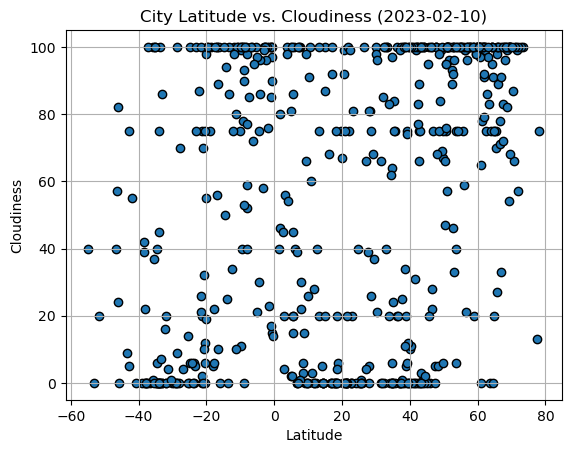

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
now = datetime.now()


plt.title("City Latitude vs. Cloudiness (" + now.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

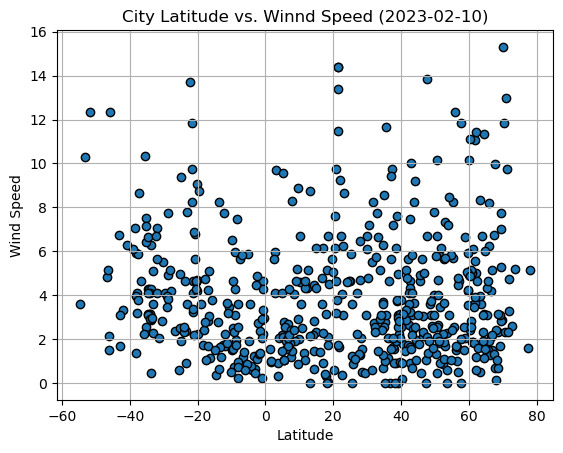

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
now = datetime.now()


plt.title("City Latitude vs. Winnd Speed (" + now.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,linfen,36.0889,111.5189,276.54,75,100,1.13,CN,1676075424
5,kapaa,22.0752,-159.3190,300.33,71,75,9.26,US,1676075533
9,albany,42.6001,-73.9662,278.52,73,89,0.89,US,1676075366
11,dikson,73.5069,80.5464,258.41,94,100,5.19,RU,1676075536
12,fortuna,40.5982,-124.1573,282.40,88,100,1.79,US,1676075537


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,292.67,87,0,4.29,ZA,1676075530
1,hermanus,-34.4187,19.2345,293.60,79,0,4.28,ZA,1676075530
2,mataura,-46.1927,168.8643,292.86,39,24,1.49,NZ,1676075531
3,atuona,-9.8000,-139.0333,299.17,77,11,6.50,PF,1676075532
6,vaini,-21.2000,-175.2000,302.24,84,75,4.63,TO,1676075533


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8507553731073096


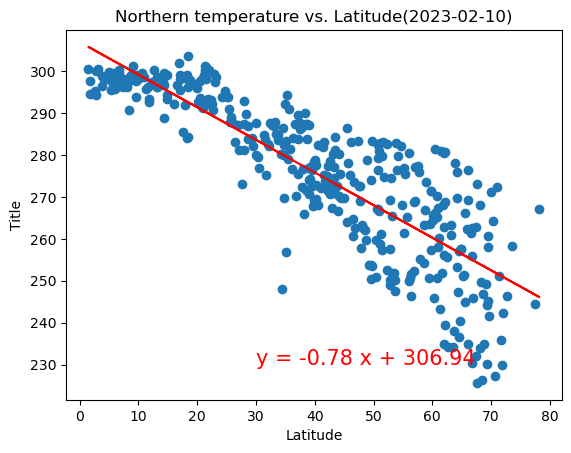

In [18]:
# Linear regression on Northern Hemisphere
now = datetime.now()
plt.title("Northern temperature vs. Latitude(" + now.strftime("%Y-%m-%d") + ")")
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (30,230))


The r-squared is: 0.263591900519397


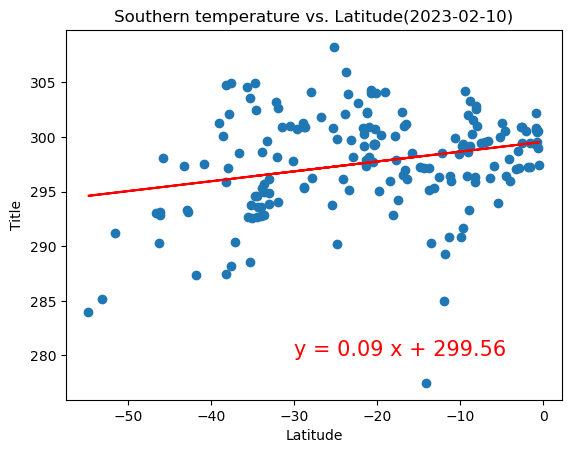

In [19]:
# Linear regression on Southern Hemisphere
now = datetime.now()
plt.title("Southern temperature vs. Latitude(" + now.strftime("%Y-%m-%d") + ")")
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,280))


**Discussion about the linear relationship:**
For Northern there is a strong negative correlation between maximum temperaturee and latitude of the cities in the northern hemisphere.
For Southern there is a weak positive correlation between maximum temperature and latitude of the cities in the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.42608905180440704


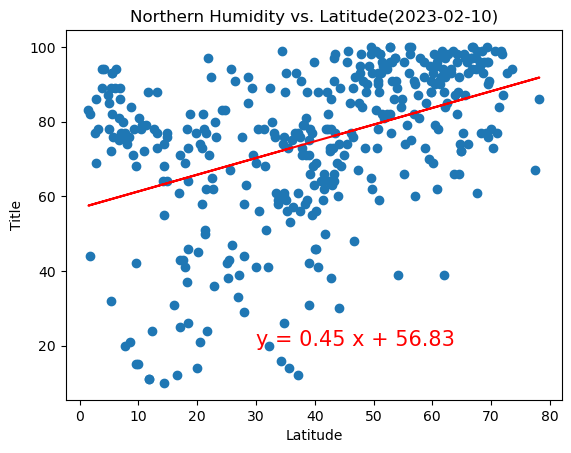

In [20]:
# Northern Hemisphere
now = datetime.now()
plt.title("Northern Humidity vs. Latitude(" + now.strftime("%Y-%m-%d") + ")")
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (30,20))


The r-squared is: 0.4523613222319037


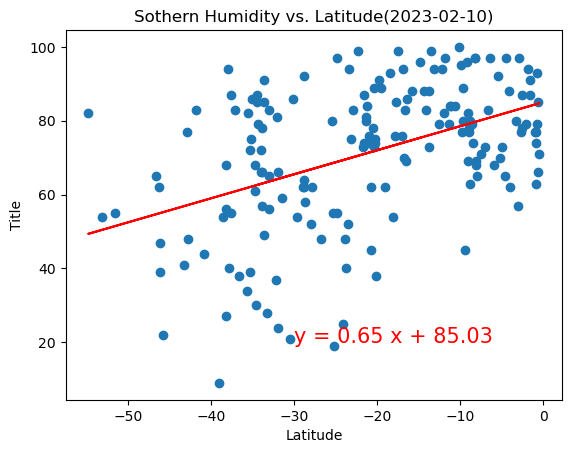

In [21]:
# Southern Hemisphere
now = datetime.now()
plt.title("Sothern Humidity vs. Latitude(" + now.strftime("%Y-%m-%d") + ")")
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,20))


**Discussion about the linear relationship:** 
There is a slight positive correlation between humidity and latitude of the cities in the northern hemisphere and in southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.45019780952019384


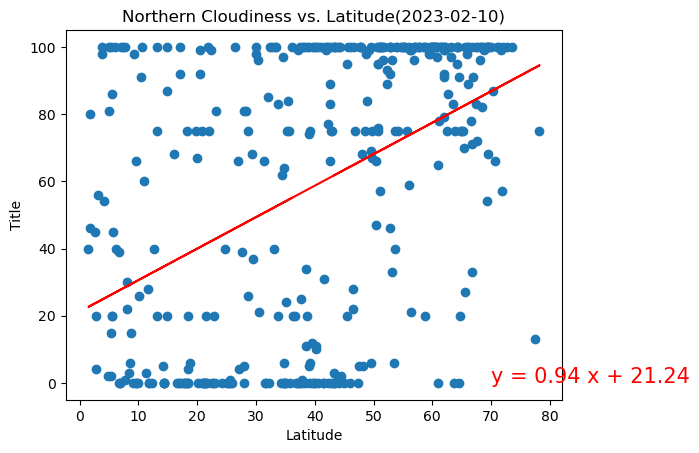

In [22]:
# Northern Hemisphere
now = datetime.now()
plt.title("Northern Cloudiness vs. Latitude(" + now.strftime("%Y-%m-%d") + ")")
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (70,0))


The r-squared is: 0.49911675888206886


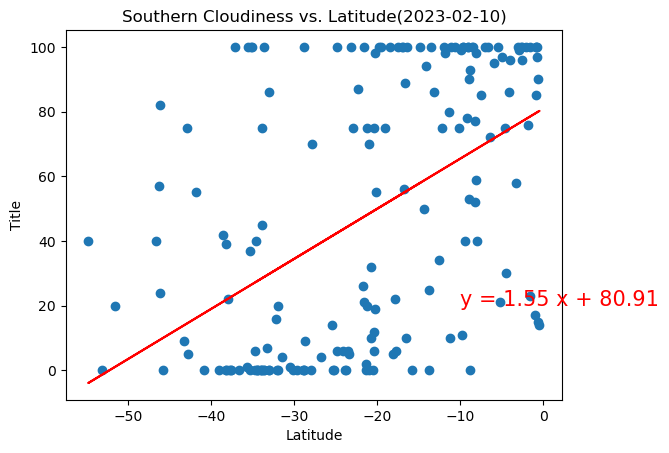

In [23]:
# Southern Hemisphere
now = datetime.now()
plt.title("Southern Cloudiness vs. Latitude(" + now.strftime("%Y-%m-%d") + ")")
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-10,20))


**Discussion about the linear relationship:** There is a strong positive correlation between humidity and latitude of the cities in the northern hemisphere and in southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.45019780952019384


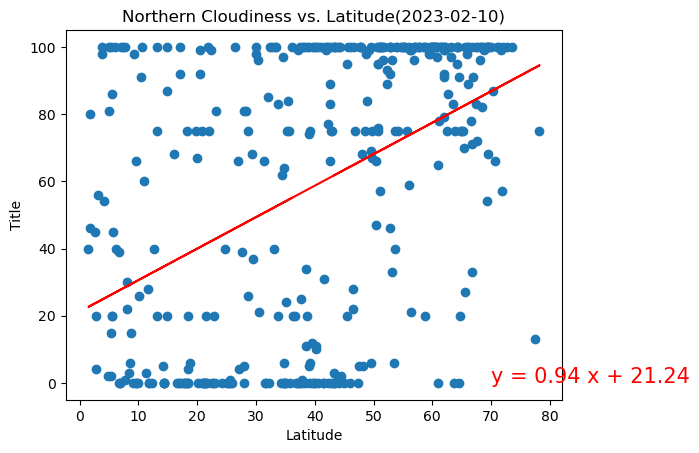

In [24]:
# Northern Hemisphere
now = datetime.now()
plt.title("Northern Cloudiness vs. Latitude(" + now.strftime("%Y-%m-%d") + ")")
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (70,0))


The r-squared is: -0.3875606622288453


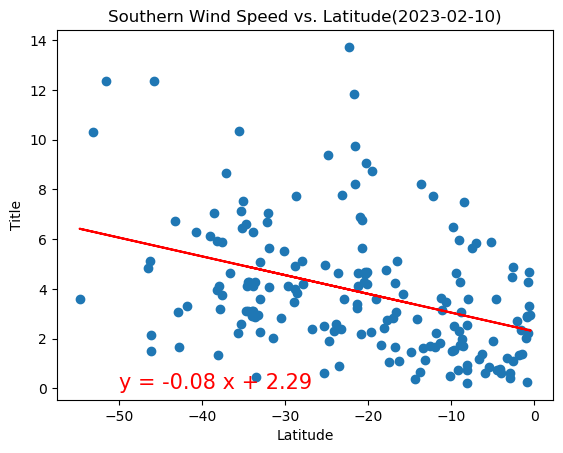

In [25]:
# Southern Hemisphere
now = datetime.now()
plt.title("Southern Wind Speed vs. Latitude(" + now.strftime("%Y-%m-%d") + ")")
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-50,0))


**Discussion about the linear relationship:** There is a strong positive correlation between humidity and latitude of the cities in the northern hemisphere but in southern hemisphere there is a strong negative correlation between humidity and latitude.